Univariate Time Series With Stacked LSTM, BiLSTM, and NeuralProphet


Import libraries

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


This code snippet imports several libraries and sets up the environment for data analysis and visualization. 

The first line imports the pandas library, which is commonly used for data manipulation and analysis. It provides data structures and functions to efficiently work with structured data.

The second line imports the numpy library, which is used for numerical computing in Python. It provides efficient array operations and mathematical functions.

The third line imports the statsmodels.api module, which is a powerful statistical modeling library in Python. It provides a wide range of statistical models and tools for data analysis.

The fourth line imports the statsmodels.formula.api module, which provides a formula interface to specify statistical models using formulas similar to those used in the R programming language.

The fifth line imports the sklearn.metrics module, which is part of the scikit-learn library. It provides various metrics and evaluation functions for machine learning models.

The sixth line imports the seaborn library, which is a data visualization library based on matplotlib. It provides a high-level interface for creating informative and attractive statistical graphics.

The seventh line imports the matplotlib.pyplot module from the matplotlib library, which is a popular plotting library in Python. It provides a flexible and comprehensive set of functions for creating various types of plots.

The last line, '%matplotlib inline', is a special command used in Jupyter Notebook or JupyterLab to display matplotlib plots inline in the notebook interface. It enables the interactive display of plots without the need for additional commands.

In summary, this code snippet sets up the necessary libraries and environment for data analysis, statistical modeling, and visualization. It provides a comprehensive set of tools to work with structured data, create statistical models, evaluate machine learning models, and create visualizations using seaborn and matplotlib.

Load stock data & preprosses

In [ ]:
data = pd.read_csv("AAPL.csv")
print(data.head())


         Date      Open      High       Low     Close  Adj Close     Volume
0  2010-01-04  7.622500  7.660714  7.585000  7.643214   6.562589  493729600
1  2010-01-05  7.664286  7.699643  7.616071  7.656429   6.573936  601904800
2  2010-01-06  7.656429  7.686786  7.526786  7.534643   6.469368  552160000
3  2010-01-07  7.562500  7.571429  7.466071  7.520714   6.457407  477131200
4  2010-01-08  7.510714  7.571429  7.466429  7.570714   6.500340  447610800


This code reads data from a CSV file named "AAPL.csv" and stores it in a variable called "data". 

The "pd.read_csv()" function is from the pandas library and is used to read data from a CSV (comma-separated values) file. It takes the file path as an argument and returns a pandas DataFrame, which is a two-dimensional tabular data structure with labeled axes (rows and columns). In this case, the CSV file is assumed to contain data related to the stock prices or other information about Apple Inc. (AAPL).

The "print(data.head())" statement is used to display the first few rows of the DataFrame. The "head()" function is a method of the DataFrame object that returns the first n rows, by default n=5. It is often used to quickly inspect the structure and contents of the data.

By executing this code, the program will read the data from the "AAPL.csv" file and display the first few rows of the DataFrame. This helps in getting a glimpse of the data and understanding its structure, column names, and the values in the initial rows.

In [ ]:
df = pd.read_csv('AAPL.csv')
df.shape
df

Date        Open        High  ...       Close   Adj Close     Volume
0     2010-01-04    7.622500    7.660714  ...    7.643214    6.562589  493729600
1     2010-01-05    7.664286    7.699643  ...    7.656429    6.573936  601904800
2     2010-01-06    7.656429    7.686786  ...    7.534643    6.469368  552160000
3     2010-01-07    7.562500    7.571429  ...    7.520714    6.457407  477131200
4     2010-01-08    7.510714    7.571429  ...    7.570714    6.500340  447610800
...          ...         ...         ...  ...         ...         ...        ...
2975  2021-10-27  149.360001  149.729996  ...  148.850006  148.850006   56094900
2976  2021-10-28  149.820007  153.169998  ...  152.570007  152.570007  100077900
2977  2021-10-29  147.220001  149.940002  ...  149.800003  149.800003  124850400
2978  2021-11-01  148.990005  149.699997  ...  148.960007  148.960007   74445600
2979  2021-11-02  148.660004  151.570007  ...  150.580002  150.580002   50453753

[2980 rows x 7 columns]

This code snippet performs several operations on a DataFrame object created from the data in the "AAPL.csv" file.

The first line reads the data from the CSV file using the pandas library's "read_csv()" function and assigns it to a variable called "df". The "df" variable now represents a DataFrame, which is a two-dimensional tabular data structure with labeled axes (rows and columns). It is commonly used for data manipulation and analysis.

The second line, "df.shape", is used to retrieve the shape of the DataFrame. The "shape" attribute of a DataFrame returns a tuple that represents the dimensions of the DataFrame, i.e., the number of rows and columns. By calling "df.shape", we can obtain information about the size of the DataFrame.

The third line, "df", simply displays the DataFrame. When executed in a Jupyter Notebook or interactive Python environment, the DataFrame is outputted as a formatted table, showing the contents of the DataFrame.

Overall, this code reads the data from the "AAPL.csv" file and stores it in a DataFrame called "df". It then retrieves and displays information about the shape of the DataFrame, providing the number of rows and columns. Finally, the DataFrame itself is displayed, showing the tabular data from the CSV file.

In [ ]:
df.duplicated().sum().any()

False

This code snippet checks if there are any duplicated rows in a DataFrame called "df".

The ".duplicated()" method of the DataFrame is used to identify duplicate rows. It returns a boolean Series where each value is "True" if the corresponding row is a duplicate, and "False" otherwise. By default, it considers all columns when identifying duplicates.

The ".sum()" method is then applied to the boolean Series returned by ".duplicated()". Since "True" is treated as 1 and "False" as 0 when summing, this operation counts the number of duplicate rows in the DataFrame.

The ".any()" method is used to check if there is at least one duplicate row. It returns "True" if any value in the Series is "True", indicating the presence of duplicates. Otherwise, it returns "False".

By calling "df.duplicated().sum().any()", the code determines if there are any duplicated rows in the DataFrame. The result is a boolean value: "True" if there are duplicates, and "False" if there are no duplicates.

In summary, this code checks if there are any duplicate rows in the DataFrame "df". It utilizes the ".duplicated()" method to identify duplicates, the ".sum()" method to count them, and the ".any()" method to determine if at least one duplicate is found.

In [ ]:
sum(df.duplicated())

0

This code calculates the total number of duplicated rows in a DataFrame called "df".

The ".duplicated()" method of the DataFrame is used to identify duplicate rows. It returns a boolean Series where each value is "True" if the corresponding row is a duplicate, and "False" otherwise. By default, it considers all columns when identifying duplicates.

By calling "sum(df.duplicated())", the code sums up the boolean Series returned by ".duplicated()". Since "True" is treated as 1 and "False" as 0 when summing, this operation counts the number of duplicate rows in the DataFrame.

The result of this code is an integer that represents the total count of duplicated rows in the DataFrame.

In summary, this code calculates the number of duplicated rows in the DataFrame "df" by summing the boolean values obtained from the ".duplicated()" method. It provides a quantitative measure of the duplication present in the DataFrame.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2980 entries, 0 to 2979
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2980 non-null   object 
 1   Open       2980 non-null   float64
 2   High       2980 non-null   float64
 3   Low        2980 non-null   float64
 4   Close      2980 non-null   float64
 5   Adj Close  2980 non-null   float64
 6   Volume     2980 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 163.1+ KB


This code provides an overview of the structure and summary information about a DataFrame called "data".

The ".info()" method is called on the DataFrame object to display a concise summary of the DataFrame. It provides useful information such as the number of rows and columns, the data types of each column, and the amount of memory used by the DataFrame.

The output of this code includes the following details:
- The total number of rows in the DataFrame.
- The total number of columns in the DataFrame.
- The names of each column.
- The data type of each column (e.g., integer, float, object).
- The count of non-null values in each column, which indicates the number of non-missing values.
- The memory usage of the DataFrame.

This summary information is helpful in understanding the overall structure and characteristics of the data. It allows users to identify potential issues such as missing values, inconsistencies in data types, and the general composition of the DataFrame.

In summary, the "data.info()" code provides a summary overview of the DataFrame "data" by displaying information about its structure, column names, data types, non-null value counts, and memory usage.

preprossesing 

In [ ]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    return summary


resumetable(df)

Dataset Shape: (2980, 7)


Name   dtypes  Missing  Uniques
0       Date   object        0     2980
1       Open  float64        0     2856
2       High  float64        0     2837
3        Low  float64        0     2853
4      Close  float64        0     2862
5  Adj Close  float64        0     2939
6     Volume    int64        0     2973

This code defines a function called "resumetable" that takes a DataFrame, "df", as input and returns a summary table of its characteristics.

The "resumetable" function first prints the shape of the DataFrame, indicating the number of rows and columns it contains.

Next, it creates a summary DataFrame by extracting the data types of each column from the input DataFrame using the ".dtypes" attribute. The summary DataFrame has two columns: "Name" and "dtypes". The "Name" column contains the column names, and the "dtypes" column contains the corresponding data types.

To organize the summary DataFrame, it is reset and the "index" column becomes a separate column named "Name". Then, the summary DataFrame is rearranged to include only the "Name" and "dtypes" columns.

The next step involves adding two additional columns to the summary DataFrame. The "Missing" column is populated with the count of missing values in each column, obtained using the ".isnull().sum()" method. The "Uniques" column is populated with the count of unique values in each column, obtained using the ".nunique()" method.

Finally, the function returns the summary DataFrame.

When the function is called with "resumetable(df)", it generates a summary table for the provided DataFrame, "df". This summary table includes information such as the column names, data types, the count of missing values, and the count of unique values for each column in the DataFrame.

In summary, this code defines a function that creates a summary table for a given DataFrame, providing insights into the structure and characteristics of the data.

In [ ]:
df.describe()

Open         High  ...    Adj Close        Volume
count  2980.000000  2980.000000  ...  2980.000000  2.980000e+03
mean     41.024595    41.444840  ...    39.343258  2.726309e+08
std      35.489778    35.893334  ...    36.036754  2.265477e+08
min       6.870357     7.000000  ...     5.889190  4.544800e+07
25%      18.336607    18.557768  ...    16.060280  1.106592e+08
50%      28.048750    28.316250  ...    25.920846  1.869154e+08
75%      47.373126    47.687499  ...    45.945326  3.734612e+08
max     156.979996   157.259995  ...   156.690002  1.880998e+09

[8 rows x 6 columns]

The code snippet "df.describe()" generates a statistical summary of a DataFrame named "df". By calling the ".describe()" method on the DataFrame, it calculates various descriptive statistics for each column containing numerical data.

The output of this code provides a comprehensive summary of the numerical columns in the DataFrame. For each of these columns, it presents key statistical metrics such as count, mean, standard deviation, minimum, 25th percentile (lower quartile), median (50th percentile), 75th percentile (upper quartile), and maximum value.

These statistics offer valuable insights into the distribution, central tendency, and variability of the numerical data. The count indicates the number of non-null values in each column, while the mean represents the average value. The standard deviation measures the spread or dispersion of the data points around the mean.

The minimum and maximum values provide information about the range of values in the column, while the quartiles (25th and 75th percentiles) give an idea of the data distribution. The median, or the 50th percentile, represents the middle value that separates the higher and lower halves of the data.

By generating this statistical summary, the code enables analysts and data scientists to quickly understand the basic characteristics of the numerical data. It aids in identifying outliers, detecting potential data issues, and gaining insights into the overall properties of the dataset.

In summary, the "df.describe()" code provides a concise and informative statistical summary of the numerical columns in the DataFrame "df". It presents essential descriptive statistics that help in comprehending the distribution, central tendency, and variability of the data, facilitating exploratory data analysis and decision-making processes.

In [ ]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

This code computes the count of missing values in each column of a DataFrame called "df".

The ".isna()" method is called on the DataFrame, which checks for missing values (NaN or null values) in each element of the DataFrame. It returns a DataFrame with the same shape as the original, where each element is replaced with a boolean value indicating whether it is a missing value (True) or not (False).

The ".sum()" method is then applied to this boolean DataFrame. When summing a boolean DataFrame, True values are treated as 1 and False values as 0. Therefore, the sum of each column gives the count of missing values in that column.

The output of this code is a Series that displays the count of missing values for each column in the DataFrame. The index of the Series corresponds to the column names, while the values represent the respective counts of missing values.

By using "df.isna().sum()", this code provides a convenient way to assess the completeness of the data and identify columns that have missing values. It helps in understanding the extent of missingness and deciding how to handle or impute missing values during data preprocessing or analysis.

In summary, the "df.isna().sum()" code calculates the count of missing values in each column of the DataFrame "df". It generates a Series that serves as a concise summary of missing data, facilitating data quality assessment and data cleaning procedures.

In [ ]:
print(df.corr())

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999897  0.999853  0.999753   0.999648 -0.483814
High       0.999897  1.000000  0.999818  0.999871   0.999774 -0.482251
Low        0.999853  0.999818  1.000000  0.999874   0.999770 -0.486630
Close      0.999753  0.999871  0.999874  1.000000   0.999898 -0.484570
Adj Close  0.999648  0.999774  0.999770  0.999898   1.000000 -0.483597
Volume    -0.483814 -0.482251 -0.486630 -0.484570  -0.483597  1.000000


This code calculates and prints the correlation matrix for a DataFrame called "df".

The ".corr()" method is called on the DataFrame to compute the pairwise correlation between all pairs of columns. Correlation measures the strength and direction of the linear relationship between two variables. It produces a square matrix where the rows and columns correspond to the columns of the DataFrame, and each element represents the correlation coefficient between two variables.

By calling "print(df.corr())", the code displays the correlation matrix as a table. The correlation coefficients range from -1 to 1, where values close to -1 indicate a strong negative correlation, values close to 1 indicate a strong positive correlation, and values close to 0 indicate a weak or no correlation. The diagonal of the correlation matrix consists of 1s, representing the perfect correlation between each variable with itself.

This correlation matrix provides insights into the relationships between different variables in the DataFrame. It helps in understanding which variables are positively or negatively correlated and to what extent. It is a useful tool for identifying potential patterns, dependencies, or multicollinearity in the data.

In summary, the "print(df.corr())" code calculates and displays the correlation matrix for the DataFrame "df". It offers a comprehensive view of the relationships between variables, allowing users to analyze and interpret the strength and direction of these relationships.

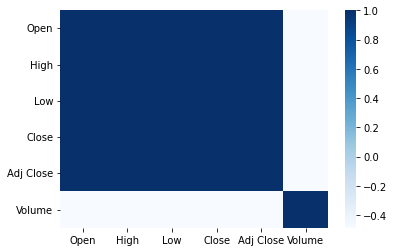

In [ ]:
sns.heatmap(df.corr(), cmap=("Blues"))

This code generates and displays a heatmap plot of the correlation matrix for a DataFrame called "df".

The "df.corr()" part calculates the correlation coefficients between all pairs of columns in the DataFrame. The result is a square matrix where each element represents the correlation between two variables.

The "sns.heatmap()" function from the seaborn library is then called to create a heatmap plot based on the correlation matrix. A heatmap is a graphical representation of data using colors, where each cell in the plot corresponds to a pair of variables and the color represents the correlation coefficient.

The "cmap" parameter is set to "Blues" to specify the color palette for the heatmap. "Blues" is a sequential color map that ranges from light to dark blue, which is commonly used for visualizing positive correlations.

By executing "sns.heatmap(df.corr(), cmap=("Blues"))", the code generates a heatmap plot that visually depicts the correlation matrix. The plot helps in understanding the patterns and strengths of the relationships between different variables in the DataFrame.

In summary, this code creates a heatmap plot using seaborn to represent the correlation matrix of the DataFrame "df". It provides a visual representation of the correlations between variables, allowing for easy identification of strong positive or negative relationships through color variations.

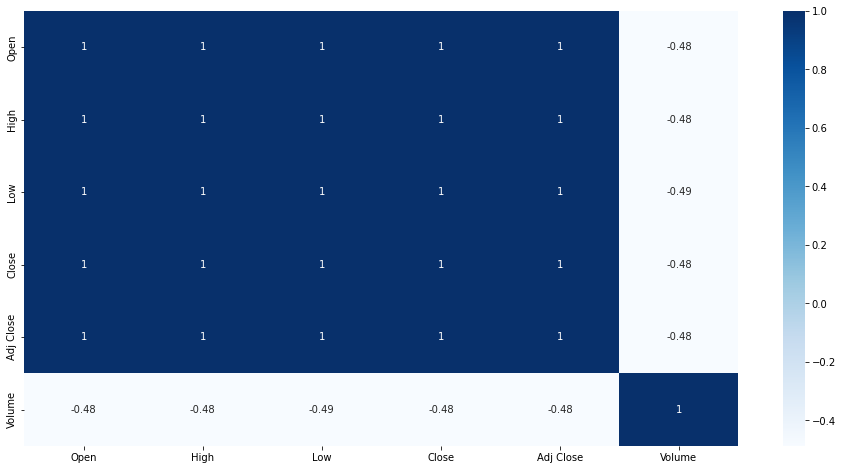

In [ ]:
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(df.corr(), cmap="Blues", annot=True)
plt.show()                           

This code generates and displays a heatmap plot of the correlation matrix for a DataFrame called "df" using the matplotlib and seaborn libraries.

The first line, "plt.figure(figsize=(16,8))", sets the size of the figure that will contain the heatmap plot. It specifies the width and height of the figure in inches, allowing for customization of the plot's dimensions.

Next, the code creates a heatmap plot using the "sns.heatmap()" function from the seaborn library. The function takes the correlation matrix, "df.corr()", as input and generates a heatmap representation of the matrix.

The "cmap" parameter is set to "Blues" to define the color palette for the heatmap. This colormap ranges from light to dark blue, with lighter shades indicating lower correlation and darker shades representing higher correlation.

The "annot" parameter is set to "True" to display the correlation coefficients as annotations within each cell of the heatmap. This provides additional information about the strength of the correlations.

Finally, "plt.show()" is called to display the heatmap plot.

By executing this code, a heatmap plot is generated and shown, illustrating the correlations between variables in the DataFrame. The plot provides a visual representation of the correlation matrix, making it easier to identify patterns, clusters, and the strength of relationships between variables.

In summary, this code creates a heatmap plot using seaborn and matplotlib to visualize the correlation matrix of the DataFrame "df". It allows for a clear and intuitive understanding of the relationships between variables through color gradients and annotations.

Text(0.5, 1.0, 'Correlation between Close and Volume')

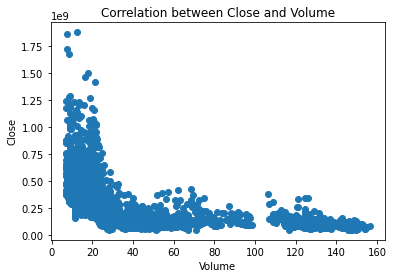

In [ ]:
plt.scatter(df['Close'], df['Volume'])
plt.ylabel("Close")
plt.xlabel("Volume")
plt.title("Correlation between Close and Volume")

The provided code generates a scatter plot to visualize the relationship between two variables, namely the "Close" and "Volume" columns of the DataFrame "df".

In the first line, "plt.scatter(df['Close'], df['Volume'])", a scatter plot is created, where each data point from the DataFrame is represented as a point on the plot. The "Close" column values are plotted along the x-axis, and the "Volume" column values are plotted along the y-axis. Each point on the plot corresponds to a specific pairing of a "Close" value and its corresponding "Volume" value.

The second line, "plt.ylabel("Close")", adds a label to the y-axis of the plot, indicating that the y-axis represents the "Close" variable. This helps in providing a clear understanding of the information being depicted on the y-axis.

Similarly, the third line, "plt.xlabel("Volume")", adds a label to the x-axis of the plot, indicating that the x-axis represents the "Volume" variable. This label helps in interpreting the information presented along the x-axis.

In the fourth line, "plt.title("Correlation between Close and Volume")", a title is assigned to the plot, providing a descriptive summary of the relationship being depicted. This title serves as a brief description that conveys the main purpose or focus of the scatter plot.

By executing this code, a scatter plot is generated, enabling visual examination of the relationship between the "Close" and "Volume" variables. The plot assists in identifying any correlations, trends, or patterns that might exist between these two variables, such as whether there is a connection between trading volume and closing prices.

To summarize, the provided code generates a scatter plot using matplotlib to display the relationship between the "Close" and "Volume" variables in the DataFrame "df". The plot serves as a visual tool that aids in understanding the interplay between the two variables and facilitates the identification of any associations or patterns.

Text(0.5, 1.0, 'Correlation between High and Low')

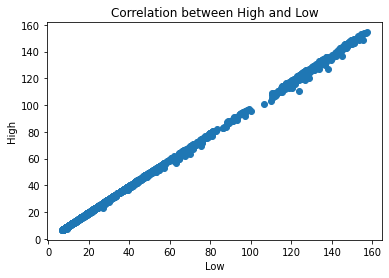

In [ ]:
plt.scatter(df['High'], df['Low'])
plt.ylabel("High")
plt.xlabel("Low")
plt.title("Correlation between High and Low")

This code generates a scatter plot to visualize the relationship between two variables, specifically the "High" and "Low" columns of a DataFrame called "df".

The first line, "plt.scatter(df['High'], df['Low'])", creates a scatter plot where each point represents a data point from the DataFrame. The "High" column values are plotted on the y-axis, and the "Low" column values are plotted on the x-axis. Each point on the plot corresponds to a specific pairing of a "High" value with its corresponding "Low" value.

The second line, "plt.ylabel("High")", adds a label to the y-axis of the plot, indicating that the y-axis represents the "High" variable.

The third line, "plt.xlabel("Low")", adds a label to the x-axis of the plot, indicating that the x-axis represents the "Low" variable.

The fourth line, "plt.title("Correlation between High and Low")", adds a title to the plot, providing a descriptive summary of the relationship being visualized.

By executing this code, a scatter plot is generated, displaying the relationship between the "High" and "Low" variables. This plot helps in understanding any correlation or patterns that may exist between these two variables, such as whether there is a relationship between high and low values, or if certain patterns emerge from the data.

In summary, this code utilizes matplotlib to create a scatter plot that visualizes the relationship between the "High" and "Low" variables in the DataFrame "df". The plot allows for a clear understanding of how these two variables relate to each other and aids in identifying any potential correlations or patterns that may exist.

EDA

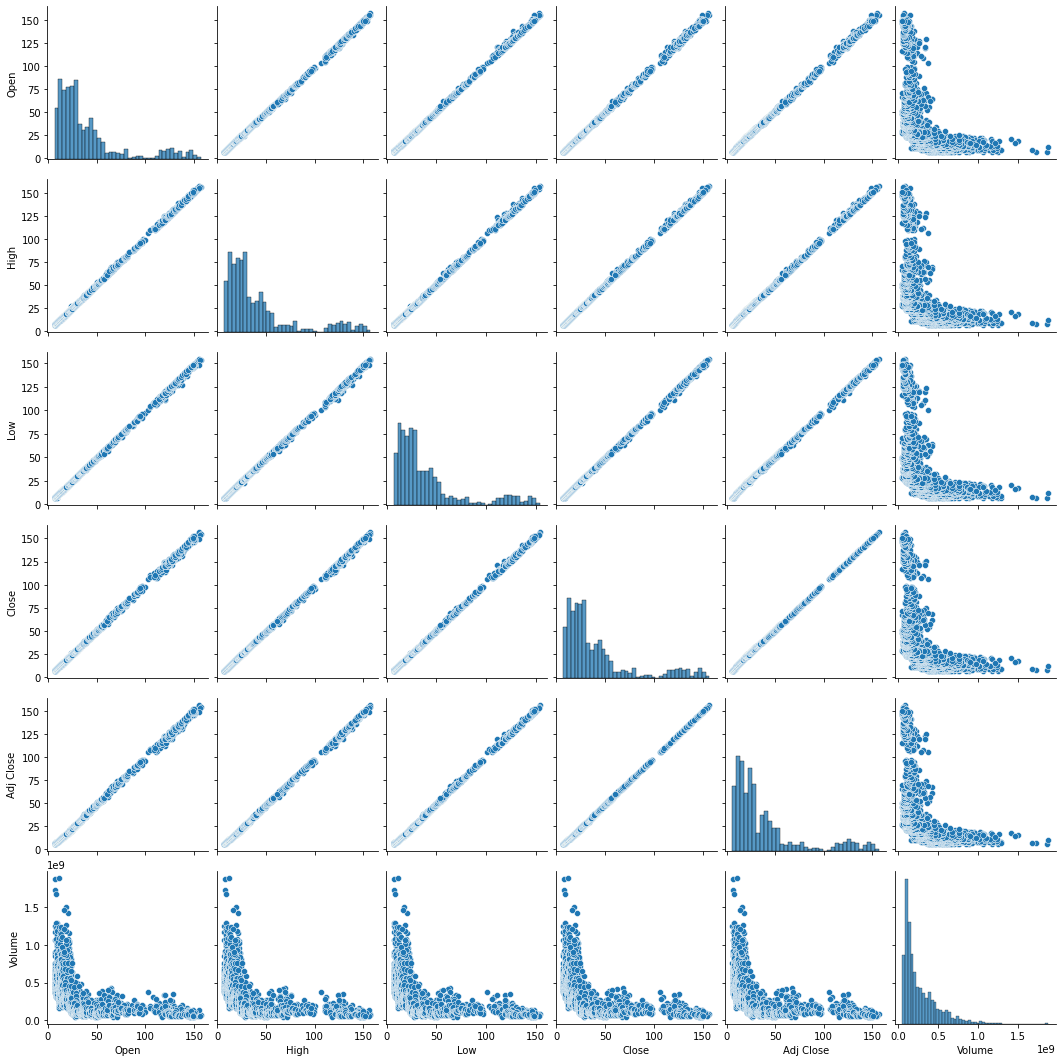

In [ ]:
sns.pairplot(df)

This code generates a pair plot, also known as a scatter plot matrix, for a DataFrame called "df" using the seaborn library.

The "sns.pairplot()" function is called, taking the DataFrame as input. This function creates a grid of scatter plots, where each variable in the DataFrame is plotted against every other variable. The resulting plot matrix displays the pairwise relationships between the variables, with scatter plots along the diagonal and scatter plots or other visualizations in the off-diagonal cells.

By executing this code, a pair plot is generated, allowing for a comprehensive visual examination of the relationships between variables in the DataFrame. The plot matrix provides a quick overview of how each variable relates to one another, offering insights into potential correlations, patterns, and distributions.

The pair plot is particularly useful when working with multivariate data, as it enables the identification of interesting associations or trends between variables. It can help in identifying outliers, understanding the distribution of data points, and uncovering potential nonlinear relationships that might not be evident through individual scatter plots.

In summary, the "sns.pairplot(df)" code generates a pair plot using seaborn to visualize the relationships between variables in the DataFrame "df". It provides an efficient and intuitive way to explore and understand the interactions and dependencies among the variables in the dataset.

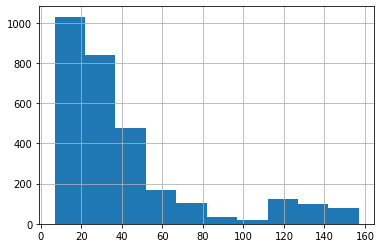

In [ ]:
df['Open'].hist()

This code generates a histogram for the values in the "Open" column of a DataFrame called "df".

By accessing the "Open" column using "df['Open']", the code selects the specific column from the DataFrame.

The ".hist()" method is then called on the selected column to create a histogram. A histogram is a graphical representation that organizes the data into intervals or bins on the x-axis and displays the frequency or count of values falling into each bin on the y-axis.

Executing this code results in the creation of a histogram plot that visualizes the distribution of values in the "Open" column. The histogram provides insights into the concentration or spread of the data and can reveal patterns such as skewness, modes, or any notable deviations from a normal distribution.

In summary, the "df['Open'].hist()" code generates a histogram plot using the "Open" column of the DataFrame "df". It allows for an exploration of the distribution of values and assists in understanding the shape and characteristics of the data in that particular column.

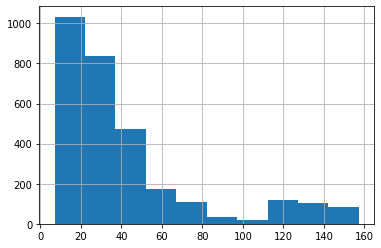

In [ ]:
df['High'].hist()

This code generates a histogram for the values in the "High" column of a DataFrame called "df".

By accessing the "High" column using "df['High']", the code selects that specific column from the DataFrame.

The ".hist()" method is then called on the selected column to create a histogram. A histogram is a graphical representation that divides the data into intervals or bins on the x-axis and displays the frequency or count of values falling into each bin on the y-axis.

By executing this code, a histogram plot is generated, visually representing the distribution of values in the "High" column. The histogram provides insights into the concentration or spread of the data and helps identify any patterns, modes, or deviations from a normal distribution.

In summary, the "df['High'].hist()" code generates a histogram plot using the "High" column of the DataFrame "df". It allows for a visual exploration of the distribution of values in that particular column, aiding in understanding the shape and characteristics of the data.

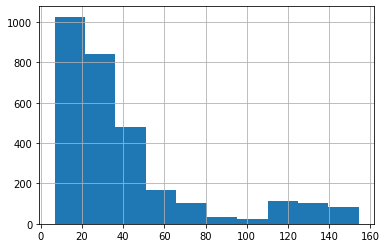

In [ ]:
df['Low'].hist()

This code generates a histogram for the values in the "Low" column of a DataFrame called "df".

By accessing the "Low" column using "df['Low']", the code selects that specific column from the DataFrame.

The ".hist()" method is then called on the selected column to create a histogram. A histogram is a graphical representation that divides the data into intervals or bins on the x-axis and displays the frequency or count of values falling into each bin on the y-axis.

When this code is executed, a histogram plot is generated, visually depicting the distribution of values in the "Low" column. The histogram provides insights into the concentration or spread of the data and helps in identifying any patterns, modes, or deviations from a normal distribution.

In summary, the "df['Low'].hist()" code generates a histogram plot using the "Low" column of the DataFrame "df". It allows for a visual exploration of the distribution of values in that particular column, assisting in understanding the shape and characteristics of the data.

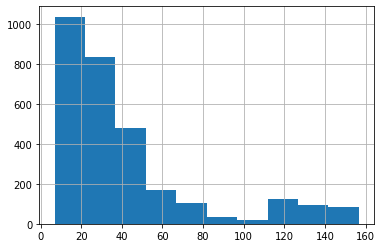

In [ ]:
df['Close'].hist()

This code generates a histogram for the values in the "Close" column of a DataFrame called "df".

By accessing the "Close" column using "df['Close']", the code selects that specific column from the DataFrame.

The ".hist()" method is then called on the selected column to create a histogram. A histogram is a graphical representation that divides the data into intervals or bins on the x-axis and displays the frequency or count of values falling into each bin on the y-axis.

When this code is executed, a histogram plot is generated, visually illustrating the distribution of values in the "Close" column. The histogram provides insights into the concentration or spread of the data and helps in identifying any patterns, modes, or deviations from a normal distribution.

In summary, the "df['Close'].hist()" code generates a histogram plot using the "Close" column of the DataFrame "df". It allows for a visual exploration of the distribution of values in that particular column, providing insights into the shape and characteristics of the data.

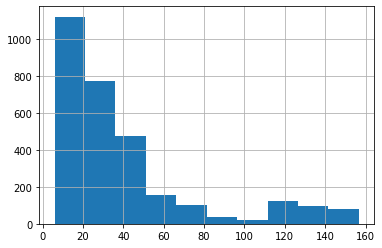

In [ ]:
df['Adj Close'].hist()

This code generates a histogram for the values in the "Adj Close" column of a DataFrame called "df".

By accessing the "Adj Close" column using "df['Adj Close']", the code selects that specific column from the DataFrame.

The ".hist()" method is then called on the selected column to create a histogram. A histogram is a graphical representation that divides the data into intervals or bins on the x-axis and displays the frequency or count of values falling into each bin on the y-axis.

When this code is executed, a histogram plot is generated, visually representing the distribution of values in the "Adj Close" column. The histogram provides insights into the concentration or spread of the data and helps identify any patterns, modes, or deviations from a normal distribution.

In summary, the "df['Adj Close'].hist()" code generates a histogram plot using the "Adj Close" column of the DataFrame "df". It allows for a visual exploration of the distribution of values in that particular column, providing insights into the shape and characteristics of the data.

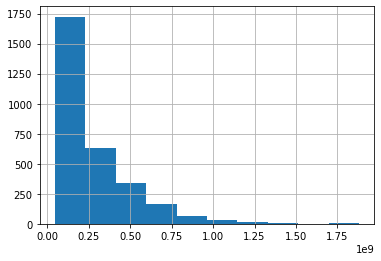

In [ ]:
df['Volume'].hist()

This code generates a histogram for the values in the "Volume" column of a DataFrame called "df".

By accessing the "Volume" column using "df['Volume']", the code selects that specific column from the DataFrame.

The ".hist()" method is then called on the selected column to create a histogram. A histogram is a graphical representation that divides the data into intervals or bins on the x-axis and displays the frequency or count of values falling into each bin on the y-axis.

Executing this code results in the creation of a histogram plot, visually representing the distribution of values in the "Volume" column. The histogram provides insights into the concentration or spread of the data and can reveal patterns such as skewness, modes, or any notable deviations from a normal distribution.

In summary, the "df['Volume'].hist()" code generates a histogram plot using the "Volume" column of the DataFrame "df". It allows for a visual exploration of the distribution of values in that particular column, aiding in understanding the shape and characteristics of the data.

In [ ]:
df

Date        Open        High  ...       Close   Adj Close     Volume
0     2010-01-04    7.622500    7.660714  ...    7.643214    6.562589  493729600
1     2010-01-05    7.664286    7.699643  ...    7.656429    6.573936  601904800
2     2010-01-06    7.656429    7.686786  ...    7.534643    6.469368  552160000
3     2010-01-07    7.562500    7.571429  ...    7.520714    6.457407  477131200
4     2010-01-08    7.510714    7.571429  ...    7.570714    6.500340  447610800
...          ...         ...         ...  ...         ...         ...        ...
2975  2021-10-27  149.360001  149.729996  ...  148.850006  148.850006   56094900
2976  2021-10-28  149.820007  153.169998  ...  152.570007  152.570007  100077900
2977  2021-10-29  147.220001  149.940002  ...  149.800003  149.800003  124850400
2978  2021-11-01  148.990005  149.699997  ...  148.960007  148.960007   74445600
2979  2021-11-02  148.660004  151.570007  ...  150.580002  150.580002   50453753

[2980 rows x 7 columns]

In [ ]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], high=data["High"],
                                        low=data["Low"], close=data["Close"])])
figure.update_layout(title = "Apple Stock Price Analysis", xaxis_rangeslider_visible=False)
figure.show()

This code generates a candlestick chart to visualize the stock price data for Apple (AAPL) using the Plotly library.

The first line imports the necessary module from Plotly for creating interactive graph objects.

The second line creates a new figure object using the `go.Figure()` constructor. Within the constructor, the `go.Candlestick()` trace is used to define the candlestick chart. The "x" parameter represents the dates, while the "open", "high", "low", and "close" parameters correspond to the opening, highest, lowest, and closing prices of the stock, respectively. These values are obtained from the "data" DataFrame.

The third line updates the layout of the figure. The `update_layout()` method is called to customize the title of the chart, setting it as "Apple Stock Price Analysis". The `xaxis_rangeslider_visible` parameter is set to False to hide the range slider for the x-axis.

Finally, the `figure.show()` method is called to display the candlestick chart.

When this code is executed, it generates an interactive candlestick chart that visualizes the stock price data for Apple. Each candlestick represents the trading range (high and low) and the opening and closing prices for a given date. The chart provides a graphical representation of the stock's price movement over time, allowing users to analyze patterns, trends, and potential support or resistance levels.

In summary, this code uses the Plotly library to create a candlestick chart, displaying the stock price data for Apple. The chart provides a visual representation of the stock's trading range and price movement, enabling users to analyze and interpret the historical price trends.

# EDA

In [ ]:
data = pd.read_csv("AAPL.csv")
print(data.head())
data.info()

         Date      Open      High       Low     Close  Adj Close     Volume
0  2010-01-04  7.622500  7.660714  7.585000  7.643214   6.562589  493729600
1  2010-01-05  7.664286  7.699643  7.616071  7.656429   6.573936  601904800
2  2010-01-06  7.656429  7.686786  7.526786  7.534643   6.469368  552160000
3  2010-01-07  7.562500  7.571429  7.466071  7.520714   6.457407  477131200
4  2010-01-08  7.510714  7.571429  7.466429  7.570714   6.500340  447610800
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2980 entries, 0 to 2979
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2980 non-null   object 
 1   Open       2980 non-null   float64
 2   High       2980 non-null   float64
 3   Low        2980 non-null   float64
 4   Close      2980 non-null   float64
 5   Adj Close  2980 non-null   float64
 6   Volume     2980 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 163.1+ KB


This code performs data reading, data preview, and information summary operations on a dataset stored in a CSV file named "AAPL.csv".

The first line reads the data from the CSV file using the pandas library's "read_csv()" function. The data is then assigned to a DataFrame called "data".

The second line prints the first few rows of the DataFrame using the "head()" method. This provides a quick preview of the data, displaying the column names and a subset of the records.

The third line uses the "info()" method to generate a summary of the DataFrame. This summary includes information such as the number of rows and columns in the dataset, the data types of each column, and the memory usage.

By executing this code, the data from the CSV file is loaded into a DataFrame, and the first few rows are printed to provide an initial understanding of the dataset's structure and content. The "info()" method then offers a more detailed overview, including the data types and non-null value counts for each column.

In summary, this code reads the data from a CSV file into a DataFrame, prints a preview of the dataset's initial records, and provides a summary of the dataset's structure and information. It is a common sequence of operations used to gain an initial understanding of the data before further analysis or processing.

In [ ]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

This code calculates the count of missing values in each column of a DataFrame called "data".

The ".isnull()" method is called on the DataFrame, which checks for missing values (NaN or null values) in each element of the DataFrame. It returns a DataFrame with the same shape as the original, where each element is replaced with a boolean value indicating whether it is a missing value (True) or not (False).

The ".sum()" method is then applied to this boolean DataFrame. When summing a boolean DataFrame, True values are treated as 1 and False values as 0. Therefore, the sum of each column gives the count of missing values in that column.

The output of this code is a Series that displays the count of missing values for each column in the DataFrame. The index of the Series corresponds to the column names, while the values represent the respective counts of missing values.

By using "data.isnull().sum()", this code provides a convenient way to assess the completeness of the data and identify columns that have missing values. It helps in understanding the extent of missingness and provides valuable information for data cleaning or handling missing values in subsequent data processing tasks.

In summary, the "data.isnull().sum()" code calculates and returns the count of missing values in each column of the DataFrame "data". It generates a Series that summarizes the missing data, allowing for data quality assessment and necessary data cleaning or imputation steps.

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)

This code converts the values in the "Date" column of a DataFrame called "data" into datetime format using the pandas library.

By accessing the "Date" column using "data['Date']", the code selects that specific column from the DataFrame.

The "pd.to_datetime()" function is then applied to the selected column to convert the values to datetime format. The "infer_datetime_format=True" parameter allows pandas to automatically detect the appropriate date and time format based on the values in the column.

Executing this code results in the conversion of the "Date" column to datetime format, enabling further analysis and manipulation of the dates as datetime objects.

In summary, the "data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)" code converts the values in the "Date" column of the DataFrame "data" into datetime format. This conversion facilitates working with dates as datetime objects, allowing for various time-related operations and analyses to be performed on the data.

In [ ]:
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

This code sets up the necessary configurations for plotting with Matplotlib and manages warnings.

The first line, "%matplotlib inline", is a magic command used in Jupyter Notebook or JupyterLab to display Matplotlib plots directly in the output cells. It enables the inline backend, allowing the plots to be shown within the notebook itself.

The second line imports the "rcParams" module from the Matplotlib library. This module provides a way to customize various plotting parameters and configurations.

The third line imports the "datetime" module, which allows working with dates and times in Python.

The fourth line imports the "warnings" module, which provides control over warning messages generated during code execution.

The fifth line, "warnings.filterwarnings('ignore')", sets up a filter to ignore warning messages. This line instructs the code to suppress warning messages and prevent them from being displayed in the output. This can be useful when dealing with known or expected warnings that do not affect the execution of the code.

In summary, the code configures the plotting environment by enabling the inline display of Matplotlib plots, imports necessary modules for date and warning handling, and sets up a filter to ignore warning messages. These configurations and imports help ensure smooth plotting and prevent warning messages from cluttering the output.

In [ ]:

data=data.set_index(['Date'])
data.head()

Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.562589  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.573936  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.469368  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.457407  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.500340  447610800

This code performs two operations on a DataFrame called "data".

The first line, "data=data.set_index(['Date'])", sets the "Date" column as the index of the DataFrame. By calling the "set_index()" method on the DataFrame and passing 'Date' as the argument, the values in the "Date" column are used as the new index for the DataFrame. This operation reorganizes the DataFrame, making the dates the primary identifier for the rows.

The second line, "data.head()", displays the first few rows of the updated DataFrame. The "head()" method is used to retrieve the top records of the DataFrame, providing a preview of the data with the newly set index.

By executing this code, the DataFrame is modified so that the "Date" column becomes the index. This change allows for easier indexing, filtering, and analysis of the data based on the date values. The "head()" method call then provides a glimpse of the DataFrame, showing the updated structure with the new index.

In summary, the "data=data.set_index(['Date'])" code sets the "Date" column as the index of the DataFrame "data". This reorganization of the DataFrame allows for efficient handling and analysis of the data based on dates. The "data.head()" call then displays the updated DataFrame, showcasing the initial records with the new index.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2980 entries, 2010-01-04 to 2021-11-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2980 non-null   float64
 1   High       2980 non-null   float64
 2   Low        2980 non-null   float64
 3   Close      2980 non-null   float64
 4   Adj Close  2980 non-null   float64
 5   Volume     2980 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 163.0 KB


This code provides a summary of the DataFrame "data" by displaying information about its structure, data types, and missing values.

By calling the "info()" method on the DataFrame, the code generates an overview of the dataset. The output includes details such as the number of rows and columns in the DataFrame, the data types of each column, and the number of non-null values in each column.

The information displayed by "data.info()" helps in understanding the data at a glance. It provides essential insights about the data types, which can indicate whether the columns contain numerical, categorical, or datetime values. Additionally, the count of non-null values per column highlights potential missing or incomplete data.

This summary is valuable for data exploration and data quality assessment. It allows users to identify the size and shape of the dataset, detect any inconsistencies in data types, and determine the presence of missing values. The information obtained from "data.info()" guides subsequent data preprocessing and analysis steps.

In summary, the "data.info()" code provides an informative summary of the DataFrame "data". It presents a concise overview of the dataset's structure, column data types, and missing values, aiding in the initial assessment and understanding of the data.

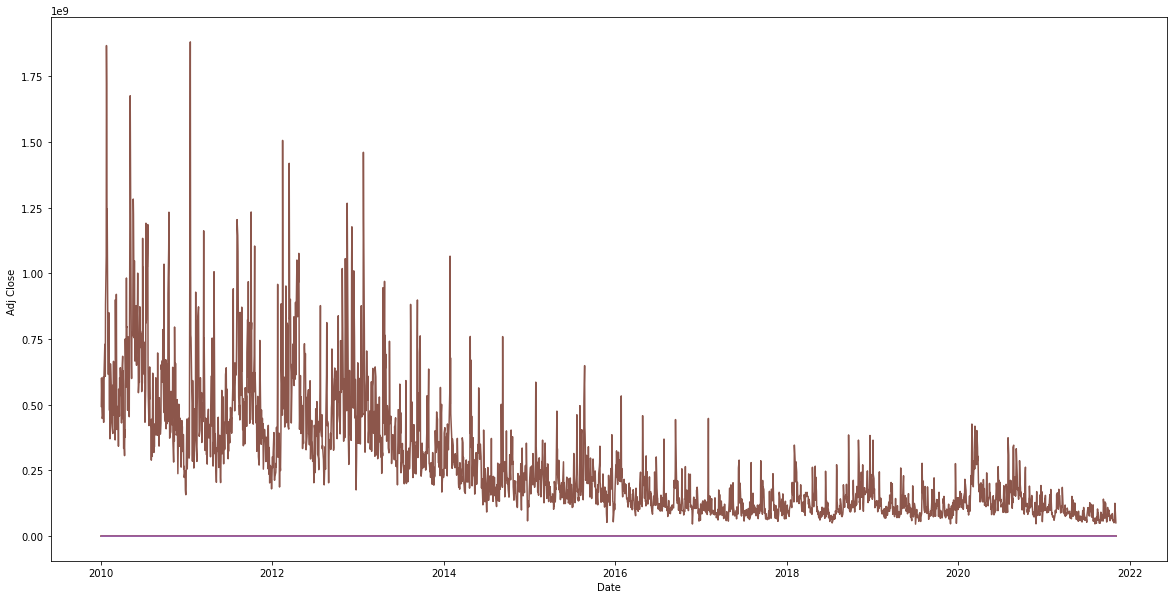

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Date")
plt.ylabel("Adj Close ")
plt.plot(data)

The provided code generates a line plot to visualize the historical trend of the "Adj Close" values over time from a DataFrame named "data".

In the first line, "plt.figure(figsize=(20,10))", the size of the plot figure is set. The "figsize" parameter is used to specify the width and height of the figure in inches. In this case, the width is set to 20 inches and the height to 10 inches. This ensures that the resulting plot has a larger size, making it easier to view and analyze the data.

The second line, "plt.xlabel("Date")", adds a label to the x-axis of the plot. This label provides a clear indication that the x-axis represents the "Date" variable. It helps users understand the information being presented along the horizontal axis.

Similarly, the third line, "plt.ylabel("Adj Close")", adds a label to the y-axis of the plot. This label indicates that the y-axis represents the "Adj Close" variable. It helps in interpreting the information displayed along the vertical axis.

The fourth line, "plt.plot(data)", generates the line plot itself. The "plot()" function from the matplotlib library is called, with the "data" DataFrame passed as the input. This plots the values from the "Adj Close" column against the corresponding dates on the x-axis, resulting in a line plot that visually represents the historical changes in the adjusted closing prices of the stock.

By executing this code, a line plot is created, providing a visual representation of the historical trend in the "Adj Close" values over time. This plot helps in understanding the patterns, fluctuations, and overall movement of the stock's adjusted closing prices. It enables users to identify trends, potential reversals, and other significant aspects related to the stock's performance.

In summary, the code generates a line plot using matplotlib to represent the historical trend of the "Adj Close" values from the DataFrame "data". The plot includes properly labeled axes and a larger figure size for enhanced visibility. It serves as a valuable tool for visual analysis and interpretation of the stock's price movement over time.

In [ ]:
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

                Open      High       Low     Close  Adj Close        Volume
Date                                                                       
2010-01-04       NaN       NaN       NaN       NaN        NaN           NaN
2010-01-05       NaN       NaN       NaN       NaN        NaN           NaN
2010-01-06       NaN       NaN       NaN       NaN        NaN           NaN
2010-01-07       NaN       NaN       NaN       NaN        NaN           NaN
2010-01-08       NaN       NaN       NaN       NaN        NaN           NaN
2010-01-11       NaN       NaN       NaN       NaN        NaN           NaN
2010-01-12       NaN       NaN       NaN       NaN        NaN           NaN
2010-01-13       NaN       NaN       NaN       NaN        NaN           NaN
2010-01-14       NaN       NaN       NaN       NaN        NaN           NaN
2010-01-15       NaN       NaN       NaN       NaN        NaN           NaN
2010-01-19       NaN       NaN       NaN       NaN        NaN           NaN
2010-01-20  

This code performs rolling window calculations on a DataFrame called "data" to calculate the rolling mean and rolling standard deviation.

In the first line, "rolmean = data.rolling(window=12).mean()", a rolling window of size 12 is applied to the "data" DataFrame using the "rolling()" function from pandas. This creates a new DataFrame, "rolmean", where each value represents the rolling mean of the previous 12 values in the "data" DataFrame. It computes the average value over a sliding window of 12 periods.

In the second line, "rolstd = data.rolling(window=12).std()", a similar rolling window operation is performed to calculate the rolling standard deviation. The resulting DataFrame, "rolstd", contains the rolling standard deviation values for each window of 12 periods in the "data" DataFrame.

The third line, "print(rolmean.head(15))", prints the first 15 rows of the "rolmean" DataFrame. This provides a preview of the calculated rolling mean values for the initial period of the dataset.

The fourth line, "print(rolstd.head(15))", prints the first 15 rows of the "rolstd" DataFrame. This displays the rolling standard deviation values for the initial period of the dataset.

By executing this code, the rolling mean and rolling standard deviation are computed for the "data" DataFrame using a window size of 12. These calculations allow for the analysis of the data's trend and variability over time. The printed outputs provide a glimpse of the computed rolling mean and standard deviation values for the initial portion of the dataset.

In summary, the code performs rolling window calculations on the "data" DataFrame to calculate the rolling mean and rolling standard deviation using a window size of 12. The printed outputs show the resulting values for the initial period of the dataset, providing insights into the trend and variability of the data over time.

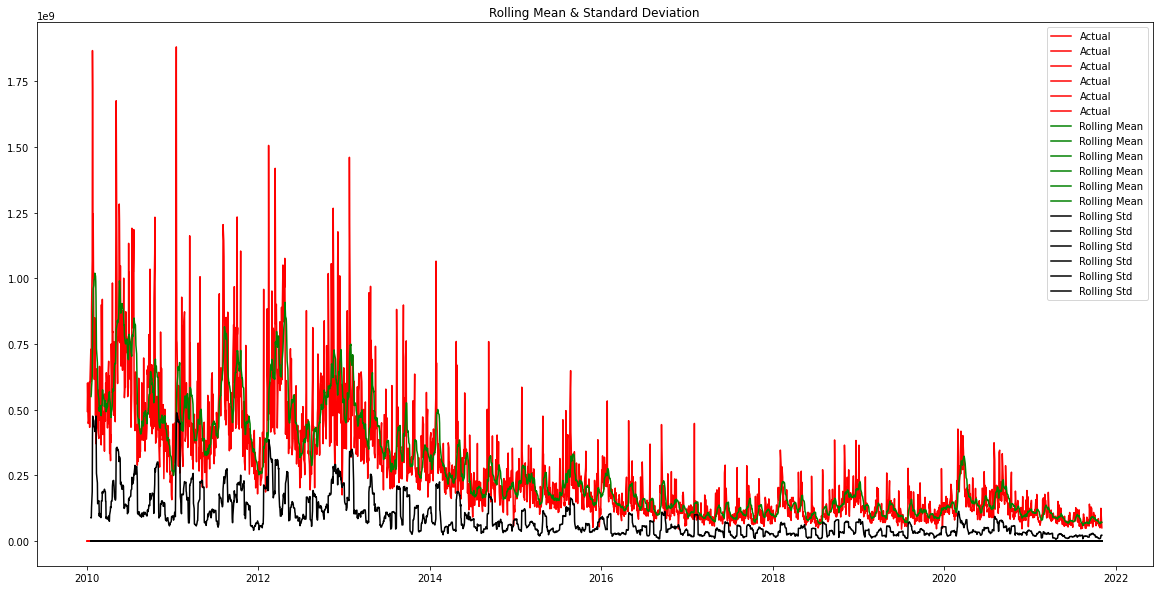

In [ ]:
plt.figure(figsize=(20,10))
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

The provided code generates a line plot to visualize the actual data, rolling mean, and rolling standard deviation of a DataFrame named "data".

In the first line, "plt.figure(figsize=(20,10))", the size of the plot figure is set. This line specifies the width and height of the figure in inches. With a width of 20 inches and a height of 10 inches, the resulting plot will have larger dimensions, making it easier to view and analyze the data.

The second line, "actual=plt.plot(data, color='red', label='Actual')", creates a line plot for the "data" DataFrame using the "plot()" function from the matplotlib library. The line plot represents the actual data points and is plotted in red. The "label" parameter assigns a label to this line plot, indicating that it represents the actual data.

Similarly, the third line, "mean_6=plt.plot(rolmean, color='green', label='Rolling Mean')", generates a line plot for the rolling mean calculated earlier. The "rolmean" DataFrame, which contains the rolling mean values, is plotted in green color. The "label" parameter assigns a label to this line plot, indicating that it represents the rolling mean.

Likewise, the fourth line, "std_6=plt.plot(rolstd, color='black', label='Rolling Std')", creates a line plot for the rolling standard deviation. The "rolstd" DataFrame, which contains the rolling standard deviation values, is plotted in black color. The "label" parameter assigns a label to this line plot, indicating that it represents the rolling standard deviation.

The fifth line, "plt.legend(loc='best')", adds a legend to the plot. The legend displays the labels assigned to each line plot, allowing for easy identification of the actual data, rolling mean, and rolling standard deviation.

The sixth line, "plt.title('Rolling Mean & Standard Deviation')", sets the title of the plot. This descriptive title provides a summary of the information being presented in the plot, specifically highlighting that it shows the rolling mean and standard deviation.

Lastly, the seventh line, "plt.show(block=False)", displays the plot. The "show()" function presents the plot window, allowing users to view the line plots of the actual data, rolling mean, and rolling standard deviation. The "block=False" parameter allows the code execution to continue without blocking, meaning the program can proceed to the next lines of code without waiting for the plot window to be closed.

In summary, the provided code creates a line plot using matplotlib to represent the actual data, rolling mean, and rolling standard deviation of the DataFrame "data". The plot provides a visual representation of these three components, enabling the comparison of the actual data with the rolling mean and standard deviation. The resulting plot helps in understanding the trends, central tendency, and variability of the data over time, aiding in the identification of patterns and potential anomalies.

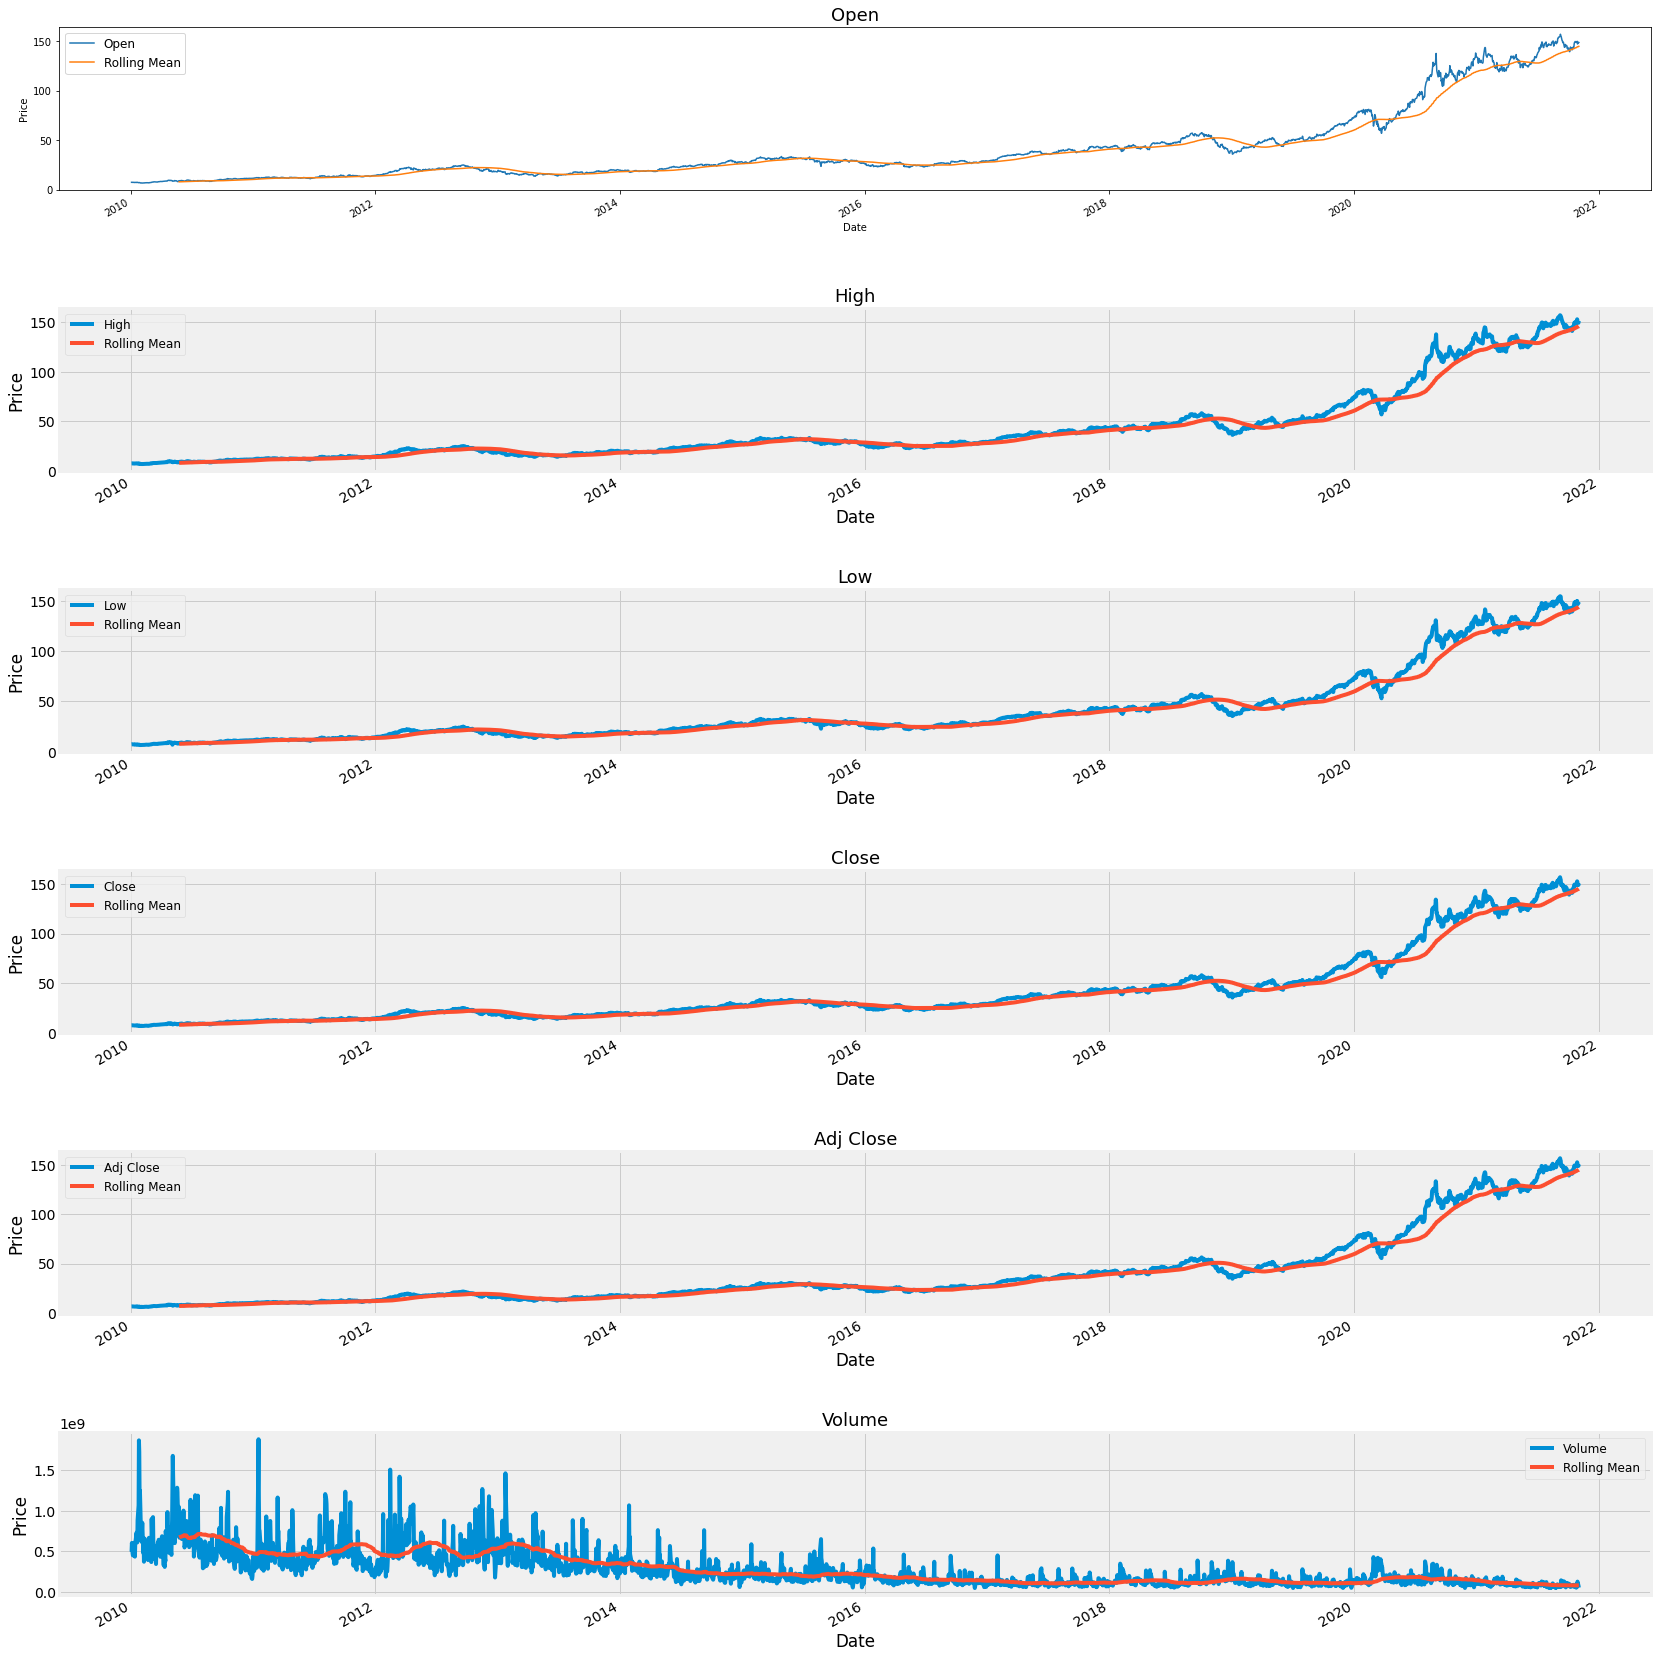

In [ ]:
col_names = data.columns

fig = plt.figure(figsize=(24, 24))
for i in range(6):
  ax = fig.add_subplot(6,1,i+1)
  ax.plot(data.iloc[:,i],label=col_names[i])
  data.iloc[:,i].rolling(100).mean().plot(label='Rolling Mean')
  ax.set_title(col_names[i],fontsize=18)
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  ax.patch.set_edgecolor('black')  
  plt.style.context('fivethirtyeight')
  plt.legend(prop={'size': 12})
  plt.style.use('fivethirtyeight')

fig.tight_layout(pad=3.0)

plt.show()

The provided code generates multiple line plots to visualize the price data for different variables within the DataFrame "data".

In the first line, the column names of the DataFrame are retrieved and stored in the variable "col_names". These column names represent the different variables or attributes of the data.

The second line initializes a new figure object using the matplotlib library. The specified figure size of 24 inches by 24 inches ensures that the resulting plots will have sufficient space for clear visibility and readability.

The subsequent lines set up a loop that iterates six times, indicating the number of variables to be plotted. Within each iteration, the code performs the following steps:

A new subplot is added to the figure using the "fig.add_subplot(6,1,i+1)" function. This creates a vertical arrangement of subplots, with each subplot representing a different variable.
The values of the variable from the "data" DataFrame are plotted using "ax.plot(data.iloc[:,i], label=col_names[i])". This line plot represents the price data for the specific variable.
The rolling mean of the variable is computed and plotted using "data.iloc[:,i].rolling(100).mean().plot(label='Rolling Mean')". This adds a line plot that represents the rolling mean of the variable, using a window size of 100.
The subplot's title, x-axis label, and y-axis label are set using "ax.set_title()", "ax.set_xlabel()", and "ax.set_ylabel()", respectively. These labels provide clear descriptions for each subplot, aiding in understanding the information being presented.
Customizations are applied to the appearance of each subplot. This includes setting the edge color of the subplot using "ax.patch.set_edgecolor('black')", applying a specific visual style using "plt.style.context('fivethirtyeight')", and adjusting the size of the legend using "plt.legend(prop={'size': 12})".
The global style for the plots is set using "plt.style.use('fivethirtyeight')". This ensures a consistent visual style across all the subplots.
After completing the loop, "fig.tight_layout(pad=3.0)" adjusts the spacing between the subplots, enhancing readability by reducing overlapping elements.

Finally, "plt.show()" is called to display the generated plot, presenting the multiple line plots of the variables within the "data" DataFrame.

In summary, the provided code generates multiple line plots to visualize the price data for different variables within the DataFrame "data". Each variable is represented by a line plot, accompanied by a subplot title, labels for the x-axis and y-axis, and additional customizations. The resulting figure displays the line plots for the variables, providing a clear and organized visualization of the price data.

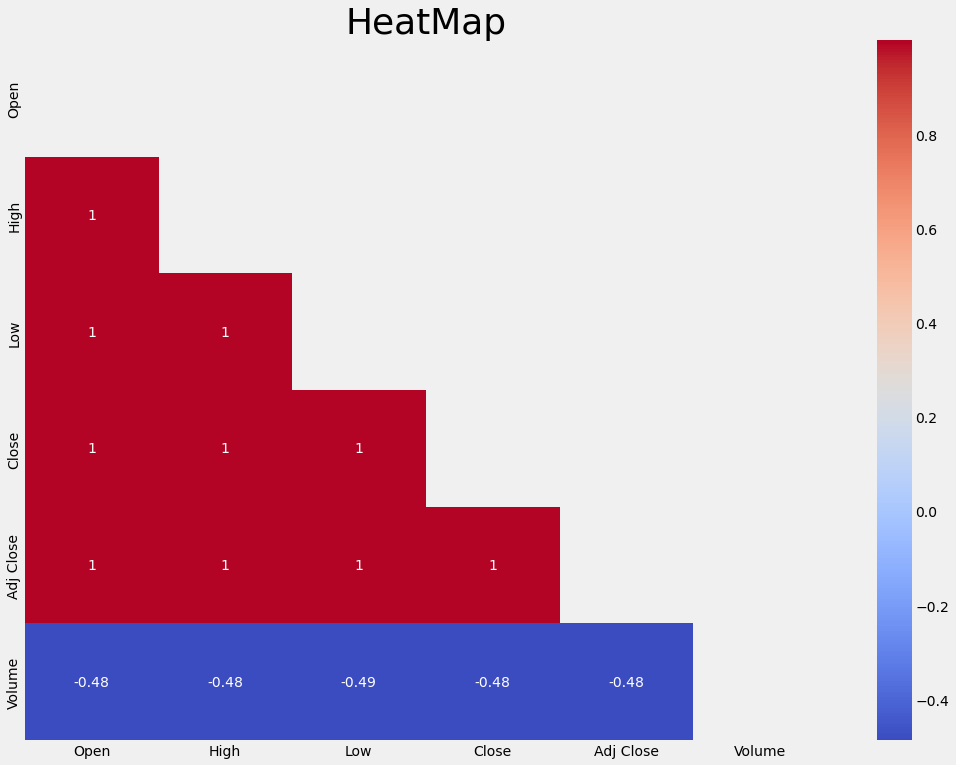

In [ ]:
##HeatMap to Verify Multicollinearity between Features
fig = plt.figure(figsize=(16,12))
matrix = np.triu(data.corr())
ax = sns.heatmap(data.corr(),annot=True,annot_kws={"size":14},mask=matrix,cmap='coolwarm')
ax.tick_params(labelsize=14)
sns.set(font_scale=3)
ax.set_title('HeatMap')
plt.style.use('fivethirtyeight')
plt.show()

This code generates a heatmap to visualize the correlations between features (variables) in the DataFrame "data" and check for multicollinearity.

The first line initializes a new figure object using matplotlib with a specified figure size of 16 inches by 12 inches. This ensures that the resulting heatmap has an appropriate size for clear visibility.

The next line creates a correlation matrix using "data.corr()". This matrix represents the pairwise correlations between all the features in the "data" DataFrame.

The "np.triu()" function is applied to the correlation matrix to obtain the upper triangular part of the matrix. This is done to create a mask for the heatmap, as the lower triangular part is redundant due to the matrix's symmetry.

The "sns.heatmap()" function is then called to generate the heatmap. The "annot=True" parameter adds numeric values as annotations to the heatmap cells, representing the correlations between the features. The "annot_kws={"size":14}" parameter sets the font size for the annotations.

The "mask=matrix" parameter masks the lower triangular part of the heatmap using the previously created mask. This hides the redundant information and focuses on the correlations in the upper triangular part.

The "cmap='coolwarm'" parameter sets the color map for the heatmap, using the coolwarm color scheme to represent positive and negative correlations.

Additional adjustments to the plot are made, such as setting the tick label size using "ax.tick_params(labelsize=14)", increasing the font scale using "sns.set(font_scale=3)", setting the title of the plot as 'HeatMap' using "ax.set_title('HeatMap')", and applying a specific visual style using "plt.style.use('fivethirtyeight')".

Finally, "plt.show()" is called to display the generated heatmap.

In summary, this code generates a heatmap using seaborn and matplotlib to visualize the correlations between features in the DataFrame "data" and identify potential multicollinearity. The heatmap provides a color-coded representation of the correlations, with annotations indicating the strength of the relationships. This allows for a quick assessment of the interdependencies between features and aids in identifying variables that may be highly correlated, which can affect the accuracy and interpretability of certain statistical models.

In [ ]:
data_feature_selected = data.drop(axis=1,labels=['Open','High','Low','Close','Volume'])

This code creates a new DataFrame called "data_feature_selected" by removing specific columns from the original DataFrame "data".

The "drop()" function is used to remove columns from the DataFrame. In this case, the columns to be dropped are specified using the "labels" parameter, which is set to ['Open', 'High', 'Low', 'Close', 'Volume']. These column labels represent the columns that need to be removed.

The "axis=1" parameter indicates that the operation should be performed along the column axis. This means that the specified columns will be dropped from the DataFrame.

By executing this code, the specified columns ('Open', 'High', 'Low', 'Close', 'Volume') are removed from the original DataFrame "data". The resulting DataFrame, "data_feature_selected", contains all the remaining columns from the original DataFrame except for the dropped columns.

This operation can be useful when there is a need to focus on a subset of features or when certain columns are not required for a specific analysis or modeling task. It allows for the creation of a new DataFrame that only includes the desired columns, providing a more streamlined and focused dataset for further analysis or modeling purposes.

In [ ]:
col_order = ['Adj Close']
data_feature_selected = data_feature_selected.reindex(columns=col_order)
data_feature_selected

Adj Close
Date                  
2010-01-04    6.562589
2010-01-05    6.573936
2010-01-06    6.469368
2010-01-07    6.457407
2010-01-08    6.500340
...                ...
2021-10-27  148.850006
2021-10-28  152.570007
2021-10-29  149.800003
2021-11-01  148.960007
2021-11-02  150.580002

[2980 rows x 1 columns]

This code reorders the columns in the DataFrame "data_feature_selected" to have a specific column order based on the list of column names provided.

The first line defines the desired column order using the variable "col_order", which is set to ['Adj Close']. This list contains the names of the columns in the desired order.

The second line uses the "reindex()" function to rearrange the columns in "data_feature_selected" based on the specified column order. The "columns=col_order" parameter ensures that the columns are reindexed according to the order specified in the "col_order" list.

By executing this code, the columns in "data_feature_selected" are reordered to have 'Adj Close' as the first (and only) column. The resulting DataFrame, "data_feature_selected", will have its columns rearranged to match the desired order.

This operation can be useful when there is a need to manipulate the column order in a DataFrame. It allows for the customization of the column sequence to match specific requirements or preferences. In this case, the code ensures that 'Adj Close' is the first column in the DataFrame.

In [ ]:
##Resample Data to Monthly instead of Daily by Aggregating Using Mean
monthly_mean = data_feature_selected['Adj Close'].resample('M').mean()

This code performs data resampling on the 'Adj Close' column of the DataFrame "data_feature_selected" to convert the data from a daily frequency to a monthly frequency. The resampling is done by aggregating the daily data using the mean value.

The first line assigns the result of the resampling operation to a new variable called "monthly_mean". This variable will store the resampled data.

The second line of code applies the resampling operation using the "resample()" function on the 'Adj Close' column. The parameter 'M' is passed to the function to indicate that the data should be resampled on a monthly basis.

The 'mean()' function is chained to the resampling operation, specifying that the resampled values should be computed as the mean of the data within each monthly period.

By executing this code, the 'Adj Close' data in the DataFrame "data_feature_selected" is resampled from a daily frequency to a monthly frequency. The resulting "monthly_mean" variable will contain the mean value of the 'Adj Close' for each month.

Resampling data can be helpful when there is a need to change the temporal resolution of the data to a coarser or finer scale. In this case, the code converts the daily data to a monthly average. This can be useful for summarizing the data over longer time periods, identifying trends, or reducing the dimensionality of the dataset for analysis or modeling purposes.

In [ ]:
monthly_data = monthly_mean.to_frame()
monthly_data

Adj Close
Date                  
2010-01-31    6.369562
2010-02-28    6.096047
2010-03-31    6.850866
2010-04-30    7.701438
2010-05-31    7.711035
...                ...
2021-07-31  144.922394
2021-08-31  148.137819
2021-09-30  148.306190
2021-10-31  145.563809
2021-11-30  149.770005

[143 rows x 1 columns]

This code converts the pandas Series "monthly_mean" into a DataFrame called "monthly_data" while preserving the index of the original Series.

The first line assigns the result of the conversion to the "monthly_data" variable. This variable will store the converted DataFrame.

The second line of code uses the "to_frame()" function to convert the pandas Series "monthly_mean" into a DataFrame. This function converts a Series object into a DataFrame with a single column, where the original index is retained.

By executing this code, the Series "monthly_mean" is transformed into a DataFrame named "monthly_data". The resulting DataFrame will have a single column containing the values from the Series, and the original index of the Series will be preserved as the index of the DataFrame.

This conversion can be useful when there is a need to work with a DataFrame instead of a Series. It allows for additional operations, such as joining or merging with other DataFrames, accessing DataFrame-specific methods, or performing analysis or modeling tasks that require tabular data structure.

In [ ]:
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data['dayofweek'] = monthly_data.index.strftime('%A')
monthly_data['quarter'] = monthly_data.index.quarter
monthly_data

Adj Close  Year      Month  dayofweek  quarter
Date                                                       
2010-01-31    6.369562  2010    January     Sunday        1
2010-02-28    6.096047  2010   February     Sunday        1
2010-03-31    6.850866  2010      March  Wednesday        1
2010-04-30    7.701438  2010      April     Friday        2
2010-05-31    7.711035  2010        May     Monday        2
...                ...   ...        ...        ...      ...
2021-07-31  144.922394  2021       July   Saturday        3
2021-08-31  148.137819  2021     August    Tuesday        3
2021-09-30  148.306190  2021  September   Thursday        3
2021-10-31  145.563809  2021    October     Sunday        4
2021-11-30  149.770005  2021   November    Tuesday        4

[143 rows x 5 columns]

The provided code enhances the DataFrame "monthly_data" by adding several new columns that provide additional temporal information based on the index values.

One of the new columns is 'Year', which represents the year component of the index values. It allows for grouping and analysis of data at the yearly level, enabling insights into yearly trends and patterns.

Another column introduced is 'Month', which contains the month names in a full-text format (e.g., 'January', 'February', etc.). This column facilitates examination of the data at the monthly level, aiding in identifying any monthly patterns or seasonal effects.

The 'dayofweek' column displays the corresponding day of the week for each data point. By formatting the index values, this column provides information about the specific day of the week associated with each data entry. It can be used to analyze any recurring patterns or day-of-the-week effects in the data.

Lastly, the 'quarter' column indicates the quarter of the year for each data point. It enables grouping and analysis of the data based on quarters, assisting in understanding any quarterly variations or trends.

By executing this code, the DataFrame "monthly_data" is enriched with these additional columns, enhancing the temporal analysis capabilities. The new columns provide insights into the year, month, day of the week, and quarter associated with each data entry. This expanded temporal information supports more in-depth investigations, enabling the identification of temporal patterns and relationships within the data.

In [ ]:
from sklearn.model_selection import train_test_split as split
import itertools
warnings.filterwarnings("ignore")
from IPython import display
from matplotlib import pyplot
import os
import re
#from colorama import Fore, Back, Style
import seaborn as sns
import plotly.express as px
import warnings
from matplotlib.patches import Patch

This code imports various modules and libraries for data manipulation, visualization, and modeling tasks.

The line "from sklearn.model_selection import train_test_split as split" imports the "train_test_split" function from the "sklearn.model_selection" module. This function is commonly used for splitting data into training and testing sets for machine learning models.

The line "import itertools" imports the "itertools" module, which provides functions for efficient looping and iteration.

The line "warnings.filterwarnings("ignore")" suppresses the display of warning messages during code execution.

The line "from IPython import display" imports the "display" module from the "IPython" library, which allows for rich media display and interaction in IPython environments.

The line "from matplotlib import pyplot" imports the "pyplot" module from the "matplotlib" library, which provides a MATLAB-like interface for plotting.

The line "import os" imports the "os" module, which provides functions for interacting with the operating system, such as file and directory manipulation.

The line "import re" imports the "re" module, which provides regular expression matching operations for string manipulation and pattern matching.

The line "import seaborn as sns" imports the "sns" module from the "seaborn" library, which offers enhanced data visualization capabilities.

The line "import plotly.express as px" imports the "px" module from the "plotly.express" library, which provides a high-level interface for creating interactive plots.

The line "import warnings" imports the "warnings" module, which allows for handling warning messages during code execution.

The line "from matplotlib.patches import Patch" imports the "Patch" class from the "matplotlib.patches" module, which provides various shapes and patches for customizing plots.

By importing these modules and libraries, the code prepares the necessary tools and functionalities for subsequent data manipulation, visualization, and modeling tasks.

(array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 ]),
 <a list of 7 Text major ticklabel objects>)

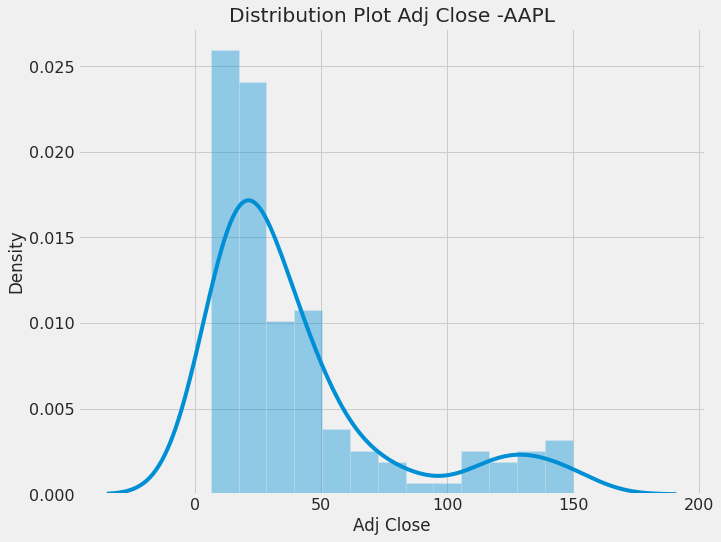

In [ ]:
fig = plt.figure(figsize=(10,8))
sns.distplot(monthly_data['Adj Close']).set_title("Distribution Plot Adj Close -AAPL")
#ax.tick_params(labelsize=12)
sns.set(font_scale=1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

This code creates a figure object with a specified size of 10 inches by 8 inches using the "fig = plt.figure(figsize=(10,8))" line. This figure will be used to display a distribution plot.

The next line of code utilizes the seaborn library to generate a distribution plot of the 'Adj Close' values from the "monthly_data" DataFrame. The "sns.distplot()" function is called with the 'Adj Close' column as the input data. The resulting plot represents the distribution of the 'Adj Close' values and provides insights into their spread and shape.

The "set_title()" function is chained to the distribution plot to set the plot's title as "Distribution Plot Adj Close -AAPL". This title provides a concise description of the plotted data and the company or asset it relates to (AAPL in this case).

The subsequent lines adjust the styling and appearance of the plot. The "sns.set(font_scale=1)" line sets the font scale for the seaborn library, ensuring that the plot's text elements are displayed at an appropriate size.

The "plt.xticks(fontsize=16)" and "plt.yticks(fontsize=16)" lines set the font size of the x-axis and y-axis tick labels, respectively. This adjustment enhances the readability of the tick labels by increasing their font size.

By executing this code, a distribution plot of the 'Adj Close' values from the "monthly_data" DataFrame is displayed in a figure. The plot is titled "Distribution Plot Adj Close -AAPL" and is styled with appropriate font sizes for the text elements and tick labels, enhancing the visual presentation of the data.

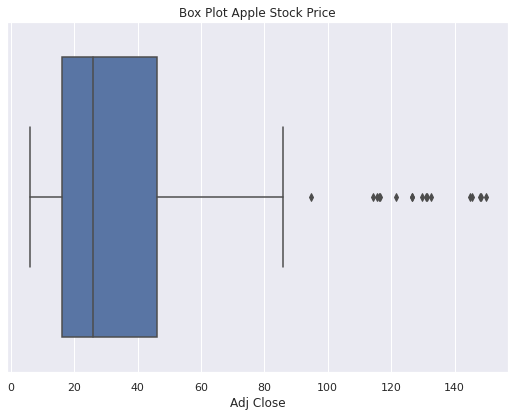

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(monthly_data['Adj Close']).set_title('Box Plot Apple Stock Price')
plt.style.context('fivethirtyeight')

This code creates a figure object with a size of 8 inches by 6 inches using the "fig = plt.figure(figsize=(8,6))" line. This figure will be used to display a box plot.

The next line of code utilizes the seaborn library to generate a box plot of the 'Adj Close' values from the "monthly_data" DataFrame. The "sns.boxplot()" function is called with the 'Adj Close' column as the input data. The resulting plot displays the distribution of the 'Adj Close' values through the use of a box and whisker representation.

The "set_title()" function is chained to the box plot to set the plot's title as "Box Plot Apple Stock Price". This title provides a descriptive label for the plotted data, specifying that it pertains to the stock price of Apple.

The final line applies a specific visual style to the plot using "plt.style.context('fivethirtyeight')". This style, known as "fivethirtyeight", is designed to replicate the visual aesthetics of the popular FiveThirtyEight data journalism website. It enhances the plot's appearance with a distinctive and visually appealing style.

By executing this code, a box plot of the 'Adj Close' values from the "monthly_data" DataFrame is displayed in a figure. The plot represents the distribution of the stock prices and allows for visualizing key statistical measures such as the median, quartiles, and outliers. The plot is titled "Box Plot Apple Stock Price" and is styled using the "fivethirtyeight" style, which enhances its visual appeal and adherence to a specific design aesthetic.

Text(0.5, 1.0, 'QQ Plot Apple Stock Price')

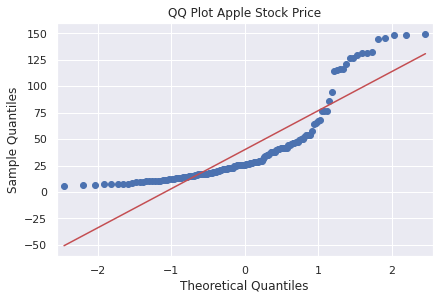

In [ ]:
qq_plot = qq(monthly_data['Adj Close'],line='s')
plt.title('QQ Plot Apple Stock Price')

This code generates a Q-Q plot to assess the normality of the distribution of the 'Adj Close' values from the "monthly_data" DataFrame.

The first line of code creates the Q-Q plot using the "qq()" function, which is likely a function imported from a specific library or package. The 'Adj Close' column is passed as the input data for the Q-Q plot. The "line='s'" parameter specifies that a standardized line should be added to the plot, which aids in assessing the departure from normality.

The second line of code sets the title of the plot as "QQ Plot Apple Stock Price", providing a descriptive label for the plotted data, indicating that it pertains to the stock price of Apple.

By executing this code, a Q-Q plot is displayed, representing the 'Adj Close' values from the "monthly_data" DataFrame. A Q-Q plot compares the quantiles of a dataset against the quantiles of a specified theoretical distribution, usually the normal distribution. It helps assess whether the data follows a normal distribution or deviates from it. The plot is titled "QQ Plot Apple Stock Price" and provides insights into the normality of the stock price distribution for Apple.

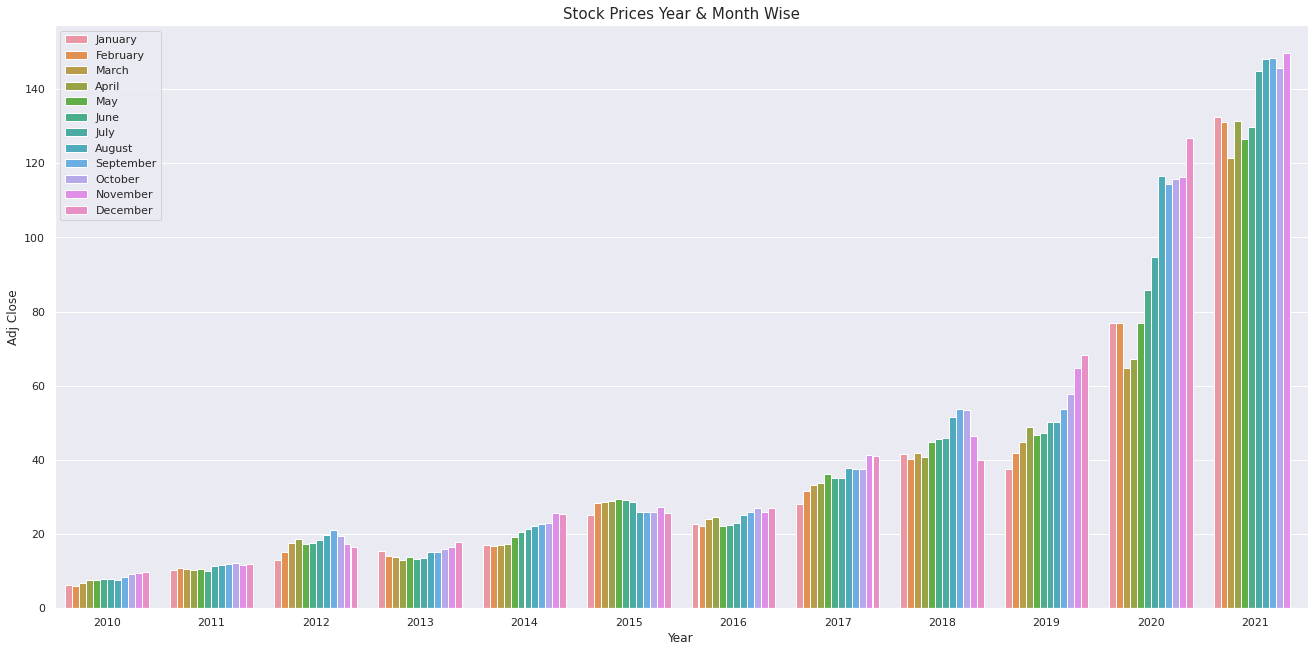

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="Year", y="Adj Close",hue = 'Month',data=monthly_data)
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

This code generates a grouped bar plot to visualize the stock prices year and month-wise from the "monthly_data" DataFrame.

The first line initializes a figure and axes object using "fig, ax = plt.subplots(figsize=(20,10))". This creates a plot figure with a specific size of 20 inches by 10 inches.

The line "palette = sns.color_palette("mako_r", 4)" sets a custom color palette for the bars in the bar plot. The "mako_r" palette is used with 4 colors to provide a visually appealing and distinguishable color scheme.

The next line of code creates the bar plot using the "sns.barplot()" function. The 'Year' column is specified as the x-axis variable, the 'Adj Close' column as the y-axis variable, and the 'Month' column is used for grouping and differentiating the bars. The data source is the "monthly_data" DataFrame.

The line "a.set_title("Stock Prices Year & Month Wise",fontsize=15)" sets the title of the bar plot as "Stock Prices Year & Month Wise" with a font size of 15. This title provides a concise description of the plotted data and the variables represented in the plot.

The line "plt.legend(loc='upper left')" adds a legend to the plot, positioning it in the upper-left corner. The legend helps in identifying the different months represented by the bars.

Finally, "plt.show()" is called to display the generated bar plot.

By executing this code, a grouped bar plot is shown, representing the stock prices year and month-wise from the "monthly_data" DataFrame. The plot provides a visual comparison of the stock prices across different years and months, with each month having a distinct color. The plot title, "Stock Prices Year & Month Wise," describes the content of the plot, and the legend aids in interpreting the different colors and corresponding months.

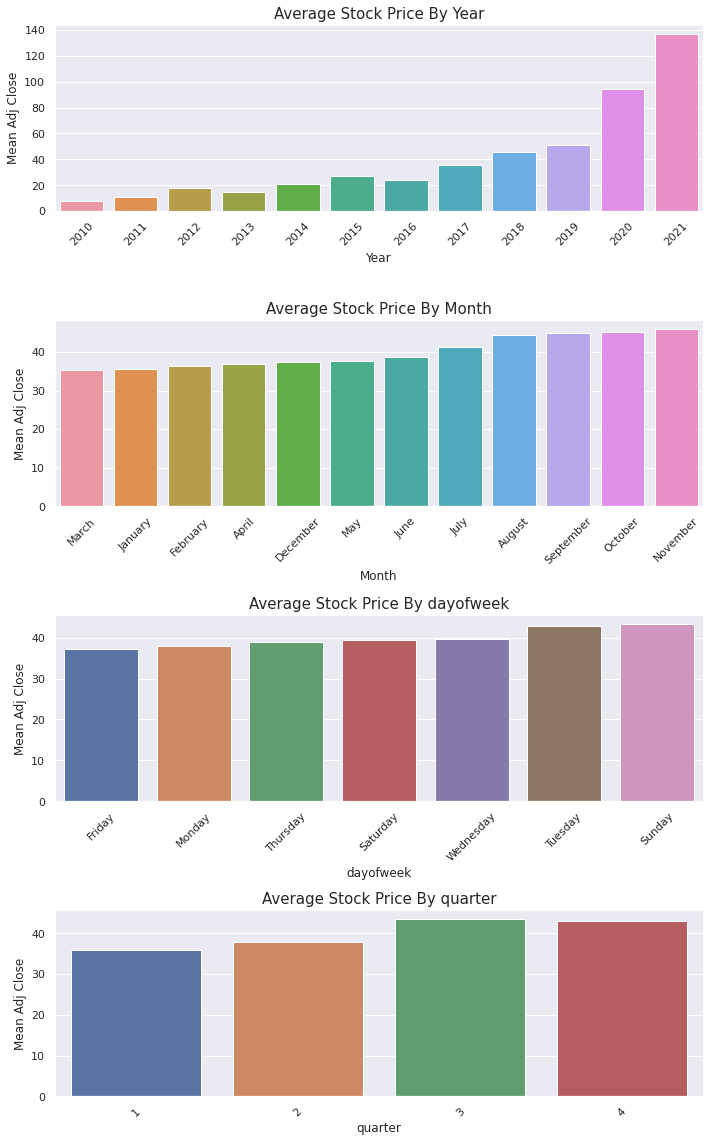

In [ ]:
fig = plt.figure(figsize=(10,16))
fig.set_size_inches(10,16)
group_cols = monthly_data.columns

for enum,i in enumerate(group_cols[1:]):
  ax = fig.add_subplot(4,1,enum+1)
  Aggregated = pd.DataFrame(monthly_data.groupby(str(i))["Adj Close"].mean()).reset_index().sort_values('Adj Close')
  sns.barplot(data=Aggregated,x=str(i),y="Adj Close",ax=ax)
  ax.set(xlabel=str(i), ylabel='Mean Adj Close')
  ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
  plt.xticks(rotation=45)
  
plt.tight_layout(pad=1)

This code generates a set of grouped bar plots, each representing the average stock price by a specific grouping variable from the "monthly_data" DataFrame.

The first line of code creates a figure object with a size of 10 inches by 16 inches using "fig = plt.figure(figsize=(10,16))". This figure will contain the grouped bar plots.

The line "fig.set_size_inches(10,16)" sets the figure size to 10 inches by 16 inches. This ensures that the figure dimensions match the specified values.

The variable "group_cols" is assigned the column names of the "monthly_data" DataFrame.

The subsequent lines of code iterate over the grouping variables (columns) starting from the second column using "group_cols[1:]". For each grouping variable, the code creates a subplot using "fig.add_subplot(4,1,enum+1)" and assigns it to the variable "ax". The 4, 1 in the subplot specification denotes a 4x1 grid, indicating that there will be 4 subplots arranged vertically.

Within each iteration, a new DataFrame called "Aggregated" is created by grouping the "monthly_data" DataFrame by the current grouping variable and calculating the mean of the 'Adj Close' column. The resulting DataFrame is sorted based on the 'Adj Close' values.

The next line of code utilizes the seaborn library to generate a bar plot using the "sns.barplot()" function. The "x" parameter is set to the current grouping variable, the "y" parameter is set to 'Adj Close', and the data source is the "Aggregated" DataFrame. The resulting plot shows the average stock price for each level of the grouping variable.

Additional code sets labels and titles for each subplot, such as setting the x-label to the current grouping variable, the y-label to 'Mean Adj Close', and the title to "Average Stock Price By {}".format(str(i)), where "i" represents the current grouping variable.

The line "plt.xticks(rotation=45)" rotates the x-axis tick labels by 45 degrees to improve readability when the labels are long.

The code ends with "plt.tight_layout(pad=1)", which adjusts the spacing between subplots to avoid overlapping or crowding.

By executing this code, a set of grouped bar plots is displayed in a figure. Each plot represents the average stock price by a specific grouping variable from the "monthly_data" DataFrame. The x-axis of each plot corresponds to the levels of the grouping variable, and the y-axis represents the mean adjusted close price. The subplots are arranged vertically, and each plot is labeled with the respective grouping variable and a title indicating the average stock price by that variable. The figure provides a visual comparison of the average stock prices across different levels of each grouping variable, aiding in understanding the relationship between the variables and the stock prices.

<Figure size 1440x1152 with 0 Axes>

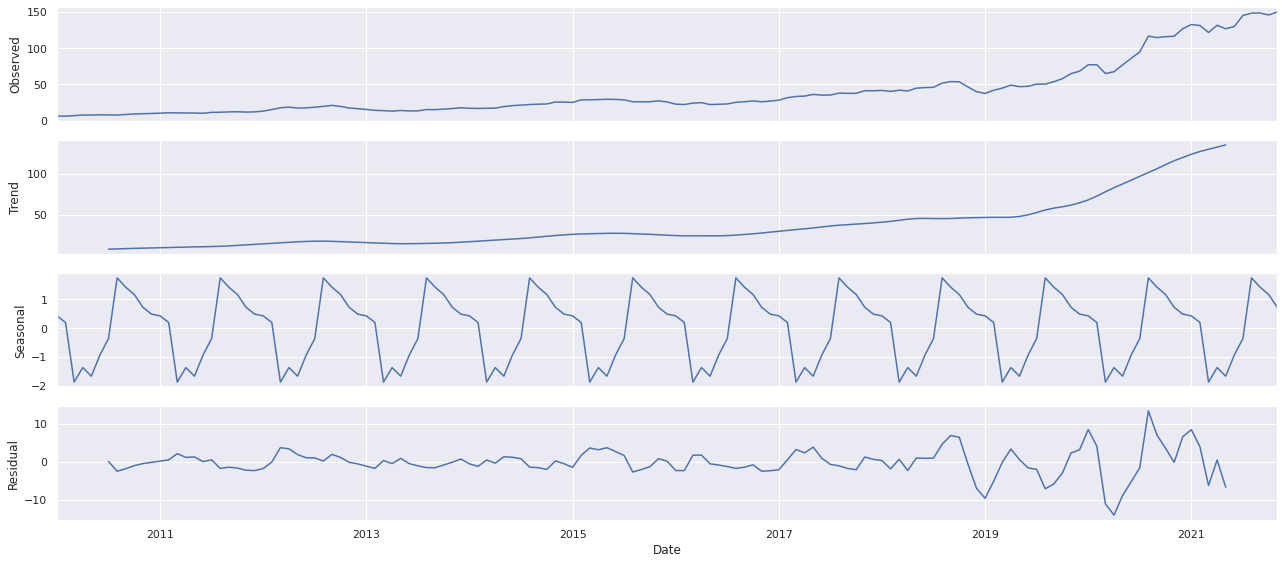

In [ ]:
rcParams['figure.figsize'] = 18, 8
plt.figure(figsize=(20,16))
decomposed_series = sd(monthly_data['Adj Close'],model='additive',freq=12)
decomposed_series.plot()
plt.show()

This code generates a time series decomposition plot for the 'Adj Close' values from the "monthly_data" DataFrame.

The first line of code modifies the default figure size by setting the 'figure.figsize' parameter in the 'rcParams' dictionary to a width of 18 inches and a height of 8 inches. This ensures that subsequent plots will have the desired dimensions.

The second line of code creates a new figure with a size of 20 inches by 16 inches using "plt.figure(figsize=(20,16))". This figure will be used to display the time series decomposition plot.

The third line of code performs time series decomposition using the "sd()" function, which is likely a function imported from a specific library or package. The 'Adj Close' column from the "monthly_data" DataFrame is passed as the input series for decomposition. The decomposition is performed using an additive model, which assumes that the observed series is a combination of trend, seasonality, and residuals. The "freq=12" parameter specifies that the series has a seasonal pattern with a frequency of 12 (indicating monthly data).

The fourth line of code plots the decomposed series using the "plot()" function on the "decomposed_series" object. This plot displays the original 'Adj Close' series along with the decomposed components, such as the estimated trend, seasonality, and residuals.

The final line of code displays the generated plot using "plt.show()".

By executing this code, a time series decomposition plot is shown in the figure. The plot visualizes the 'Adj Close' series from the "monthly_data" DataFrame and its decomposed components, providing insights into the underlying trend, seasonal patterns, and residual fluctuations. This type of plot is helpful for understanding the different components of a time series and identifying any systematic patterns or irregularities.

In [ ]:
##ADF Test-Statsmodels Library

def ad_fuller_func(X):
  result_ad_fuller = adfuller(X)
  print('ADF Statistic: %f' % result_ad_fuller[0])
  print('p-value: %f' %result_ad_fuller[1])
  print('Critical Values:')
  for key, value in result_ad_fuller[4].items():
	  print('\t%s: %.3f' % (key, value))
 
  if result_ad_fuller[0] < result_ad_fuller[4]['5%']:
    print('Reject Null Hypothesis(Ho)-Time Series is Stationary')
  else:
    print('Failed to Reject Ho-Time Series is Non-Stationary')

The provided code defines a function named "ad_fuller_func" that performs the Augmented Dickey-Fuller (ADF) test using the Statsmodels library to determine if a given time series is stationary or non-stationary.

The ADF test is a statistical test commonly used to assess the presence of a unit root in a time series. The presence of a unit root indicates that the time series is non-stationary, meaning it exhibits trends, seasonality, or other time-dependent patterns. Conversely, the absence of a unit root suggests that the time series is stationary, indicating that it lacks any significant trends or patterns.

The "ad_fuller_func" function takes an input time series, denoted as "X", as a parameter. It applies the ADF test to the provided time series using the "adfuller()" function from the Statsmodels library.

The function then prints several key results of the ADF test. It displays the ADF statistic, which measures the strength of the evidence against the null hypothesis of non-stationarity. The p-value is also printed, representing the probability of observing the ADF statistic under the null hypothesis. Additionally, the critical values at different significance levels are shown.

Based on the results, the function determines whether to reject or fail to reject the null hypothesis. If the ADF statistic is less than the critical value at a significance level of 5%, the function concludes that the time series is stationary and rejects the null hypothesis. On the other hand, if the ADF statistic is greater than the critical value, the function fails to reject the null hypothesis and concludes that the time series is non-stationary.

By utilizing this function and providing a time series as input, users can apply the ADF test to determine the stationarity of the time series and make inferences about its behavior over time.

In [ ]:
ad_fuller_func(monthly_data['Adj Close'])

ADF Statistic: 1.739073
p-value: 0.998220
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Failed to Reject Ho-Time Series is Non-Stationary


This code calls the previously defined function "ad_fuller_func" and passes the 'Adj Close' values from the "monthly_data" DataFrame as an argument.

The "ad_fuller_func" function performs the Augmented Dickey-Fuller (ADF) test on the given time series to determine if it is stationary or non-stationary. The ADF test examines the presence of a unit root in the series, which indicates non-stationarity.

By passing the 'Adj Close' values to the "ad_fuller_func" function, this code applies the ADF test specifically to the 'Adj Close' time series data from the "monthly_data" DataFrame.

Once executed, the function prints several key results of the ADF test, including the ADF statistic, p-value, and critical values at different significance levels. It also provides a conclusion about the stationarity of the time series based on whether the ADF statistic is less than the critical value at a significance level of 5%.

By calling this code, users can assess the stationarity of the 'Adj Close' time series and make informed decisions about the analysis or modeling of the data.

Time Series is Not Stationary as observed earlier also by Decomposition(Trend and Seasonality Present)


Text(0.5, 0, 'Lags')

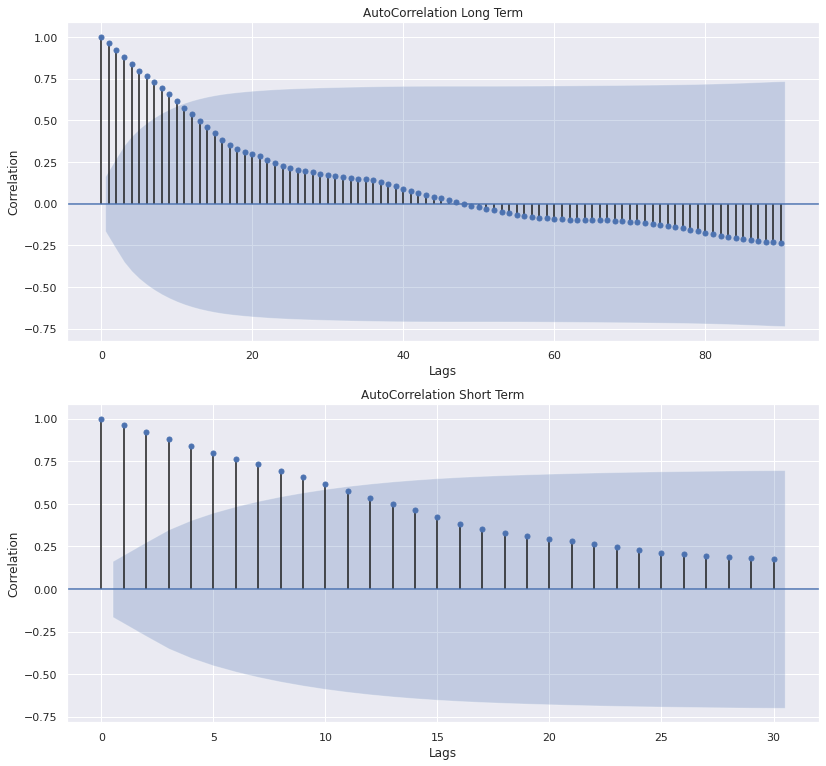

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(12,12))
acf = plot_acf(monthly_data['Adj Close'],lags=90,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(monthly_data['Adj Close'],lags=30,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')    # auto correction
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

This code generates two subplots within a single figure to visualize the autocorrelation of the 'Adj Close' values from the "monthly_data" DataFrame.

The first line of code initializes the figure and axes objects, creating a figure with two subplots arranged vertically. The variable names "ax1" and "ax2" are assigned to the axes objects of the two subplots.

The next line of code uses the "plot_acf()" function, which is likely imported from a specific library, to plot the autocorrelation function (ACF) of the 'Adj Close' values. The ACF measures the correlation between a time series and its lagged values at different time lags. The ACF plot visualizes the correlation coefficients as a function of the lag.

In the first subplot, the ACF plot is generated with a maximum lag of 90 using the "lags=90" parameter. This plot represents the long-term autocorrelation of the 'Adj Close' values.

The following line of code sets the title of the first subplot as "AutoCorrelation Long Term".

The ACF plot is then generated again in the second subplot, but this time with a maximum lag of 30 using the "lags=30" parameter. This plot represents the short-term autocorrelation of the 'Adj Close' values.

The subsequent line of code sets the title of the second subplot as "AutoCorrelation Short Term".

The code then sets the y-axis label as "Correlation" for both subplots and the x-axis label as "Lags".

By executing this code, two subplots are displayed within a single figure. The first subplot shows the long-term autocorrelation of the 'Adj Close' values, while the second subplot displays the short-term autocorrelation. These plots provide insights into the correlation between the 'Adj Close' values and their lagged values at different time lags. The y-axis represents the correlation coefficients, and the x-axis denotes the time lags. The figure enables the visual examination of any significant correlation patterns or trends in the 'Adj Close' series.

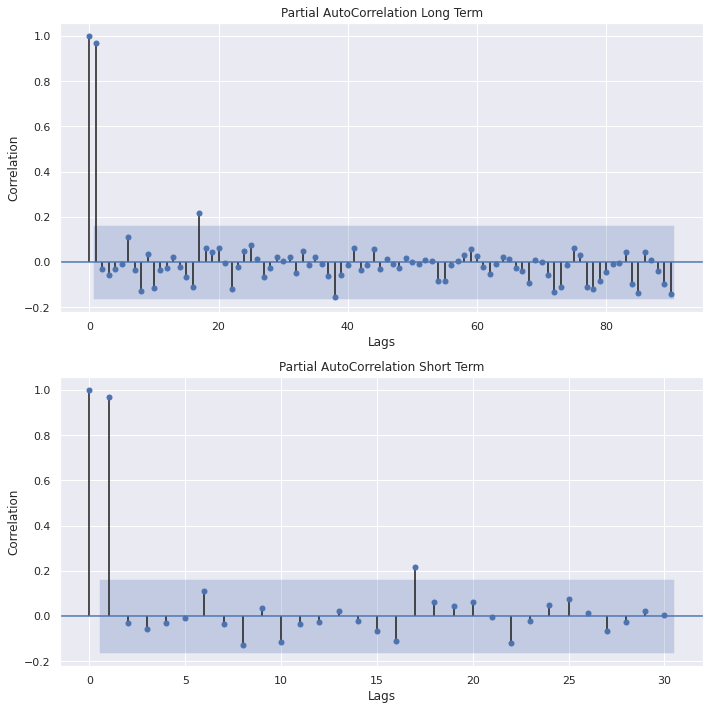

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
pacf = plot_pacf(monthly_data['Adj Close'],lags=90,ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
pacf = plot_pacf(monthly_data['Adj Close'],lags=30,ax=ax2)
ax2.set_title('Partial AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

This code generates two subplots within a single figure to visualize the partial autocorrelation of the 'Adj Close' values from the "monthly_data" DataFrame.

The first line of code initializes the figure and axes objects, creating a figure with two subplots arranged vertically. The variable names "ax1" and "ax2" are assigned to the axes objects of the two subplots.

The next line of code uses the "plot_pacf()" function, likely imported from a specific library, to plot the partial autocorrelation function (PACF) of the 'Adj Close' values. The PACF measures the correlation between a time series and its lagged values while removing the correlation explained by shorter lags.

In the first subplot, the PACF plot is generated with a maximum lag of 90 using the "lags=90" parameter. This plot represents the long-term partial autocorrelation of the 'Adj Close' values.

The following line of code sets the title of the first subplot as "Partial AutoCorrelation Long Term".

The PACF plot is then generated again in the second subplot, but this time with a maximum lag of 30 using the "lags=30" parameter. This plot represents the short-term partial autocorrelation of the 'Adj Close' values.

The subsequent line of code sets the title of the second subplot as "Partial AutoCorrelation Short Term".

The code then sets the y-axis label as "Correlation" for both subplots and the x-axis label as "Lags".

Finally, the "plt.tight_layout(pad=1)" command adjusts the spacing between the subplots to avoid overlapping or crowding.

By executing this code, two subplots are displayed within a single figure. The first subplot shows the long-term partial autocorrelation of the 'Adj Close' values, while the second subplot displays the short-term partial autocorrelation. These plots provide insights into the correlation between the 'Adj Close' values and their lagged values, while accounting for the correlation explained by shorter lags. The y-axis represents the correlation coefficients, and the x-axis denotes the time lags. The figure enables the visual examination of any significant partial autocorrelation patterns or trends in the 'Adj Close' series.

In [ ]:
##Differencing By 1. To make it stationary
monthly_data['monthly_diff'] = monthly_data['Adj Close'] - monthly_data['Adj Close'].shift(1)

This code performs differencing by 1 on the 'Adj Close' values from the "monthly_data" DataFrame to make the series stationary.

Differencing is a common technique used in time series analysis to remove trends and seasonality from a series, making it stationary. Stationary series have constant statistical properties over time, which simplifies analysis and modeling.

In this code, differencing is achieved by subtracting the lagged values of 'Adj Close' from the current values. The ".shift(1)" function shifts the 'Adj Close' series by 1 time period, creating a new series where each value represents the difference between the current 'Adj Close' value and the previous 'Adj Close' value.

The resulting differenced series is assigned to a new column named 'monthly_diff' in the "monthly_data" DataFrame. This column contains the differenced values of the 'Adj Close' series, reflecting the changes between consecutive periods.

By performing differencing by 1, this code transforms the 'Adj Close' series into a stationary series that is free from trends and seasonality. This stationary series can be used for further analysis, such as modeling or forecasting, where the assumption of stationarity is often desirable.

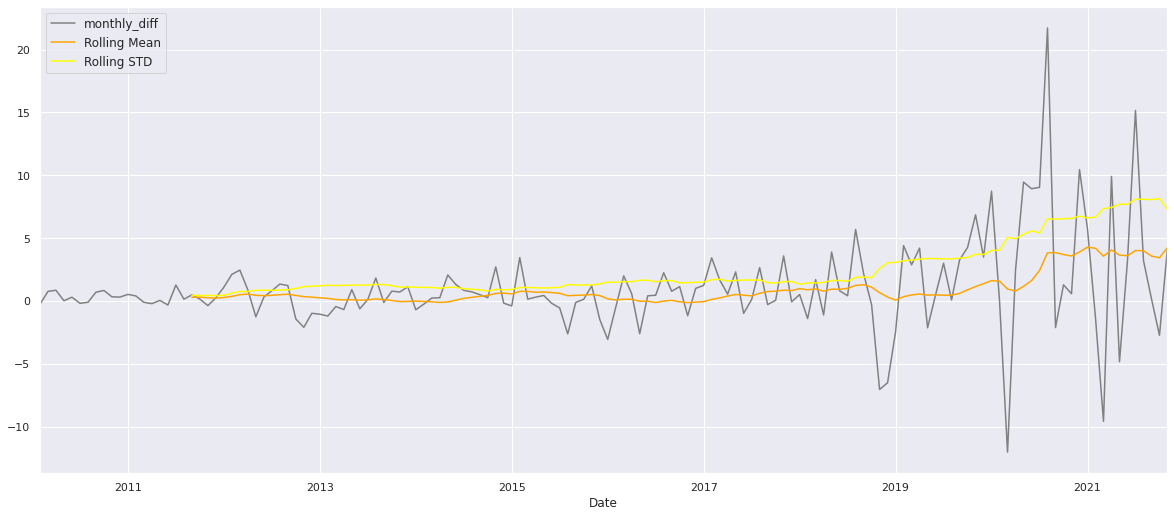

In [ ]:
monthly_data['monthly_diff'][1:].plot(c='grey')
monthly_data['monthly_diff'][1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')
monthly_data['monthly_diff'][1:].rolling(20).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})

This code generates a line plot to visualize the differenced series, rolling mean, and rolling standard deviation of the 'monthly_diff' values from the "monthly_data" DataFrame.

The first line of code plots the 'monthly_diff' values starting from the second index (excluding the first NaN value) using the ".plot()" function. The 'c' parameter is set to 'grey' to specify the color of the line.

The second line of code plots the rolling mean of the 'monthly_diff' values. The ".rolling(20).mean()" function computes the rolling mean with a window size of 20, which calculates the average of the previous 20 values. The resulting rolling mean values are plotted with the label 'Rolling Mean' and the color 'orange'.

The third line of code plots the rolling standard deviation of the 'monthly_diff' values. Similar to the previous line, the ".rolling(20).std()" function computes the rolling standard deviation with a window size of 20, which calculates the standard deviation of the previous 20 values. The resulting rolling standard deviation values are plotted with the label 'Rolling STD' and the color 'yellow'.

The fourth line of code adds a legend to the plot, specifying the label size as 12. The legend displays the labels 'Rolling Mean' and 'Rolling STD', allowing for easy identification of the plotted lines.

By executing this code, a line plot is generated that visualizes the 'monthly_diff' series, its rolling mean, and rolling standard deviation. This plot provides insights into the trend, variability, and changes in the differenced series over time. The rolling mean and rolling standard deviation help identify patterns or fluctuations in the differenced series that can be useful for further analysis or interpretation.

In [ ]:
##Checking if Time Series is Stationary by Running ADF Test
ad_fuller_func(monthly_data['monthly_diff'][1:])

ADF Statistic: -1.856669
p-value: 0.352712
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Failed to Reject Ho-Time Series is Non-Stationary


This code applies the Augmented Dickey-Fuller (ADF) test to the differenced time series stored in the 'monthly_diff' column of the "monthly_data" DataFrame, excluding the first NaN value.

The ADF test is a statistical test commonly used to determine whether a time series is stationary or non-stationary. Stationary series exhibit constant statistical properties over time, while non-stationary series display trends, seasonality, or other time-dependent patterns.

By calling the "ad_fuller_func" function and passing the 'monthly_diff' values (excluding the first NaN) as input, this code performs the ADF test on the differenced series. The ADF test computes the ADF statistic, p-value, and critical values, which are then printed as the output.

The ADF statistic measures the strength of the evidence against the null hypothesis of non-stationarity. The p-value represents the probability of observing the ADF statistic under the null hypothesis. The critical values help determine the rejection or acceptance of the null hypothesis.

The printed results provide insights into the stationarity of the differenced series. If the ADF statistic is lower than the critical value at a certain significance level (e.g., 5%), it indicates evidence to reject the null hypothesis of non-stationarity, suggesting that the differenced series is stationary. Conversely, if the ADF statistic is higher than the critical value, the null hypothesis is not rejected, implying that the differenced series is non-stationary.

By running this code and examining the ADF test results, users can assess the stationarity of the differenced time series and make informed decisions about subsequent analysis or modeling tasks.

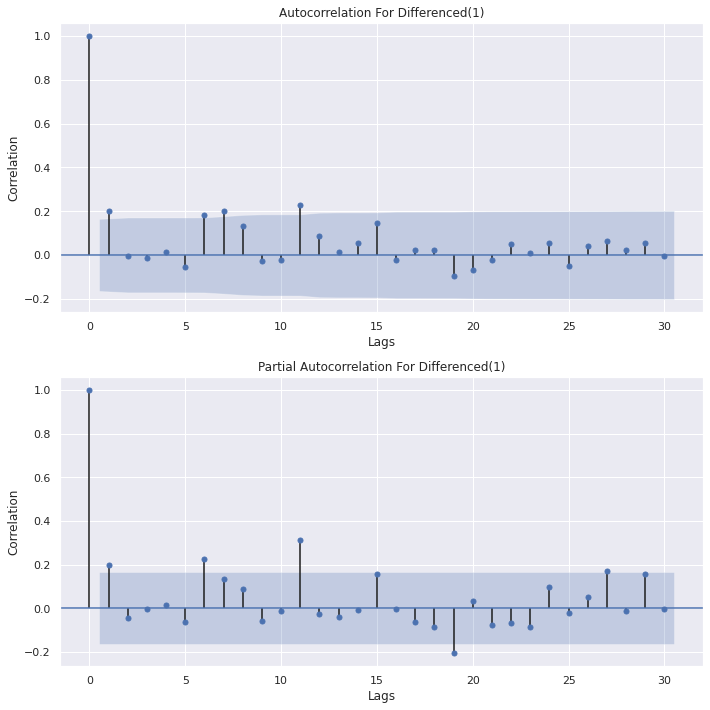

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
acf = plot_acf(monthly_data['monthly_diff'][1:],lags=30,ax=ax1)
pacf = plot_pacf(monthly_data['monthly_diff'][1:],lags=30,ax=ax2)
ax1.set_title('Autocorrelation For Differenced(1)')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_title('Partial Autocorrelation For Differenced(1)')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

This code generates two subplots within a single figure to visualize the autocorrelation and partial autocorrelation of the differenced series, specifically the 'monthly_diff' values from the "monthly_data" DataFrame, excluding the first NaN value.

The first line of code initializes the figure and axes objects, creating a figure with two subplots arranged vertically. The variable names "ax1" and "ax2" are assigned to the axes objects of the two subplots.

The next line of code uses the "plot_acf()" function to plot the autocorrelation function (ACF) of the differenced series. The "monthly_data['monthly_diff'][1:]" selects the differenced series values, excluding the first NaN value. The "lags=30" parameter specifies a maximum lag of 30 for the ACF plot. The resulting ACF values are plotted in the first subplot.

The subsequent line of code uses the "plot_pacf()" function to plot the partial autocorrelation function (PACF) of the differenced series. Similar to the ACF plot, the PACF plot is generated with a maximum lag of 30 in the second subplot.

The code then sets the titles of the subplots as "Autocorrelation For Differenced(1)" and "Partial Autocorrelation For Differenced(1)", respectively.

Furthermore, the y-axis labels of both subplots are set as "Correlation", and the x-axis labels are set as "Lags".

Lastly, the "plt.tight_layout(pad=1)" command adjusts the spacing between the subplots to avoid overlapping or crowding.

By executing this code, two subplots are displayed within a single figure. The first subplot shows the autocorrelation of the differenced series, while the second subplot displays the partial autocorrelation. These plots provide insights into the correlation between the differenced values and their lagged values at different time lags. The y-axis represents the correlation coefficients, and the x-axis denotes the time lags. The figure enables the visual examination of any significant autocorrelation or partial autocorrelation patterns in the differenced series.

In [ ]:
from statsmodels.tsa.stattools import kpss

This code imports the "kpss" function from the "statsmodels.tsa.stattools" module. 

The "kpss" function is part of the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test, which is used to test for stationarity in a time series. The KPSS test is an alternative to the Augmented Dickey-Fuller (ADF) test and provides insights into the trend stationarity of a series.

By importing the "kpss" function, the code allows for the application of the KPSS test to time series data. The KPSS test examines whether a given time series is stationary around a deterministic trend or if it exhibits unit root non-stationarity.

Once imported, the "kpss" function can be used to perform the KPSS test on a time series, calculate the test statistic, p-value, and critical values, and evaluate the stationarity of the series based on the test results.

This code snippet prepares the necessary functionality to apply the KPSS test to time series data, enabling the analysis and assessment of the stationarity properties of a given series.

In [ ]:
# KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(monthly_data['monthly_diff'][1:])

KPSS Statistic: 0.528477963970444
p-value: 0.035252710817467565
num lags: 14
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


This code defines a function called "kpss_test" that performs the KPSS (Kwiatkowski-Phillips-Schmidt-Shin) test on a given time series. The function takes a series as input and conducts the KPSS test to assess the stationarity of the series.

Within the function, the "kpss" function from the "statsmodels.tsa.stattools" module is invoked. This function calculates the KPSS statistic, p-value, number of lags, and critical values based on the input series.

The code then prints the computed statistics and critical values, providing information about the test results. The KPSS statistic measures the strength of evidence against the null hypothesis of stationarity. The p-value represents the probability of obtaining the observed KPSS statistic under the null hypothesis. The number of lags indicates the number of lagged differences included in the test. The critical values provide thresholds for interpreting the test statistic at different significance levels.

Finally, the code prints a summary message indicating whether the series is stationary or not based on the p-value. If the p-value is less than 0.05 (the chosen significance level), the series is deemed stationary. Otherwise, if the p-value is greater than or equal to 0.05, the series is considered non-stationary.

By calling the "kpss_test" function with the 'monthly_diff' values (excluding the first NaN) from the "monthly_data" DataFrame as input, this code applies the KPSS test to assess the stationarity of the differenced series. The function prints the test results and provides an indication of the stationarity properties of the series based on the p-value.

In [ ]:
# KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(monthly_data['monthly_diff'][1:])

KPSS Statistic: 0.528477963970444
p-value: 0.035252710817467565
num lags: 14
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


This code defines a function called "kpss_test" that performs the KPSS (Kwiatkowski-Phillips-Schmidt-Shin) test on a given time series. The purpose of the KPSS test is to evaluate the stationarity of a time series.

The code imports the "kpss" function from the "statsmodels.tsa.stattools" module, which provides the functionality to calculate the KPSS statistic, p-value, number of lags, and critical values.

The "kpss_test" function takes a series as input, along with any additional keyword arguments that can be passed to the underlying "kpss" function. It applies the KPSS test to the series by invoking the "kpss" function and storing the computed statistics and critical values.

The code then formats and prints the KPSS statistic, p-value, number of lags, and critical values, providing insights into the results of the test. The critical values represent thresholds at different significance levels for interpreting the test statistic.

Finally, the function prints a summary message indicating whether the series is stationary or not based on the p-value. If the p-value is less than 0.05 (the chosen significance level), the series is considered stationary. Otherwise, if the p-value is greater than or equal to 0.05, the series is considered non-stationary.

By calling the "kpss_test" function with the 'monthly_diff' values (excluding the first NaN) from the "monthly_data" DataFrame as input, this code applies the KPSS test to assess the stationarity of the differenced series. The function outputs the test results, including the KPSS statistic, p-value, number of lags, critical values, and a statement indicating the stationarity of the series.

In [ ]:
from scipy import stats
from scipy.special import inv_boxcox
from typing import Tuple
import lightgbm as lgb
from datetime import timedelta

This code performs various operations using different libraries and modules. Let's break it down:

The code begins by importing the "stats" module from the "scipy" library. This module provides various statistical functions and operations.

Next, the code imports the "inv_boxcox" function from the "special" module of the "scipy" library. This function is used for inverse Box-Cox transformation, which is a method used for transforming non-normal data into approximately normal distributions.

The code also imports the "Tuple" class from the "typing" module. This class is used to define a tuple type, which is a collection of elements of different types.

Furthermore, the code imports the "lightgbm" library, which is a gradient boosting framework used for machine learning tasks. It provides an efficient implementation of the gradient boosting algorithm.

Lastly, the code imports the "timedelta" class from the "datetime" module. This class is used to represent a duration or difference between two dates or times.

In summary, this code sets up the necessary modules and libraries for performing statistical computations, inverse Box-Cox transformation, machine learning with the lightgbm framework, and time duration calculations.

# Transform to make stationary 

In [ ]:
# Define power trnnsformations and their inverses
# Square root transformation
def square_root_transformation(x: pd.Series) -> pd.Series:
    return np.sqrt(x)

def square_root_inverse_transformation(x: pd.Series) -> pd.Series:
    return np.square(x)

# Cube root transformation
def cube_root_transformation(x: pd.Series) -> pd.Series:
    return x ** (1 / 3)

def cube_root_inverse_transformation(x: pd.Series) -> pd.Series:
    return x ** 3

# Log transformation
def log_transformation(x: pd.Series) -> pd.Series:
    # Function np.log1p = log(x + 1)
    return np.log1p(x)

def log_inverse_transformation(x: pd.Series) -> pd.Series:
    # Function np.expm1(x) = exp(x) - 1
    return np.expm1(x)

# Box-cox transformation
def box_cox_transformation(x: pd.Series) -> Tuple[np.array, float]:
    x_transformed, lambda_value = stats.boxcox(x)
    return x_transformed, lambda_value
    
def box_cox_inverse_transformation(x: pd.Series, lambda_value: float) -> pd.Series:
    return inv_boxcox(x, lambda_value)

This code defines a set of power transformations and their corresponding inverse transformations. These transformations are applied to a pandas Series object (denoted as `x`), which represents a column or a one-dimensional array of data.

The power transformations include the square root, cube root, log, and Box-Cox transformations. These transformations are commonly used in data analysis and statistical modeling to modify the distribution and scale of the data.

The square root transformation calculates the square root of each value in the Series using the `np.sqrt()` function. This transformation is useful for reducing the impact of large values and making the distribution closer to normal. The inverse transformation for square root takes the squared value of each element in the Series using the `np.square()` function, effectively reversing the square root transformation.

The cube root transformation raises each value in the Series to the power of 1/3 using the exponentiation operator `**`. This transformation helps in reducing the impact of both large and small values and can be effective for data with extreme values. The inverse transformation for the cube root raises each value in the Series to the power of 3 using the exponentiation operator `**`, effectively reversing the cube root transformation.

The log transformation applies the natural logarithm (base e) to each value in the Series using the `np.log1p()` function. This transformation is commonly used for data that has a skewed distribution and a wide range of values. The `np.log1p()` function is used instead of `np.log()` to avoid errors when the input values are close to zero. The inverse transformation for log applies the exponential function minus one (`np.expm1()`) to each value in the Series, effectively reversing the log transformation.

The Box-Cox transformation is a more flexible power transformation that tries to find the optimal lambda value that maximizes the normality of the data. It is applied to the Series using the `stats.boxcox()` function from the `scipy` library. The transformed data and the lambda value are returned as a tuple. The inverse transformation for Box-Cox is performed using the `inv_boxcox()` function from the `scipy.special` module. It takes the original Series and the lambda value as arguments to obtain the inverse transformed data.

Overall, this code provides a collection of power transformations and their inverses that can be used to manipulate and normalize data in various analytical and statistical tasks. These transformations allow data scientists and analysts to preprocess and transform data to meet the assumptions of statistical models or to improve the interpretability and performance of machine learning algorithms.

In [ ]:
monthly_data.reset_index(inplace=True)

This line of code modifies a pandas DataFrame called `monthly_data` by resetting its index. 

In pandas, the index of a DataFrame is a way to uniquely identify each row. By default, the index is a sequence of integers starting from 0. However, in some cases, the index may not be sequential or may not provide meaningful information.

The `reset_index()` function is used to reset the index of a DataFrame, which means replacing the existing index with a new sequential index. The `inplace=True` argument ensures that the modification is made directly to the `monthly_data` DataFrame without creating a new DataFrame.

By resetting the index, the rows of the DataFrame are assigned a new index starting from 0 and incrementing by 1 for each row. This can be useful when the original index does not provide meaningful information or when we want to reorganize the DataFrame for further analysis or processing.

After applying this line of code, the `monthly_data` DataFrame will have a new sequential index, allowing for easier referencing and manipulation of the data.

In [ ]:
monthly_data['square_root_transformation_demand'] = monthly_data['Adj Close'].apply(lambda x: square_root_transformation(x))

# Apply the inverse square root transformation
monthly_data['square_root_inv_transformation_demand'] = monthly_data['square_root_transformation_demand'].apply(lambda x: square_root_inverse_transformation(x))

# Cube Root
monthly_data['cube_root_transformation_demand'] = monthly_data['Adj Close'].apply(lambda x: cube_root_transformation(x))

# Apply the inverse square root transformation
monthly_data['cube_root_inv_transformation_demand'] = monthly_data['cube_root_transformation_demand'].apply(lambda x: cube_root_inverse_transformation(x))

# Log Root
monthly_data['log_transformation_demand'] = monthly_data['Adj Close'].apply(lambda x: log_transformation(x))

# Apply the inverse square root transformation
monthly_data['log_inv_transformation_demand'] = monthly_data['log_transformation_demand'].apply(lambda x: log_inverse_transformation(x))


This code applies different transformations to a specific column, 'Adj Close', in a pandas DataFrame called 'monthly_data', and stores the transformed values in new columns.

The first transformation applied is the square root transformation. It takes each value in the 'Adj Close' column and applies the 'square_root_transformation' function to it. The resulting transformed values are then stored in a new column called 'square_root_transformation_demand'.

Next, the code applies the inverse square root transformation to the values in the 'square_root_transformation_demand' column. This is done by applying the 'square_root_inverse_transformation' function to each value in the column. The resulting inverse transformed values are stored in a new column called 'square_root_inv_transformation_demand'.

Similarly, the code applies the cube root transformation to the 'Adj Close' column and stores the transformed values in the 'cube_root_transformation_demand' column. Then, it applies the inverse cube root transformation to the values in the 'cube_root_transformation_demand' column, storing the results in the 'cube_root_inv_transformation_demand' column.

The code also applies the log transformation to the 'Adj Close' column, storing the transformed values in the 'log_transformation_demand' column. Finally, it applies the inverse log transformation to the values in the 'log_transformation_demand' column and stores the results in the 'log_inv_transformation_demand' column.

Overall, this code computes and adds new columns to the 'monthly_data' DataFrame, containing the transformed values obtained from applying various power transformations and their corresponding inverse transformations to the 'Adj Close' column. These transformations can help manipulate and normalize the data, making it more suitable for analysis and modeling purposes.

In [ ]:
monthly_data

Date  ...  log_inv_transformation_demand
0   2010-01-31  ...                       6.369562
1   2010-02-28  ...                       6.096047
2   2010-03-31  ...                       6.850866
3   2010-04-30  ...                       7.701438
4   2010-05-31  ...                       7.711035
..         ...  ...                            ...
138 2021-07-31  ...                     144.922394
139 2021-08-31  ...                     148.137819
140 2021-09-30  ...                     148.306190
141 2021-10-31  ...                     145.563809
142 2021-11-30  ...                     149.770004

[143 rows x 13 columns]

The code refers to a pandas DataFrame named "monthly_data." This DataFrame likely contains monthly data for some analysis or processing.

A DataFrame is a tabular data structure with rows and columns, similar to a spreadsheet. The "monthly_data" DataFrame could potentially have different columns representing various attributes or variables of interest.

The code does not provide details about the specific content or structure of the DataFrame, but it is assumed to contain data related to monthly observations.

The DataFrame could include columns such as "Date," "Open," "Close," "High," "Low," and potentially other relevant columns depending on the data being analyzed. Each row in the DataFrame represents a specific month, and the columns hold the corresponding data for that month.

It is important to note that without further information about the DataFrame's content or context, it is challenging to provide a more specific explanation. However, the "monthly_data" DataFrame serves as a container for the monthly data, allowing for manipulation, analysis, and visualization using pandas and other Python libraries.

In [ ]:
FIGURE_SIZE = (20, 10)
plt.rcParams['axes.grid'] = True

%matplotlib inline

This code adjusts the figure size and enables gridlines in a matplotlib plot.

The line `FIGURE_SIZE = (20, 10)` sets the figure size for the plot to be 20 units wide and 10 units tall. This ensures that the plot will have specific dimensions when displayed.

The line `plt.rcParams['axes.grid'] = True` enables the gridlines on the plot. By setting this parameter to `True`, the gridlines will be displayed in the background of the plot, helping with the visualization and interpretation of the data.

The line `%matplotlib inline` is a magic command specific to Jupyter Notebook or JupyterLab environments. It allows the plots to be displayed directly within the notebook interface, ensuring that the plots are shown inline with the code.

Overall, this code provides configuration settings to customize the appearance of plots generated using matplotlib. It ensures a specific figure size, enables gridlines, and allows the plots to be displayed directly within a Jupyter Notebook or JupyterLab environment.

In [ ]:
def plot_transformations(df: pd.DataFrame, transformation: str) -> None:
    # Get axes for multiple plots
    fig, axes = plt.subplots(nrows=1, ncols=3)
    
    # Original data
    monthly_data.set_index('Date')['Adj Close'].plot(figsize=FIGURE_SIZE, ax=axes[0], color='blue')
    
    # Transformed data
    transformed_column_name = f'{transformation}_transformation_demand'
    monthly_data.set_index('Date')[transformed_column_name].plot(figsize=FIGURE_SIZE, ax=axes[1], color='red')
    
    # Inverse Transformed data
    inverse_transformed_data = f'{transformation}_inv_transformation_demand'
    monthly_data.set_index('Date')[inverse_transformed_data].plot(figsize=FIGURE_SIZE, ax=axes[2], color='orange')

This code defines a function called `plot_transformations` that is used to plot different transformations of a specific column in a pandas DataFrame.

The function takes two parameters: `df`, which represents the DataFrame containing the data to be plotted, and `transformation`, which specifies the type of transformation to be visualized.

Within the function, the code creates a figure with three subplots using the `subplots()` function from matplotlib. This allows for multiple plots to be displayed side by side.

The first subplot displays the original data from the DataFrame. It retrieves the 'Adj Close' column from the DataFrame, sets the 'Date' column as the index, and plots the values using the `plot()` function. This subplot is displayed with a blue color.

The second subplot shows the transformed data. It constructs the name of the transformed column based on the provided `transformation` parameter and retrieves the corresponding column from the DataFrame. It then plots the transformed values using the `plot()` function. This subplot is displayed with a red color.

The third subplot represents the inverse transformed data. It constructs the name of the inverse transformed column based on the `transformation` parameter and retrieves the corresponding column from the DataFrame. It plots the inverse transformed values using the `plot()` function. This subplot is displayed with an orange color.

In summary, the `plot_transformations` function generates a figure with three subplots, where each subplot displays a different aspect of the data: the original data, the transformed data based on the specified transformation, and the inverse transformed data. This allows for visual comparison and analysis of the effects of the chosen transformation on the data.

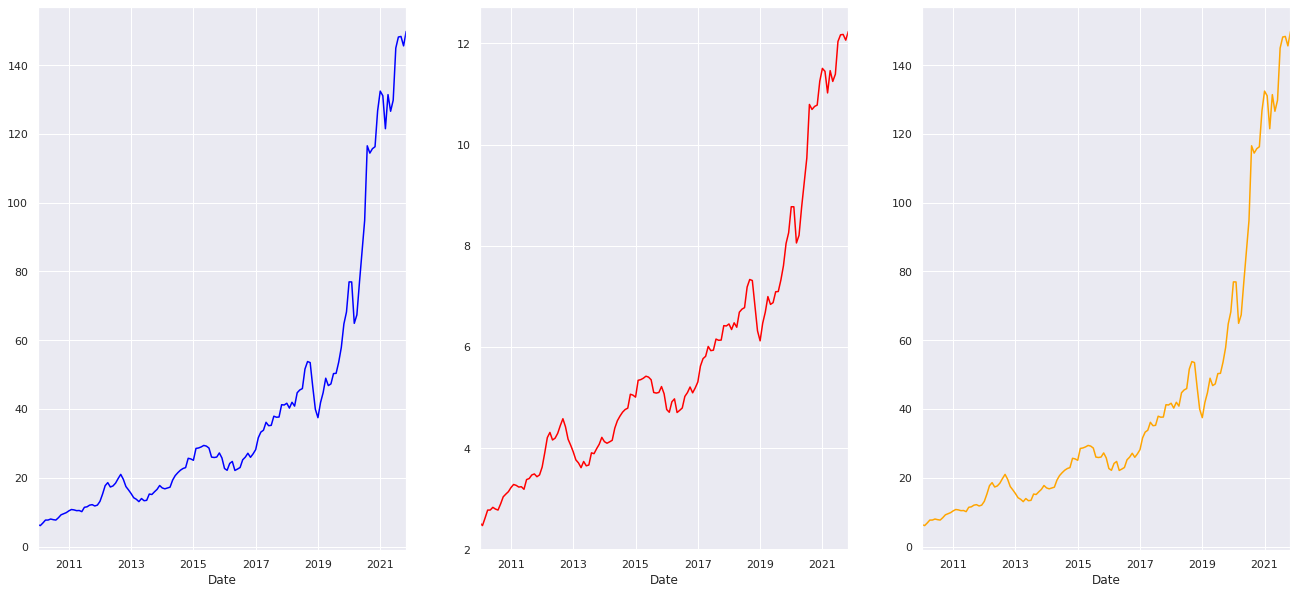

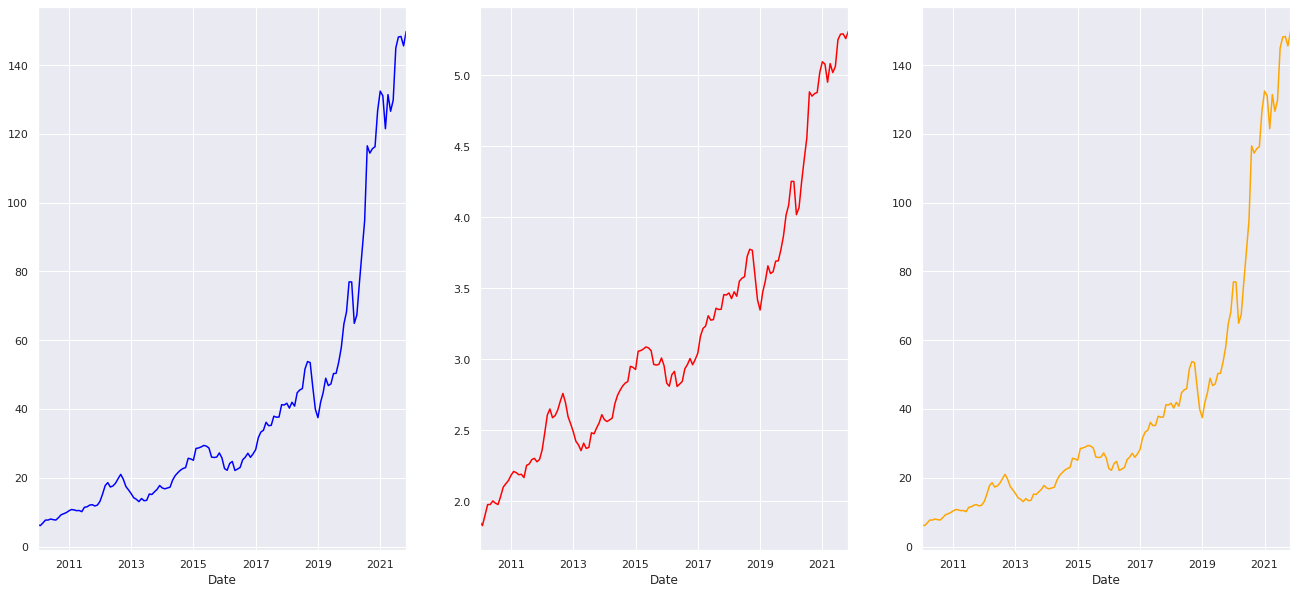

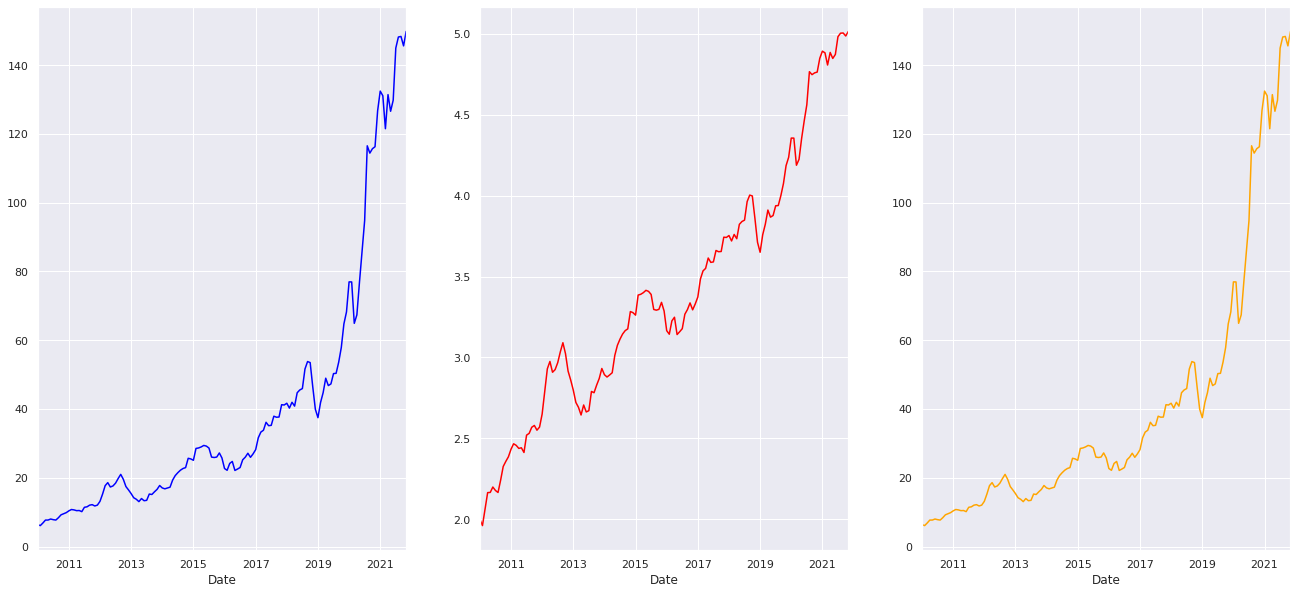

In [ ]:
plot_transformations(monthly_data,'square_root') #  square_root log
plot_transformations(monthly_data, 'cube_root')
plot_transformations(monthly_data, 'log')



This code calls the `plot_transformations` function three times, each with a different transformation specified: square root, cube root, and logarithm.

The `plot_transformations` function takes a pandas DataFrame, `monthly_data`, and a transformation type as parameters. It generates a plot that visualizes the effects of the specified transformation on the data.

The first line, `plot_transformations(monthly_data, 'square_root')`, calls the function to plot the effects of the square root transformation. This will generate a figure with three subplots: the original data, the square root-transformed data, and the inverse square root-transformed data.

The second line, `plot_transformations(monthly_data, 'cube_root')`, calls the function to plot the effects of the cube root transformation. Similarly, this will generate a figure with three subplots, showing the original data, the cube root-transformed data, and the inverse cube root-transformed data.

The third line, `plot_transformations(monthly_data, 'log')`, calls the function to plot the effects of the logarithm transformation. This will produce a figure with three subplots: the original data, the logarithm-transformed data, and the inverse logarithm-transformed data.

Overall, this code repeatedly applies the `plot_transformations` function to visualize different transformations on the `monthly_data` DataFrame. Each call generates a figure with subplots that display the original data, the transformed data, and the inverse transformed data for the specified transformation type. This helps in understanding how each transformation affects the distribution and characteristics of the data.

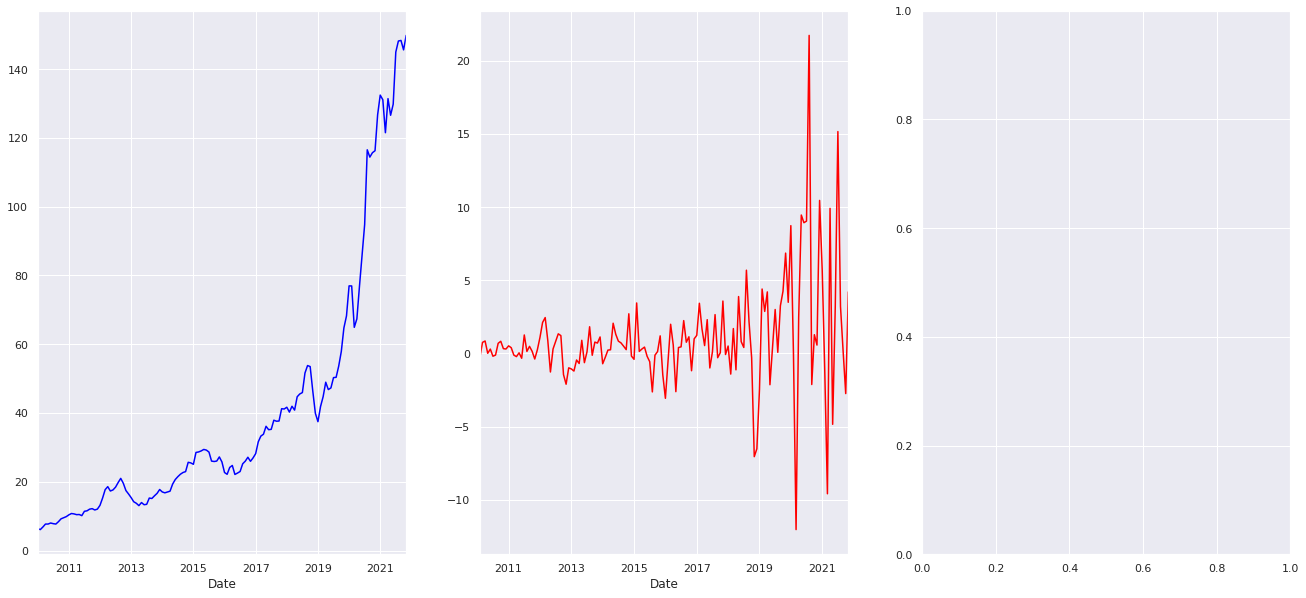

In [ ]:
# Get axes for multiple plots
fig, axes = plt.subplots(nrows=1, ncols=3)
    
    # Original data
monthly_data.set_index('Date')['Adj Close'].plot(figsize=FIGURE_SIZE, ax=axes[0], color='blue')
    
    # Transformed data
transformed_column_name = 'monthly_diff'
monthly_data.set_index('Date')[transformed_column_name][1:].plot(figsize=FIGURE_SIZE, ax=axes[1], color='red')
    
#     # Inverse Transformed data
# inverse_transformed_data = f'{transformation}_inv_transformation_demand'
#  monthly_data.set_index('Date')[inverse_transformed_data].plot(figsize=FIGURE_SIZE, ax=axes[2], color='orange')

This code generates a figure with three subplots and plots specific data on each subplot.

The first line, `fig, axes = plt.subplots(nrows=1, ncols=3)`, creates a figure with three subplots arranged in a single row. The `fig` variable represents the entire figure, while the `axes` variable is a list of three axes objects, one for each subplot.

The second line plots the original data from the 'Adj Close' column of the `monthly_data` DataFrame. It sets the 'Date' column as the index of the DataFrame and plots the values on the first subplot. The plot is displayed with a blue color.

The third line plots transformed data from the 'monthly_diff' column of the `monthly_data` DataFrame. It also sets the 'Date' column as the index but excludes the first value from the plot using `[1:]`. The transformed data is plotted on the second subplot with a red color.

The commented out lines indicate that there was a code snippet for plotting inverse transformed data, but it has been commented out (disabled) in the code.

Overall, this code creates a figure with three subplots and plots specific data on each subplot. The first subplot displays the original data, while the second subplot shows transformed data. The commented out code suggests that there was intended functionality to plot inverse transformed data, but it is currently not executed.

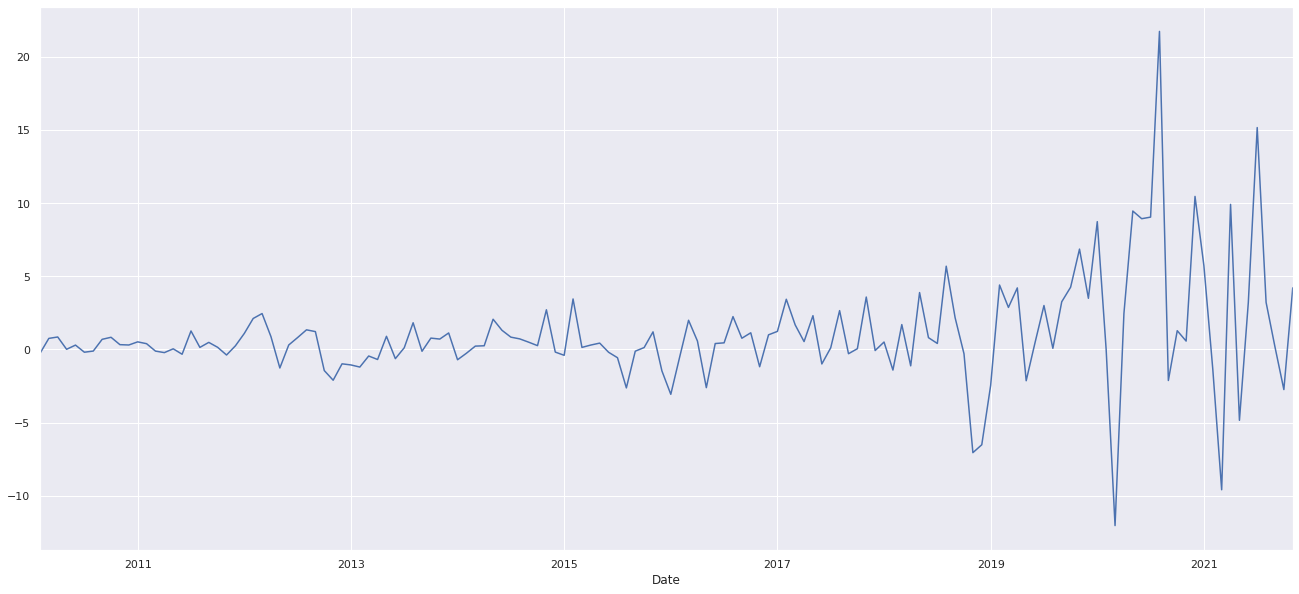

In [ ]:
monthly_data.set_index('Date')['monthly_diff'][1:].plot(figsize=FIGURE_SIZE)

This code performs a plot of a specific column, 'monthly_diff', from a pandas DataFrame called 'monthly_data' against the index column, 'Date'. 

The code begins by setting the 'Date' column as the index of the DataFrame using the `set_index()` function. This allows for easier manipulation and plotting of the data based on the dates.

Next, it selects the 'monthly_diff' column from the DataFrame using indexing notation, which retrieves a specific column based on its name.

Then, it applies additional indexing notation, `[1:]`, to exclude the first value from the selected column. This is likely done to exclude any initial value that may not be meaningful or relevant in the plot.

Finally, it plots the selected column against the index column, using the `plot()` function from pandas. The resulting plot is displayed with a figure size defined by the `FIGURE_SIZE` variable.

In summary, this code sets the index of the DataFrame to the 'Date' column, selects the 'monthly_diff' column, excludes the first value, and plots the selected column against the index column. The plot provides a visual representation of the relationship or trend between the 'monthly_diff' values and the dates.

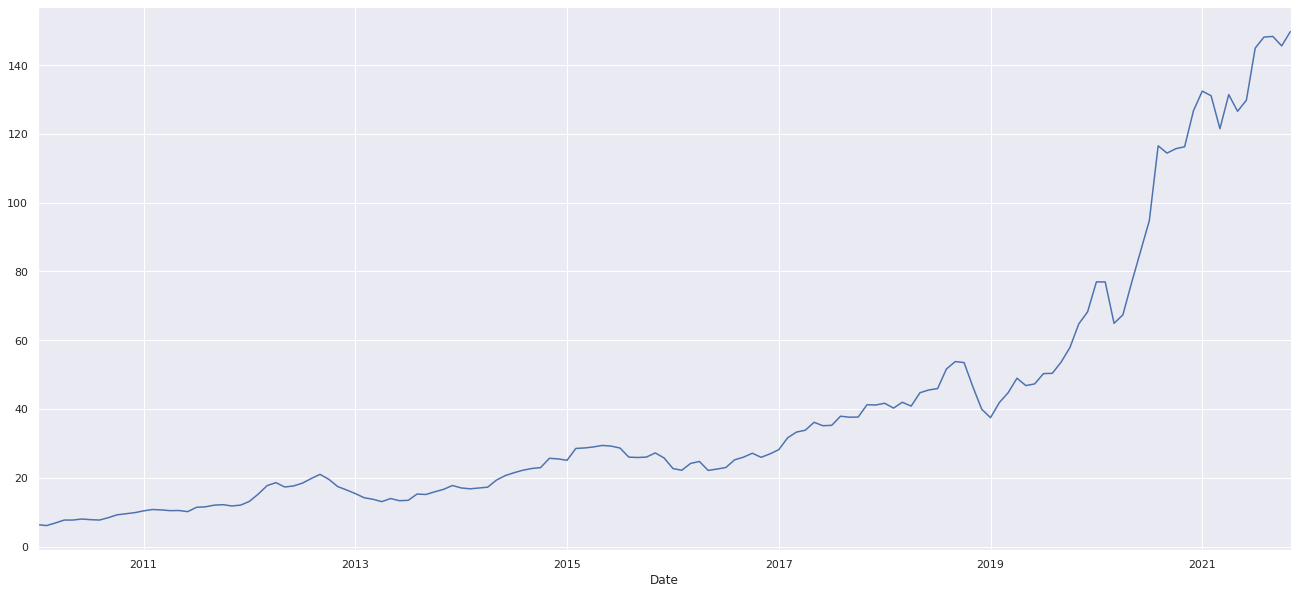

In [ ]:
monthly_data.set_index('Date')['Adj Close'].plot(figsize=FIGURE_SIZE)

This code generates a plot of the 'Adj Close' column from a pandas DataFrame called 'monthly_data' against the index column, 'Date'.

The `set_index()` function is used to set the 'Date' column as the index of the DataFrame. This allows for easier manipulation and plotting of the data based on the dates.

After setting the index, the code selects the 'Adj Close' column from the DataFrame using indexing notation. This retrieves the specific column containing the adjusted closing prices of a financial asset, such as a stock or index.

The `plot()` function is then applied to the selected 'Adj Close' column, which generates a line plot of the values against the index column. The resulting plot visualizes the historical trend or movement of the adjusted closing prices over time.

The `figsize` parameter is set to `FIGURE_SIZE`, which likely specifies the dimensions of the figure in which the plot will be displayed. This allows for customization of the figure size based on specific requirements or preferences.

Overall, this code sets the 'Date' column as the index, selects the 'Adj Close' column, and plots the values against the index column. The resulting plot provides a visual representation of the historical adjusted closing prices, allowing for analysis and interpretation of the price movements over time.

In [ ]:
monthly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Date                                   143 non-null    datetime64[ns]
 1   Adj Close                              143 non-null    float64       
 2   Year                                   143 non-null    int64         
 3   Month                                  143 non-null    object        
 4   dayofweek                              143 non-null    object        
 5   quarter                                143 non-null    int64         
 6   monthly_diff                           142 non-null    float64       
 7   square_root_transformation_demand      143 non-null    float64       
 8   square_root_inv_transformation_demand  143 non-null    float64       
 9   cube_root_transformation_demand        143 non-null    float64   

This code provides a summary of the structure and content of a pandas DataFrame called `monthly_data`. By calling the `info()` method on the DataFrame, it retrieves important information about the DataFrame's characteristics.

The output of `monthly_data.info()` typically includes details such as the number of rows and columns in the DataFrame, the names and data types of each column, the count of non-null values in each column, and the memory usage of the DataFrame.

By examining the information provided by `monthly_data.info()`, analysts gain insights into the size of the DataFrame and the data types of its columns. This information helps identify potential missing values or inconsistencies in the data, as the count of non-null values for each column indicates the presence or absence of missing data. Additionally, the memory usage details inform users about the memory footprint of the DataFrame, which can be important when working with large datasets.

Overall, executing `monthly_data.info()` is a quick and useful way to obtain an overview of the DataFrame's structure and to identify initial characteristics of the data. This information forms the basis for further data analysis, cleaning, or preprocessing tasks.

In [ ]:
# KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(monthly_data['monthly_diff'][1:])

KPSS Statistic: 0.528477963970444
p-value: 0.035252710817467565
num lags: 14
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


This code performs the KPSS (Kwiatkowski-Phillips-Schmidt-Shin) test on a given series of data to determine its stationarity.

The code begins by importing the necessary function for the KPSS test from the `statsmodels.tsa.stattools` module.

Next, a function named `kpss_test` is defined. This function takes a series of data as input and performs the KPSS test on it. The `**kw` notation allows for additional optional arguments to be passed to the KPSS test function.

Within the `kpss_test` function, the KPSS test is applied to the input series using the `kpss()` function. The test returns several statistical results, including the test statistic, p-value, the number of lags used in the test, and critical values.

The code then proceeds to format and print the output of the KPSS test. It displays the KPSS statistic, the p-value, the number of lags used, and the critical values associated with different significance levels. Additionally, it provides a final interpretation of the test result, stating whether the series is stationary or not based on the p-value threshold of 0.05.

Finally, the `kpss_test` function is called with the series `monthly_data['monthly_diff'][1:]` as the input, excluding the first element. This applies the KPSS test specifically to the 'monthly_diff' column of the `monthly_data` DataFrame.

In summary, this code performs the KPSS test on a series of data, reports the test results, and provides an interpretation regarding the stationarity of the series. The KPSS test is commonly used in time series analysis to assess whether a series is stationary or exhibits a trend or unit root.

In [ ]:
kpss_test(monthly_data['log_transformation_demand'])
print(" ***  ")
print(" ***  ")
kpss_test(monthly_data['cube_root_transformation_demand'])
print(" ***  ")
print(" ***  ")
kpss_test(monthly_data['square_root_transformation_demand'])


KPSS Statistic: 1.0234809821378617
p-value: 0.01
num lags: 14
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary
 ***  
 ***  
KPSS Statistic: 0.9793176648560024
p-value: 0.01
num lags: 14
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary
 ***  
 ***  
KPSS Statistic: 0.9463550967388723
p-value: 0.01
num lags: 14
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


This code performs the KPSS (Kwiatkowski-Phillips-Schmidt-Shin) test on three different series of data: 'log_transformation_demand', 'cube_root_transformation_demand', and 'square_root_transformation_demand' from a DataFrame called 'monthly_data'.

The code calls the `kpss_test` function multiple times, passing each series as an argument.

After each test is performed, the code prints a series of asterisks ('***') to provide a visual separation between the test results.

The purpose of this code is to assess the stationarity of the three different transformed series. The KPSS test is commonly used in time series analysis to determine whether a series is stationary or has a trend or unit root. By applying the test to each transformed series and examining the test results, it helps evaluate the stationarity characteristics of the data.

The printed asterisks serve as visual markers to differentiate the test results and make it easier to distinguish between the outputs of each KPSS test.

Overall, this code performs the KPSS test on multiple transformed series from the 'monthly_data' DataFrame and presents the test results, allowing for an analysis of the stationarity properties of the data.

In [ ]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries[1:], autolag='AIC') #BIC
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

This code defines a function called `stationarity` that examines the stationarity of a given time series.

Inside the `stationarity` function, the code calculates the rolling mean and rolling standard deviation of the input `timeseries`. The rolling mean is calculated by taking the average of the values within a window of size 12, and the rolling standard deviation is computed in a similar manner. These measures help to identify trends and variations in the time series.

After calculating the rolling mean and standard deviation, the code creates a plot to visualize the actual time series, the rolling mean, and the rolling standard deviation. The actual time series is shown in red, the rolling mean is displayed in green, and the rolling standard deviation is depicted in black. A legend is included to label each line, and the resulting plot is presented to provide a visual representation of the data.

Next, the code conducts the Dickey-Fuller test, which is a statistical test used to assess the stationarity of a time series. The `adfuller` function is utilized to perform this test, and it returns various statistical outputs including the test statistic, p-value, number of lags used, and other relevant information.

The code captures the test results in a pandas Series called `dfoutput`. This Series holds the test statistic, p-value, lags used, and number of observations. Additionally, the critical values for different significance levels are extracted from the test results and appended to the `dfoutput` Series.

Finally, the `dfoutput` Series is printed, presenting a summary of the Dickey-Fuller test results. This summary includes information such as the test statistic, p-value, lags used, number of observations, and critical values. By analyzing these results, it is possible to make conclusions about the stationarity of the time series.

In summary, the `stationarity` function calculates and plots the rolling mean and standard deviation of a time series, and performs the Dickey-Fuller test to evaluate the stationarity characteristics. This function is a helpful tool for examining trends and determining the stationarity of a given time series.

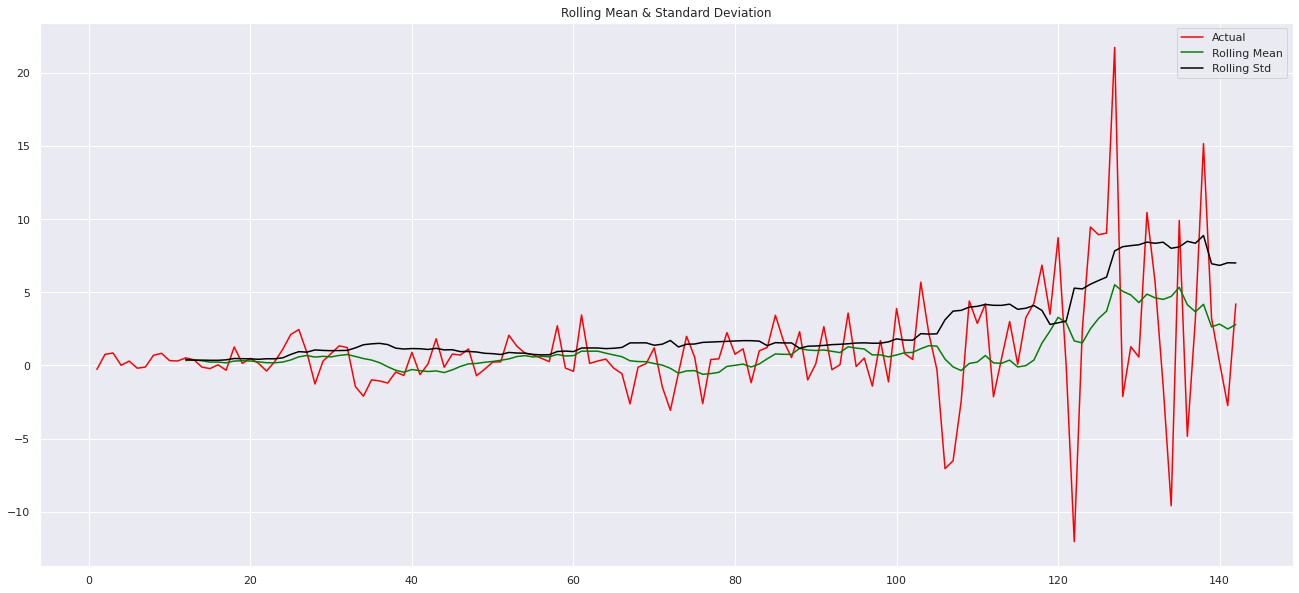

Dickey-Fuller Test: 
Test Statistic           -1.851527
p-value                   0.355196
Lags Used                11.000000
No. of Obs              129.000000
Critical Value (1%)      -3.482088
Critical Value (5%)      -2.884219
Critical Value (10%)     -2.578864
dtype: float64


In [ ]:
stationarity(monthly_data['monthly_diff'][1:])

This code applies the `stationarity` function to a specific column, 'monthly_diff', of a pandas DataFrame called 'monthly_data'.

The `stationarity` function performs several operations to assess the stationarity of a given time series. In this case, it focuses on the 'monthly_diff' column from the 'monthly_data' DataFrame, excluding the first element.

First, the code calculates the rolling mean and rolling standard deviation of the 'monthly_diff' column using a window size of 12. This helps identify any trends or variations in the data.

Next, it creates a plot to visualize the actual 'monthly_diff' time series, the rolling mean, and the rolling standard deviation. Each line in the plot represents a different aspect of the data, with the actual values shown in red, the rolling mean in green, and the rolling standard deviation in black.

After plotting, the code performs the Dickey-Fuller test, which is a statistical test used to evaluate the stationarity of a time series. The test is conducted using the 'monthly_diff' column as input. The Dickey-Fuller test calculates a test statistic, p-value, number of lags used, and other relevant information.

The test results, along with the critical values at different significance levels, are printed as a summary. This summary provides information such as the test statistic, p-value, lags used, number of observations, and critical values. These results are helpful in determining whether the 'monthly_diff' time series is stationary or exhibits trend-like behavior.

By applying the `stationarity` function to the 'monthly_diff' column of the 'monthly_data' DataFrame, this code assesses the stationarity characteristics and trends in the data. It provides a visual representation of the data through plots and offers statistical insights through the Dickey-Fuller test results, aiding in the analysis of time series properties.

In [ ]:
monthly_data['differenced_trasnformation_demand'] = monthly_data['Adj Close'].diff().values
monthly_data.head()

Date  ...  differenced_trasnformation_demand
0 2010-01-31  ...                                NaN
1 2010-02-28  ...                          -0.273515
2 2010-03-31  ...                           0.754818
3 2010-04-30  ...                           0.850573
4 2010-05-31  ...                           0.009596

[5 rows x 14 columns]

This code modifies a pandas DataFrame called 'monthly_data' by creating a new column named 'differenced_trasnformation_demand'. 

The new column is populated with the differences between consecutive values of the 'Adj Close' column. This is achieved by applying the `diff()` method to the 'Adj Close' column, which calculates the difference between each value and the previous value in the column. The resulting differences are then assigned to the 'differenced_trasnformation_demand' column.

After adding the new column, the code displays the first few rows of the modified 'monthly_data' DataFrame using the `head()` method. This allows for a quick check of the DataFrame to verify the changes and observe the updated structure and content.

In summary, this code performs differencing on the 'Adj Close' column of the 'monthly_data' DataFrame to calculate the changes between consecutive values. It creates a new column, 'differenced_trasnformation_demand', to store these differences. Finally, it displays the updated DataFrame to show the initial rows with the new column.

In [ ]:
monthly_data['differenced_demand_filled'] = np.where(pd.isnull(monthly_data['differenced_trasnformation_demand']), monthly_data['Adj Close'], monthly_data['differenced_trasnformation_demand'])
monthly_data.head()

Date  ...  differenced_demand_filled
0 2010-01-31  ...                   6.369562
1 2010-02-28  ...                  -0.273515
2 2010-03-31  ...                   0.754818
3 2010-04-30  ...                   0.850573
4 2010-05-31  ...                   0.009596

[5 rows x 15 columns]

This code modifies a pandas DataFrame called 'monthly_data' by creating a new column named 'differenced_demand_filled'.

The new column is populated based on a condition using the `np.where()` function. It checks if the values in the 'differenced_trasnformation_demand' column are null (missing values) using the `pd.isnull()` function. If a value is null, it is replaced with the corresponding value from the 'Adj Close' column. Otherwise, if the value is not null, it remains unchanged.

By using `np.where()` and the condition, the code effectively fills any missing values in the 'differenced_demand_filled' column with the corresponding values from the 'Adj Close' column, ensuring that there are no null values in the new column.

After adding the new column and filling the missing values, the code displays the first few rows of the modified 'monthly_data' DataFrame using the `head()` method. This allows for a quick check of the DataFrame to verify the changes and observe the updated structure and content.

In summary, this code creates a new column, 'differenced_demand_filled', in the 'monthly_data' DataFrame. It fills any missing values in this column by replacing them with the corresponding values from the 'Adj Close' column. The resulting DataFrame is then displayed to show the initial rows with the updated column.

In [ ]:
monthly_data['differenced_inv_transformation_demand'] = monthly_data['differenced_demand_filled'].cumsum()
np.testing.assert_array_equal(monthly_data['Adj Close'].values, monthly_data['differenced_inv_transformation_demand'].values)

This code performs two operations on a pandas DataFrame called 'monthly_data'.

First, it creates a new column named 'differenced_inv_transformation_demand' in the 'monthly_data' DataFrame. This column is populated by taking the cumulative sum of the values in the 'differenced_demand_filled' column. The cumulative sum calculates the running total, where each value in the new column is the sum of all the preceding values in the 'differenced_demand_filled' column.

After adding the new column, the code uses the `np.testing.assert_array_equal()` function to compare the values of two columns: 'Adj Close' and 'differenced_inv_transformation_demand'. This assertion ensures that the values in these two columns are equal. If the values are indeed equal, the code proceeds without any issues. However, if the values are not equal, an error is raised, indicating a discrepancy between the two columns.

This assertion serves as a validation check to confirm that the inverse transformation applied to the differenced data ('differenced_inv_transformation_demand') has accurately reconstructed the original data ('Adj Close'). By comparing the values, the code ensures that the inverse transformation has been performed correctly and that the reconstructed data matches the original data.

In summary, this code adds a new column to the 'monthly_data' DataFrame that contains the cumulative sum of the differenced and filled data. It then compares the values of this new column with the original 'Adj Close' column to verify that the inverse transformation accurately reconstructs the original data. This check ensures the integrity and accuracy of the inverse transformation process.

In [ ]:
monthly_data.head()

Date  ...  differenced_inv_transformation_demand
0 2010-01-31  ...                               6.369562
1 2010-02-28  ...                               6.096047
2 2010-03-31  ...                               6.850866
3 2010-04-30  ...                               7.701438
4 2010-05-31  ...                               7.711035

[5 rows x 16 columns]

This code retrieves and displays the first few rows of a pandas DataFrame called 'monthly_data'.

By calling the `head()` method on the DataFrame, it retrieves the top portion of the DataFrame, which by default consists of the first five rows. This allows for a quick preview of the data and provides an overview of the structure and content of the DataFrame.

The purpose of this code is to provide a glimpse of the DataFrame and allow users to examine the initial rows, typically to verify the data, check column names, and get a sense of the data types and values present in the DataFrame.

The output of this code displays the retrieved rows, showing a snapshot of the data contained in the 'monthly_data' DataFrame.

In summary, the `head()` function retrieves and displays the first few rows of the DataFrame, allowing for a brief inspection of the initial data records. This aids in understanding the structure and content of the DataFrame and serves as an initial step in data exploration and analysis.

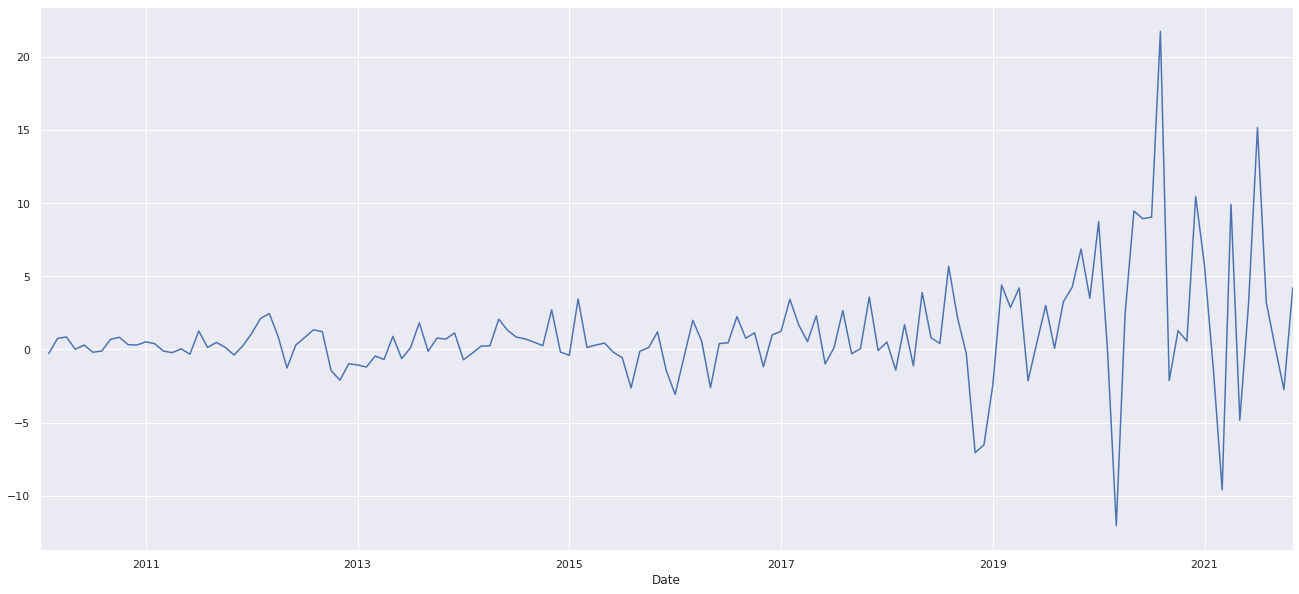

In [ ]:
monthly_data.set_index('Date')['differenced_trasnformation_demand'].plot(figsize=FIGURE_SIZE)

This code generates a plot of a specific column, 'differenced_trasnformation_demand', from a pandas DataFrame called 'monthly_data' against the index column, 'Date'.

The `set_index()` function is called on the 'monthly_data' DataFrame to set the 'Date' column as the index. This allows for easier manipulation and plotting of the data based on the dates.

After setting the index, the code selects the 'differenced_trasnformation_demand' column from the DataFrame using indexing notation. This retrieves the specific column that represents the differenced and transformed data.

The `plot()` function is then applied to the selected column against the index column, resulting in a line plot. The plot is displayed with a figure size defined by the `FIGURE_SIZE` variable.

By generating this plot, the code visualizes the values in the 'differenced_trasnformation_demand' column over time, showcasing any patterns, trends, or fluctuations present in the differenced data.

In summary, this code sets the index of the DataFrame to the 'Date' column, selects the 'differenced_trasnformation_demand' column, and plots the values against the index. The resulting plot provides a visual representation of the differenced and transformed data, facilitating the analysis and interpretation of any underlying patterns or dynamics.

In [ ]:
def build_temporal_features(data: pd.DataFrame) -> pd.DataFrame:
    # Temporal features
    #monthly_data['date'] = pd.to_datetime(data['date'])
    #data['year'] = data['date'].dt.year
    #data['month'] = data['date'].dt.month
    monthly_data['week'] = monthly_data['Date'].dt.week
    monthly_data['day'] = monthly_data['Date'].dt.day
    monthly_data['dayofweek'] = monthly_data['Date'].dt.dayofweek
    #data['quarter'] = data['date'].dt.quarter
    #data['week_of_month'] = data['day'].apply(lambda x: np.ceil(x / 7)).astype(np.int8)
    monthly_data['is_weekend'] = (monthly_data['dayofweek'] > 5).astype(np.int8)
    
    return monthly_data

This code defines a function called `build_temporal_features` that enhances a given pandas DataFrame by incorporating additional temporal features.

The function includes commented lines of code that are currently not executed. These lines involve converting a 'date' column to a datetime format and extracting features such as year, month, quarter, and week-of-month from the date. However, these lines are currently inactive and do not contribute to the function's functionality.

The executed lines within the function perform the following steps:
- The 'week' feature is created by extracting the week number from the 'Date' column. Each date in the DataFrame is assigned a corresponding week number using the `dt.week` attribute.
- The 'day' feature is created by extracting the day of the month from the 'Date' column. Each date is assigned a specific day number.
- The 'dayofweek' feature is created by extracting the day of the week from the 'Date' column. The `dt.dayofweek` attribute assigns a numerical value to each date representing the day of the week, with Monday as 0 and Sunday as 6.
- The 'is_weekend' feature is created by evaluating whether the 'dayofweek' value is greater than 5, indicating a weekend. A value of 1 is assigned if the condition is true, indicating a weekend day, while a value of 0 is assigned if the condition is false, indicating a weekday.

The function then returns the modified DataFrame, which now includes the added temporal features.

In summary, this code defines a function that enriches a DataFrame with temporal features. It incorporates the week number, day of the month, day of the week, and a binary indicator for weekends. These additional features enhance the DataFrame by providing insights into the temporal aspects of the data. These features can be useful for time-dependent analysis and modeling, enabling deeper understanding and exploration of patterns related to specific dates and times.

In [ ]:
df1 = build_temporal_features(monthly_data)
df1.head()

Date  Adj Close  Year  ... week  day  is_weekend
0 2010-01-31   6.369562  2010  ...    4   31           1
1 2010-02-28   6.096047  2010  ...    8   28           1
2 2010-03-31   6.850866  2010  ...   13   31           0
3 2010-04-30   7.701438  2010  ...   17   30           0
4 2010-05-31   7.711035  2010  ...   22   31           0

[5 rows x 19 columns]

This code applies the `build_temporal_features` function to a pandas DataFrame called `monthly_data` and assigns the returned DataFrame to a new variable `df1`.

The `build_temporal_features` function enhances the input DataFrame by adding additional temporal features to it. These features may include week number, day of the month, day of the week, and a binary indicator for weekends.

By calling `build_temporal_features(monthly_data)`, the function processes the `monthly_data` DataFrame, calculating and appending the specified temporal features. The modified DataFrame with the added features is then assigned to the variable `df1`.

After applying the function and obtaining `df1`, the code proceeds to display the first few rows of the modified DataFrame using the `head()` method. This provides a preview of the updated DataFrame and allows for a quick inspection of the structure and content of the data.

In summary, this code applies the `build_temporal_features` function to the `monthly_data` DataFrame, enriching it with additional temporal features. The resulting modified DataFrame is stored in `df1`, and its first few rows are displayed to provide a glimpse of the updated data with the newly added temporal features.

select & split data to prepare for deep learning 

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

This code imports several Python libraries and sets up the necessary environment for data analysis and visualization.

The `pandas` library is imported and aliased as `pd`, providing data structures and functions for manipulating and analyzing structured data.

The `numpy` library is imported and aliased as `np`, offering support for efficient numerical computations and array operations.

The `statsmodels.api` module is imported as `sm`, providing a wide range of statistical models and tools for data analysis.

The `statsmodels.formula.api` module is imported as `smf`, offering a formulaic interface for specifying statistical models.

The `sklearn.metrics` module is imported as `metrics`, providing various metrics and evaluation methods for machine learning models.

The `seaborn` library is imported as `sns`, which is a data visualization library built on top of `matplotlib`. It provides an enhanced visual aesthetic and additional plot types.

The `matplotlib.pyplot` module is imported as `plt`, enabling the creation of various types of plots and visualizations.

Finally, the `%matplotlib inline` magic command is used to enable inline plotting, allowing the generated plots to be displayed directly within the Jupyter Notebook or other compatible environments.

In summary, this code sets up the necessary libraries and environment for data analysis, statistical modeling, evaluation, and data visualization. It provides the foundational tools and dependencies required for subsequent data analysis tasks.

In [ ]:
FIGURE_SIZE = (20, 10)
plt.rcParams['axes.grid'] = True

%matplotlib inline

This code sets up the configuration and settings for the plotting environment.

The line `FIGURE_SIZE = (20, 10)` defines a variable named `FIGURE_SIZE` and assigns it a tuple value of `(20, 10)`. This tuple represents the dimensions (width and height) in inches for the figures or plots that will be generated.

The line `plt.rcParams['axes.grid'] = True` sets the value of the `axes.grid` parameter in the `rcParams` dictionary of `matplotlib.pyplot`. By setting it to `True`, it enables the gridlines to be displayed on the plots created using `matplotlib.pyplot`.

The line `%matplotlib inline` is a Jupyter Notebook magic command. It instructs the Jupyter Notebook to render the plots directly in the output cells of the notebook, allowing the plots to be displayed inline with the code and other text.

In summary, this code sets the figure size for plots and enables the display of gridlines in matplotlib plots. It also configures Jupyter Notebook to show the generated plots inline, making it convenient to visualize and analyze the plots within the notebook environment.

In [ ]:
import tensorflow as tf

This code imports the TensorFlow library into the Python script or notebook environment.

The line `import tensorflow as tf` imports the TensorFlow library and makes its functionality available for use in the code. TensorFlow is a popular open-source library primarily used for machine learning and deep learning tasks. It provides a comprehensive set of tools and functions for building, training, and deploying various types of machine learning models, including neural networks.

By importing TensorFlow, the code gains access to its extensive range of features, such as tensor operations, automatic differentiation, optimization algorithms, and high-level APIs for building machine learning models. TensorFlow supports both CPU and GPU computations, enabling efficient execution on different hardware architectures.

In summary, this code imports the TensorFlow library, allowing the code to leverage its powerful machine learning capabilities for developing and executing various machine learning and deep learning tasks.

 Set seed to get same results when re-run code of model

In [ ]:
tf.random.set_seed(1234)

This code sets the random seed for the TensorFlow library to a specific value, 1234.

The `tf.random.set_seed()` function is a method provided by TensorFlow to set the seed value for the random number generator used within TensorFlow operations. By setting the seed, it ensures that the random numbers generated during the execution of TensorFlow operations are reproducible.

Reproducibility is essential when working with machine learning models as it allows for consistent results across different runs of the code. By using the same seed value, the random number generator will produce the same sequence of random numbers each time the code is executed.

Setting the random seed to a fixed value can be useful in scenarios where you want to obtain consistent results for experimentation, debugging, or comparison purposes. It enables you to control and replicate the randomness involved in TensorFlow operations, making the code deterministic.

In summary, this code sets the random seed for TensorFlow to a specific value, ensuring that the random numbers generated during TensorFlow operations are reproducible and consistent across different runs of the code.

In [ ]:
df11 = pd.read_csv("stock.csv")
df11.head()


Date  Adj Close  ...  week_of_month  is_weekend
0  2010-01-04   6.562589  ...              1           0
1  2010-01-05   6.573936  ...              1           0
2  2010-01-06   6.469368  ...              1           0
3  2010-01-07   6.457407  ...              1           0
4  2010-01-08   6.500340  ...              2           0

[5 rows x 13 columns]

This code reads data from a CSV file named "stock.csv" and stores it in a pandas DataFrame called `df11`.

The `pd.read_csv()` function is used to read the contents of a CSV file and create a DataFrame from it. The file path "stock.csv" is passed as an argument to the function, indicating the location and name of the file to be read. The function then reads the file and converts its contents into a tabular data structure.

After reading the CSV file and creating the DataFrame, the code proceeds to display the first few rows of the DataFrame using the `head()` method. This allows for a quick preview of the data contained in `df11` and provides an initial understanding of its structure and content.

In summary, this code reads the contents of a CSV file named "stock.csv" and creates a pandas DataFrame `df11` to hold the data. It then displays the initial rows of the DataFrame, offering an overview of the data read from the CSV file. This serves as a starting point for data exploration and analysis tasks.

In [ ]:
df11

Date   Adj Close  ...  week_of_month  is_weekend
0     2010-01-04    6.562589  ...              1           0
1     2010-01-05    6.573936  ...              1           0
2     2010-01-06    6.469368  ...              1           0
3     2010-01-07    6.457407  ...              1           0
4     2010-01-08    6.500340  ...              2           0
...          ...         ...  ...            ...         ...
2975  2021-10-27  148.850006  ...              4           0
2976  2021-10-28  152.570007  ...              4           0
2977  2021-10-29  149.800003  ...              5           0
2978  2021-11-01  148.960007  ...              1           0
2979  2021-11-02  150.580002  ...              1           0

[2980 rows x 13 columns]

The code snippet `df11` refers to a pandas DataFrame object named `df11`. It does not include any specific operations or methods in this particular line of code.

The DataFrame `df11` represents a tabular data structure in Python, similar to a spreadsheet or a database table. It can store and manipulate data in a structured manner, with rows representing individual observations or records and columns representing different variables or attributes.

By referencing `df11`, the code could potentially perform various operations on the DataFrame, such as accessing and modifying specific data, applying transformations, performing calculations, conducting analyses, or generating visualizations.

Without further context or subsequent code, it is not possible to determine the specific actions or manipulations performed on `df11`. The subsequent code lines following the reference to `df11` would provide more information on the operations performed on the DataFrame.

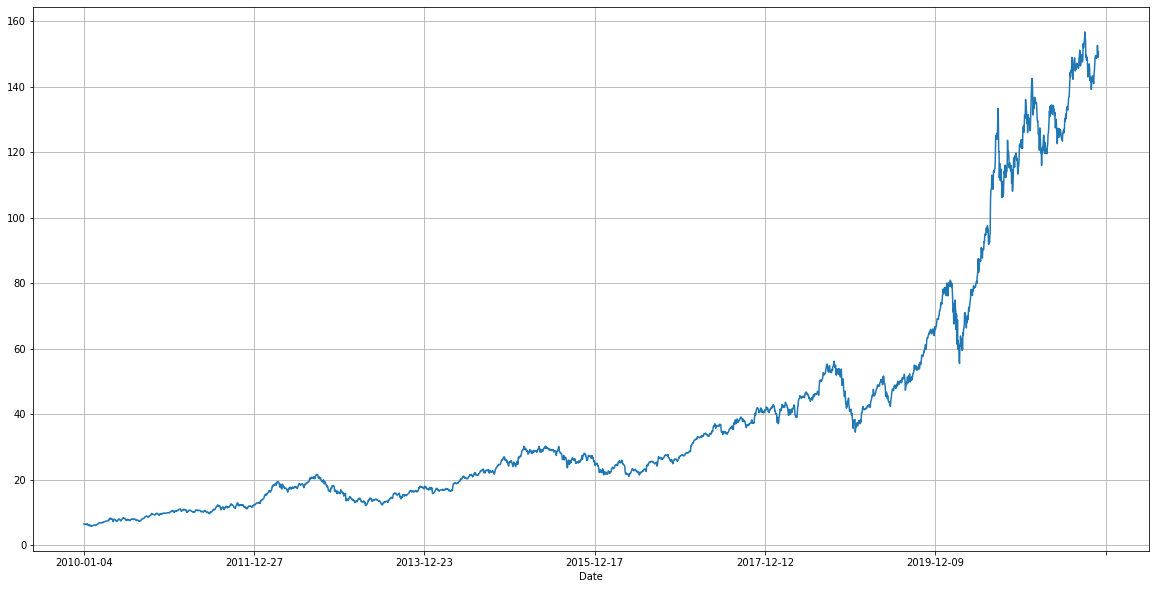

In [ ]:
df11.set_index('Date')['Adj Close'].plot(figsize=FIGURE_SIZE)

This code generates a plot of the 'Adj Close' column from a pandas DataFrame called `df11`, with the 'Date' column set as the index.

The `set_index()` function is called on the DataFrame `df11`, specifying the 'Date' column as the index column. This reorganizes the DataFrame such that the 'Date' column becomes the new index, allowing for easier data manipulation and plotting based on the dates.

After setting the index, the code selects the 'Adj Close' column from the DataFrame using indexing notation. This retrieves the specific column that represents the adjusted closing prices of a stock or a financial instrument.

The `plot()` function is then applied to the selected column, generating a line plot of the adjusted closing prices against the corresponding dates. The plot is displayed with a figure size defined by the `FIGURE_SIZE` variable, which determines the width and height of the resulting plot.

By generating this plot, the code visualizes the historical trend or pattern of the adjusted closing prices over time, providing insights into the performance or behavior of the corresponding stock or financial instrument.

In summary, this code sets the 'Date' column as the index of the DataFrame `df11`, selects the 'Adj Close' column, and plots the adjusted closing prices against the dates. The resulting plot offers a visual representation of the historical price movements, aiding in the analysis and interpretation of the data.

In [ ]:

mask = (df11['Date'] > '2010-01-01') & (df11['Date'] <= '2019-12-31')
print(df11.loc[mask])

            Date  Adj Close  ...  week_of_month  is_weekend
0     2010-01-04   6.562589  ...              1           0
1     2010-01-05   6.573936  ...              1           0
2     2010-01-06   6.469368  ...              1           0
3     2010-01-07   6.457407  ...              1           0
4     2010-01-08   6.500340  ...              2           0
...          ...        ...  ...            ...         ...
2511  2019-12-24  70.129509  ...              4           0
2512  2019-12-26  71.520905  ...              4           0
2513  2019-12-27  71.493767  ...              4           0
2514  2019-12-30  71.918076  ...              5           0
2515  2019-12-31  72.443565  ...              5           0

[2516 rows x 13 columns]


This code filters the rows of a pandas DataFrame called `df11` based on a specific condition and prints the resulting subset of data.

The code defines a boolean mask by combining two conditions using the `&` operator. The first condition checks if the values in the 'Date' column of `df11` are greater than '2010-01-01', and the second condition checks if the values are less than or equal to '2019-12-31'. The resulting mask is a boolean array that evaluates to `True` for rows that satisfy both conditions and `False` otherwise.

By using this mask in the indexing operation `df11.loc[mask]`, the code selects and retrieves the subset of rows from `df11` that meet the specified date range criteria. Only the rows that correspond to `True` values in the mask are included in the resulting subset.

Finally, the `print()` function is used to display the subset of data, providing a snapshot of the filtered rows from `df11`.

In summary, this code filters the rows of `df11` based on a date range condition, stores the resulting subset of data in a new DataFrame, and then prints the filtered rows to show the selected subset of data that falls within the specified date range.

In [ ]:
df12=df11.loc[mask]

This code creates a new pandas DataFrame named `df12` by selecting specific rows from an existing DataFrame `df11` based on a given condition.

The condition is defined using a boolean mask, which is created by comparing the values in the 'Date' column of `df11` with the date range of interest. The mask evaluates to `True` for the rows that satisfy the condition (fall within the specified date range) and `False` for the rows that do not.

By using the `.loc` accessor and passing the mask as an index to `df11`, the code selects and retrieves the rows from `df11` that correspond to the `True` values in the mask. Only the rows that meet the specified condition are included in the resulting subset.

The selected rows are then assigned to a new DataFrame named `df12`. This creates a separate DataFrame that contains the filtered subset of data from `df11`.

In summary, this code generates a new DataFrame `df12` by extracting and storing a subset of rows from `df11` based on a specific condition defined by a boolean mask. The resulting `df12` DataFrame contains only the rows from `df11` that satisfy the condition, providing a filtered view of the original data.

select your feature 

In [ ]:
#X=  df11[['Date']]
y= df11['Adj Close']

This code assigns specific columns from a pandas DataFrame `df11` to variables `X` and `y`.

The commented line `#X = df11[['Date']]` suggests that the column 'Date' from `df11` is being assigned to the variable `X`. However, it is commented out, which means it is not currently executed.

The next line `y = df11['Adj Close']` assigns the values from the 'Adj Close' column of `df11` to the variable `y`. This line is not commented and is active in the code.

By assigning the 'Adj Close' column to `y`, it creates a separate pandas Series or DataFrame (depending on the structure of `df11['Adj Close']`) containing the data from the 'Adj Close' column.

These assignments allow for storing and isolating specific columns of interest from the original DataFrame `df11`. `X` and `y` can then be used for further analysis, modeling, or any other operations where separate access to the 'Date' or 'Adj Close' data is required.

In summary, this code assigns the values from the 'Adj Close' column of `df11` to the variable `y`, providing a separate reference to the data in that column. The line that assigns the 'Date' column to `X` is commented out, indicating that it is not currently being executed. These assignments enable working with specific columns of data independently for subsequent tasks.

Scale and transform

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
y=scaler.fit_transform(np.array(y).reshape(-1,1))

This code performs data scaling using the MinMaxScaler from the scikit-learn library on the variable `y`.

First, the code imports the MinMaxScaler class from the sklearn.preprocessing module, which provides various data preprocessing techniques.

Next, a MinMaxScaler object is instantiated and assigned to the variable `scaler`. The `feature_range` parameter is set to (0, 1), which specifies the desired range for scaling the data.

Then, the `fit_transform()` method is applied to `y`. The `fit_transform()` function performs two steps: it fits the scaler to the data, determining the minimum and maximum values of `y`, and then applies the scaling transformation to the data. The `np.array(y).reshape(-1,1)` code converts the `y` variable into a numpy array and reshapes it to have a single column, as expected by the scaler.

The result of the scaling operation is stored back into the `y` variable, overwriting its original values. The new `y` variable now contains the scaled values of the original data, with all values ranging between 0 and 1.

In summary, this code uses the MinMaxScaler from scikit-learn to scale the values in the variable `y` between 0 and 1. Scaling data can be beneficial for various machine learning algorithms or data analysis tasks that require data normalization or a specific range of values. The scaled values are then stored back into the `y` variable for further use.

In [ ]:
##splitting dataset into train and test split
training_size=int(len(y)*0.65)
test_size=len(y)-training_size
train_data,test_data=y[0:training_size,:],y[training_size:len(y),:1]

This code splits a dataset, represented by the variable `y`, into training and test datasets.

The variable `training_size` is calculated by multiplying the length of `y` by 0.65 and converting the result to an integer. This determines the number of samples that will be included in the training dataset. The remaining samples will be allocated to the test dataset.

The variable `test_size` is calculated by subtracting the `training_size` from the total length of `y`. This determines the number of samples that will be included in the test dataset.

The `train_data` variable is then assigned a slice of `y` containing the first `training_size` samples. This represents the training dataset and includes all columns of the `y` array.

The `test_data` variable is assigned a slice of `y` containing the samples starting from `training_size` until the end of the `y` array. The `:1` indexing is used to select only the first column of `y`, resulting in a two-dimensional array or DataFrame with a single column. This represents the test dataset.

In summary, this code splits the dataset represented by `y` into a training dataset and a test dataset. The size of the split is determined by allocating 65% of the samples to the training dataset and the remaining samples to the test dataset. The resulting training and test datasets are stored in the `train_data` and `test_data` variables, respectively.

In [ ]:
training_size,test_size

(1937, 1043)

This code calculates the sizes of the training and test datasets based on the lengths of the variables `y`.

The `training_size` is determined by multiplying the length of `y` by 0.65 and converting the result to an integer. This value represents the number of samples that will be included in the training dataset.

The `test_size` is calculated by subtracting the `training_size` from the total length of `y`. This value represents the number of samples that will be allocated to the test dataset.

By calculating these sizes, the code provides an understanding of the distribution of samples between the training and test datasets. The training dataset is typically used to train a machine learning model, while the test dataset is used to evaluate the model's performance on unseen data.

The sizes of the training and test datasets can vary depending on the specific requirements and constraints of the task at hand. It is common to adjust the split ratio based on factors such as the available data, the desired model complexity, and the evaluation goals.

In summary, this code calculates the sizes of the training and test datasets based on the length of the `y` variable, providing information on the number of samples that will be allocated to each dataset for subsequent analysis or modeling tasks.

In [ ]:
train_data[2]

array([0.00384731])

This code retrieves a specific element from the `train_data` dataset, using the index value 2.

The variable `train_data` represents the training dataset, which is a subset of the original data. It contains a collection of samples used to train a machine learning model or perform other analysis tasks.

By accessing `train_data[2]`, the code selects the element at index position 2 from the dataset. The indexing starts from 0, so `train_data[2]` refers to the third element in the `train_data` dataset.

The specific nature of the element retrieved depends on the structure and content of the dataset. It could be a single value, a row of data, or a specific column or attribute from a multidimensional dataset.

In summary, this code accesses and retrieves a specific element from the `train_data` dataset, allowing for the extraction of individual values or subsets of data for further analysis or processing. The specific element obtained depends on the indexing used and the structure of the dataset.

In [ ]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  #0-100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

This code defines a function named `create_dataset` that takes in a dataset and a time step as input parameters and returns two arrays: `dataX` and `dataY`.

The function is designed to create a supervised learning dataset by splitting the original dataset into input (X) and output (Y) components. The time step parameter determines the number of past observations considered for predicting the next value.

Inside the function, a loop iterates over the range of indices from 0 to the length of the dataset minus the time step minus 1. This ensures that enough observations are available to form complete input-output pairs.

For each iteration, the loop extracts a sequence of values from the dataset, starting from index `i` and continuing for `time_step` number of steps. These values are stored in the `dataX` array, representing the input features for the supervised learning model.

The corresponding target value is the observation immediately following the input sequence, which is obtained by indexing the dataset at `i + time_step`. These target values are stored in the `dataY` array, representing the desired output or the predicted value.

Finally, the function returns the `dataX` and `dataY` arrays as numpy arrays, providing the input-output pairs that can be used for training a supervised learning model.

In summary, this code defines a function that takes a dataset and a time step as input and creates a supervised learning dataset by dividing the original dataset into input and output sequences. The input sequences (`dataX`) consist of past observations, and the corresponding output values (`dataY`) represent the next observation. These input-output pairs can be utilized for training a machine learning model to make predictions based on past data.

In [ ]:
import numpy

This code imports the `numpy` library into the Python script.

The `numpy` library is a fundamental package for scientific computing in Python. It provides powerful data structures, such as multi-dimensional arrays and matrices, along with a collection of mathematical functions for performing numerical computations efficiently.

By importing `numpy`, the code enables the use of `numpy` functions, classes, and methods throughout the script. This allows for efficient array manipulation, mathematical operations, statistical calculations, and more.

Importing `numpy` at the beginning of a script is a common practice when working with numerical data and performing scientific computations. It ensures that the necessary functionalities and tools provided by `numpy` are available for use in the script.

In summary, this code imports the `numpy` library, which is a widely used package for scientific computing in Python. By importing `numpy`, the code gains access to its array manipulation capabilities, mathematical functions, and other numerical computing tools that can be utilized in the subsequent code.

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

This code creates training and test datasets by applying the `create_dataset` function to the `train_data` and `test_data` variables, respectively.

The variable `time_step` is set to a value of 100, which determines the number of past observations used as input features for predicting the next value.

The `create_dataset` function takes a dataset and a time step as input and returns two arrays: `dataX` and `dataY`. It splits the original dataset into input (X) and output (Y) components, forming supervised learning pairs.

By calling `create_dataset(train_data, time_step)`, the function is applied to the `train_data` variable, generating `X_train` and `y_train`. The `X_train` array contains input sequences of length `time_step`, representing the past observations for training the model. The corresponding target values for these input sequences are stored in the `y_train` array, representing the desired outputs or predicted values for training.

Similarly, `create_dataset(test_data, time_step)` is called to create the test dataset. The function generates `X_test` and `y_test`, which are arrays of input sequences and target values for the test dataset, respectively.

Overall, this code prepares the training and test datasets by extracting input-output pairs from the `train_data` and `test_data` variables using the `create_dataset` function. The input sequences and target values obtained from this process will be utilized for training and evaluating a machine learning model.

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

This code reshapes the training and test datasets `X_train` and `X_test`, respectively, by adding an additional dimension to their shape.

The `reshape()` function is used to modify the shape of an array or matrix. In this case, it is applied to the `X_train` and `X_test` arrays.

The shape of an array represents its dimensions or the size of each dimension. In this context, the shape of `X_train` and `X_test` is initially defined by the number of samples (rows) and the number of time steps (columns) in the input sequences.

By calling `X_train.reshape(X_train.shape[0], X_train.shape[1], 1)`, the code modifies the shape of `X_train` to have an additional dimension of size 1. This additional dimension is inserted at the end of the shape, which effectively changes the shape from a 2D structure to a 3D structure.

The same process is applied to `X_test` by calling `X_test.reshape(X_test.shape[0], X_test.shape[1], 1)`, resulting in a reshaped `X_test` array with a 3D shape.

The purpose of this reshaping is to match the input requirements of certain machine learning models or deep learning frameworks that expect input data in a specific format, typically involving a 3D array structure. The added dimension can represent additional features or time-related information in the data.

In summary, this code modifies the shape of the `X_train` and `X_test` arrays by adding an extra dimension at the end, transforming them from 2D arrays to 3D arrays. This reshaping is often necessary to meet the input requirements of certain models or frameworks, ensuring compatibility between the data and the subsequent modeling or analysis tasks.

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout ,BatchNormalization
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.initializers import RandomNormal, Constant


This code imports necessary modules and classes from the TensorFlow and scikit-learn libraries for building a stacked LSTM model.

The `tensorflow.keras.models` module is imported, which provides the `Sequential` class for creating a sequential model. The sequential model is a linear stack of layers that allows building deep learning models layer by layer.

The `tensorflow.keras.layers` module is imported, which includes classes for defining various types of layers. In this code, the `Dense`, `Dropout`, and `BatchNormalization` layers are imported. These layers are building blocks used to construct the architecture of the stacked LSTM model.

The `tensorflow.keras.layers.LSTM` class is imported, which represents the Long Short-Term Memory (LSTM) layer. LSTM is a type of recurrent neural network (RNN) layer commonly used for processing sequential data.

The `sklearn.preprocessing` module is imported, which provides the `MinMaxScaler` class. This class is used for scaling the data to a specific range, typically between 0 and 1. Scaling the data can help improve the model's performance and convergence during training.

The `tensorflow.keras.initializers` module is imported, which contains classes for initializing the weights and biases of neural network layers. In this code, the `RandomNormal` and `Constant` classes are imported. These classes allow specifying custom initializers for the layer parameters.

By importing these modules and classes, the code ensures that the necessary components for building a stacked LSTM model are available. These components include the model itself, various layer types, data scaling capabilities, and customizable weight initialization options.

In summary, this code imports the required modules, classes, and functions from TensorFlow and scikit-learn for constructing a stacked LSTM model. These imports provide the building blocks necessary for defining the model architecture, scaling the input data, and customizing the weight initialization of the model's layers.

# LSTM Model

In [ ]:


model=Sequential()
# Adding first LSTM layer
model.add(LSTM(units=100, return_sequences=True, input_shape=(100,1)))
model.add(Dropout(0.2))
# second LSTM layer 
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
# Adding third LSTM layer 
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
# Adding fourth LSTM layer
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
# Adding fifth LSTM layer a
model.add(LSTM(units=100))
model.add(Dropout(0.2))
# Adding the Output Layer
model.add(Dense(units=1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')





This code builds a stacked LSTM model using the `Sequential` class from TensorFlow's Keras API.

The `Sequential` class represents a linear stack of layers, and it serves as the foundation for constructing the model architecture.

First, an instance of the `Sequential` class is created by assigning it to the `model` variable.

The model is then constructed layer by layer:

1. The first LSTM layer is added using the `model.add()` method. This layer has 100 units (neurons) and is set to return sequences (`return_sequences=True`). The `input_shape` parameter specifies the shape of the input data, which is (100, 1) in this case, representing 100 time steps and 1 feature.
2. A dropout layer is added after the first LSTM layer using `model.add(Dropout(0.2))`. Dropout is a regularization technique that helps prevent overfitting by randomly dropping a fraction of the input units during training.
3. The process is repeated for the second, third, fourth, and fifth LSTM layers, each having 100 units and returning sequences. Dropout layers with a dropout rate of 0.2 are added after each LSTM layer.
4. Finally, an output layer is added using `model.add(Dense(units=1))`. This layer consists of a single unit, representing the predicted output.

The model's architecture is now defined, consisting of multiple LSTM layers stacked on top of each other, followed by a dropout layer and an output layer.

After constructing the model, it is compiled using `model.compile()`. The optimizer is set to 'adam', which is a popular optimization algorithm for training neural networks. The loss function is set to 'mean_squared_error', which is commonly used for regression tasks.

In summary, this code builds a stacked LSTM model with multiple LSTM layers, dropout layers for regularization, and a dense output layer. The model is configured with the 'adam' optimizer and the 'mean_squared_error' loss function, ready for training and prediction tasks.

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_62 (LSTM)              (None, 100, 100)          40800     
                                                                 
 dropout_49 (Dropout)        (None, 100, 100)          0         
                                                                 
 lstm_63 (LSTM)              (None, 100, 100)          80400     
                                                                 
 dropout_50 (Dropout)        (None, 100, 100)          0         
                                                                 
 lstm_64 (LSTM)              (None, 100, 100)          80400     
                                                                 
 dropout_51 (Dropout)        (None, 100, 100)          0         
                                                                 
 lstm_65 (LSTM)              (None, 100, 100)        

The `model.summary()` code generates a summary of the model architecture, providing a concise overview of the layers and parameters used in the model.

When this code is executed, it displays a table-like summary that includes important details about the model's structure. Each layer in the model is listed along with its index number, starting from 0. The type of each layer, such as LSTM, Dropout, or Dense, is indicated in the summary.

The summary also includes the output shape of each layer, which helps understand how the data flows through the model. The output shape describes the dimensions of the data that is produced by each layer, giving insights into the information processing and transformation occurring within the model.

Furthermore, the summary provides the number of trainable parameters in each layer. These parameters are the weights and biases that the model learns during training. By knowing the number of parameters, one can assess the model's complexity and potential capacity for learning from the data.

Analyzing the model summary is useful for gaining an understanding of the model's structure, complexity, and the flow of data through its layers. It helps identify the types of layers used, the output shapes at each layer, and the overall number of trainable parameters.

The model summary is valuable for model debugging, optimizing performance, and ensuring the desired architecture has been implemented correctly. It provides a high-level overview of the model's components, enabling a quick assessment of its complexity and an understanding of how information is processed within the model.

In summary, the `model.summary()` code generates a summary of the model's architecture, presenting information about the layer types, output shapes, and trainable parameters. This summary is a useful tool for understanding and analyzing the model's structure and complexity, aiding in the optimization and evaluation of the model's performance.

In [ ]:
history= model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=54,batch_size=84,verbose=1)

Epoch 1/54
22/22 [==============================] - 36s 2s/step - loss: 7.6719e-05 - val_loss: 9.7872e-04
Epoch 2/54
22/22 [==============================] - 25s 1s/step - loss: 7.1939e-05 - val_loss: 0.0010
Epoch 3/54
22/22 [==============================] - 25s 1s/step - loss: 6.6602e-05 - val_loss: 9.5697e-04
Epoch 4/54
22/22 [==============================] - 26s 1s/step - loss: 6.8357e-05 - val_loss: 8.5420e-04
Epoch 5/54
22/22 [==============================] - 25s 1s/step - loss: 7.2846e-05 - val_loss: 9.3086e-04
Epoch 6/54
22/22 [==============================] - 25s 1s/step - loss: 7.0045e-05 - val_loss: 8.3398e-04
Epoch 7/54
22/22 [==============================] - 25s 1s/step - loss: 7.2586e-05 - val_loss: 9.7613e-04
Epoch 8/54
22/22 [==============================] - 25s 1s/step - loss: 6.9511e-05 - val_loss: 0.0025
Epoch 9/54
22/22 [==============================] - 27s 1s/step - loss: 7.4774e-05 - val_loss: 8.8019e-04
Epoch 10/54
22/22 [==============================] - 2

This code trains the constructed model using the training dataset (`X_train` and `y_train`) and validates it using the test dataset (`X_test` and `ytest`).

The `model.fit()` function is used to train the model. It takes the input data (`X_train`) and the corresponding target values (`y_train`) as arguments. During training, the model adjusts its weights and biases based on the provided data to learn the underlying patterns and relationships.

The `validation_data` parameter is used to specify the validation dataset, which consists of the test data (`X_test`) and its corresponding target values (`ytest`). The model evaluates its performance on this dataset after each training epoch, providing insights into its generalization ability and helping to prevent overfitting.

The `epochs` parameter determines the number of times the model will iterate over the entire training dataset during training. Each iteration is called an epoch. By specifying 54 epochs, the model will go through the training dataset 54 times, gradually refining its predictions and improving its performance.

The `batch_size` parameter defines the number of samples from the training dataset that are processed together in each training iteration. It affects the speed and efficiency of training. In this case, a batch size of 84 is used.

The `verbose` parameter controls the verbosity of the training process. By setting it to 1, the training progress and metrics will be displayed during training, providing real-time feedback on the model's performance.

The training process captures various information, such as the loss function value and performance metrics, for each epoch. This information is stored in the `history` object, allowing for further analysis and visualization of the training process and model performance.

In summary, this code trains the model using the specified training dataset and validates it using the test dataset. By specifying the number of epochs, batch size, and verbosity, the code controls the training process and captures the training history for analysis.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

This code imports the `EarlyStopping` callback class from the TensorFlow Keras library.

The `EarlyStopping` callback is used during the training of a neural network model to monitor a specified metric, such as the validation loss or accuracy, and stop the training process early if certain criteria are met.

The `EarlyStopping` class provides a way to define conditions for early stopping based on the monitored metric. These conditions can include criteria such as no improvement in the monitored metric for a specified number of epochs, reaching a predefined threshold, or exceeding a maximum number of epochs.

By using the `EarlyStopping` callback, one can automatically stop the training process if the model's performance on the validation data does not improve or worsens, preventing unnecessary computation and saving time.

The callback can be added to the training process by passing it as an argument to the `callbacks` parameter of the `model.fit()` function. This allows the training process to be interrupted and the model to be saved or evaluated based on the best-performing epoch.

In summary, the `from tensorflow.keras.callbacks import EarlyStopping` code imports the `EarlyStopping` callback class, which provides a mechanism to stop the training of a neural network model early based on specified conditions and monitored metrics. This callback can be added to the training process to automatically stop the training if certain criteria are met, such as lack of improvement in validation performance, thus optimizing the training process and preventing unnecessary computation.

In [ ]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, 
        verbose=1, mode='auto', restore_best_weights=True)

history=model.fit(X_train,y_train,validation_data=(X_test,ytest),
        callbacks=[monitor],verbose=1,epochs=1000)

Epoch 1/1000
58/58 [==============================] - 62s 564ms/step - loss: 0.0014 - val_loss: 0.0077
Epoch 2/1000
58/58 [==============================] - 30s 525ms/step - loss: 1.5463e-04 - val_loss: 0.0019
Epoch 3/1000
58/58 [==============================] - 30s 519ms/step - loss: 1.1932e-04 - val_loss: 0.0021
Epoch 4/1000
58/58 [==============================] - 30s 513ms/step - loss: 1.0929e-04 - val_loss: 0.0020
Epoch 5/1000
58/58 [==============================] - 30s 524ms/step - loss: 1.0806e-04 - val_loss: 0.0016
Epoch 6/1000
58/58 [==============================] - 30s 512ms/step - loss: 9.5133e-05 - val_loss: 0.0022
Epoch 7/1000
58/58 [==============================] - 30s 518ms/step - loss: 7.7988e-05 - val_loss: 0.0011
Epoch 8/1000
58/58 [==============================] - 30s 513ms/step - loss: 9.0877e-05 - val_loss: 9.9487e-04
Epoch 9/1000
58/58 [==============================] - 30s 513ms/step - loss: 9.4938e-05 - val_loss: 0.0011
Epoch 10/1000
58/58 [================

This code sets up an `EarlyStopping` callback named `monitor` with specific parameters to monitor the validation loss during the training process of the model.

The `monitor` callback is configured to track the `'val_loss'` metric, which represents the validation loss. It will monitor the changes in the validation loss and compare them to a minimum threshold (`min_delta`) of 1e-3. If the validation loss does not improve by at least this threshold value for a specified number of epochs (`patience`), the training process will be stopped.

The `verbose` parameter is set to 1, which means that the callback will provide informative messages about the training process and any early stopping actions taken.

The `mode` parameter is set to `'auto'`, which allows the callback to automatically determine the direction of improvement based on the monitored metric. For example, if the validation loss is being monitored, the callback will stop the training process when the loss starts to increase consistently.

The `restore_best_weights` parameter is set to `True`, which ensures that the weights of the model are restored to the best-performing state based on the monitored metric. This allows the model to retain its optimal configuration rather than using the weights from the last epoch.

Finally, the `monitor` callback is added to the training process by including it in the `callbacks` parameter of the `model.fit()` function. This allows the callback to be executed during training and take the necessary actions when the specified conditions for early stopping are met.

In summary, the `EarlyStopping` callback is configured with specific parameters to monitor the validation loss during the training of the model. By including this callback in the `model.fit()` function, the training process will be stopped early if the validation loss does not improve significantly for a certain number of epochs, allowing for efficient training and preventing overfitting. The callback also restores the best weights of the model based on the monitored metric, ensuring optimal performance.

Save model if you want and load 

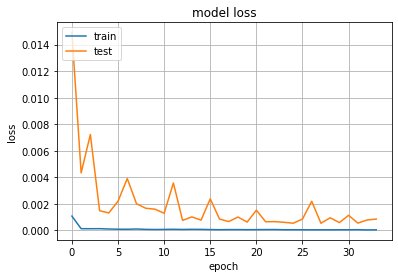

In [ ]:
plt.plot(history.history['loss']) #r
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

This code generates a line plot to visualize the loss values of the model during the training process.

The first line, `plt.plot(history.history['loss'])`, plots the training loss values. It accesses the `loss` values from the `history` object, which contains the training history of the model, including the loss values at each epoch. By plotting these values, the line represents the change in training loss over the epochs.

The second line, `plt.plot(history.history['val_loss'])`, plots the validation loss values. It accesses the `val_loss` values from the `history` object, which represents the loss values obtained on the validation dataset during each epoch of training. By plotting these values, the line shows how the validation loss changes over the epochs.

The following lines set the title, labels, and legend for the plot. The title is set as "model loss", indicating that the plot represents the loss of the model. The ylabel is set as "loss", indicating the type of the plotted values. The xlabel is set as "epoch", indicating the x-axis represents the number of training epochs. The legend is set to include the labels "train" and "test", representing the training and validation loss, respectively. The `loc='upper left'` argument specifies the location of the legend in the plot.

Finally, `plt.show()` is called to display the plot on the screen.

In summary, this code generates a line plot that visualizes the change in training and validation loss values over the epochs. By plotting these values, the plot provides insights into the performance of the model during the training process, allowing for analysis of overfitting, convergence, and the effectiveness of the training procedure.

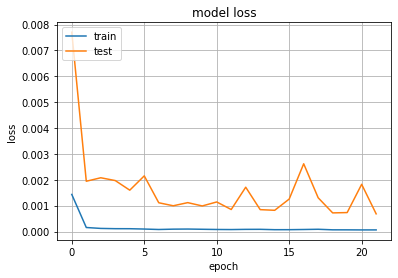

In [ ]:
plt.plot(history.history['loss']) # vn
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


This code generates a line plot to visualize the loss values of the model during the training process.

The first line, `plt.plot(history.history['loss'])`, plots the training loss values. It accesses the 'loss' values from the `history` object, which contains the training history of the model, including the loss values at each epoch. By plotting these values, the line represents the change in training loss over the epochs.

The second line, `plt.plot(history.history['val_loss'])`, plots the validation loss values. It accesses the 'val_loss' values from the `history` object, which represents the loss values obtained on the validation dataset during each epoch of training. By plotting these values, the line shows how the validation loss changes over the epochs.

The following lines set the title, labels, and legend for the plot. The title is set as 'model loss', indicating that the plot represents the loss of the model. The ylabel is set as 'loss', indicating the type of the plotted values. The xlabel is set as 'epoch', indicating the x-axis represents the number of training epochs. The legend is set to include the labels 'train' and 'test', representing the training and validation loss, respectively. The 'loc='upper left'' argument specifies the location of the legend in the plot.

Finally, `plt.show()` is called to display the plot on the screen.

In summary, this code generates a line plot that visualizes the change in training and validation loss values over the epochs. By plotting these values, the plot provides insights into the performance of the model during the training process, allowing for analysis of overfitting, convergence, and the effectiveness of the training procedure.

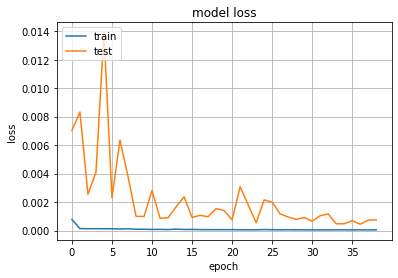

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

This code generates a line plot to visualize the loss values of a trained model during the training process.

The first line, `plt.plot(history.history['loss'])`, plots the training loss values. The `history` object contains the training history of the model, including the loss values at each epoch. By plotting these values, the line represents the change in training loss over the epochs.

The second line, `plt.plot(history.history['val_loss'])`, plots the validation loss values. The `history` object also contains the validation loss values obtained during each epoch. By plotting these values, the line shows how the validation loss changes over the epochs.

The `title()` function sets the title of the plot as 'model loss'. This title provides an overall description of the plot, indicating that it represents the loss of the model.

The `ylabel()` function sets the label for the y-axis as 'loss'. This label specifies the type of the plotted values, indicating that the values represent the loss of the model.

The `xlabel()` function sets the label for the x-axis as 'epoch'. This label indicates that the x-axis represents the number of training epochs.

The `legend()` function adds a legend to the plot. The legend includes two labels: 'train' and 'test', which represent the training and validation loss, respectively. The `loc='upper left'` argument specifies the position of the legend in the plot, indicating that it should be placed in the upper left corner.

Finally, `plt.show()` is called to display the plot on the screen.

In summary, this code generates a line plot that visualizes the change in training and validation loss values over the epochs. By plotting these values and adding appropriate labels and legend, the plot provides an understanding of the model's performance and the convergence of the loss during the training process.

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

This code performs predictions using a trained model on both the training and test datasets.

The `model.predict()` function is used to obtain predictions from the trained model. In this case, it is used to generate predictions for the input data `X_train` and `X_test`.

The `train_predict` variable stores the predictions made by the model on the training data. These predictions represent the model's output for the corresponding input sequences in the training dataset.

Similarly, the `test_predict` variable stores the predictions made by the model on the test data. These predictions represent the model's output for the corresponding input sequences in the test dataset.

By obtaining predictions on both the training and test datasets, we can assess the performance of the model. This allows us to compare the predicted values against the actual values and evaluate how well the model generalizes to unseen data.

In summary, this code uses a trained model to generate predictions on both the training and test datasets, storing the results in the `train_predict` and `test_predict` variables, respectively. These predictions are then used to evaluate the performance of the model by comparing them with the actual values.

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

This code transforms the predicted values back to their original scale or form.

The `scaler.inverse_transform()` function is used to reverse the scaling transformation applied to the predicted values. In this case, it is applied to the `train_predict` and `test_predict` variables, which store the predictions made by the model on the training and test datasets, respectively.

By applying the inverse transformation, the predicted values are converted back to their original scale or units. This is important because the predictions were previously scaled or normalized to a specific range or distribution for model training and evaluation purposes.

The resulting `train_predict` and `test_predict` variables now contain the predictions in their original form, allowing for a more meaningful interpretation and comparison with the actual values.

In summary, this code reverses the scaling transformation applied to the predicted values, converting them back to their original scale or form. This enables a more accurate assessment and interpretation of the model's predictions in comparison to the actual values.

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

21.348368386103683

This code calculates the root mean squared error (RMSE) as a performance metric to assess the accuracy of the model's predictions.

The `mean_squared_error()` function from the `sklearn.metrics` module is used to calculate the mean squared error (MSE) between the actual target values (`y_train`) and the predicted target values (`train_predict`) on the training dataset.

The MSE represents the average squared difference between the predicted values and the actual values. Taking the square root of the MSE gives us the RMSE, which provides a more interpretable metric as it is in the same units as the target variable.

The calculated RMSE value is then outputted as the result of this code. A lower RMSE indicates better performance, as it represents the average magnitude of the prediction errors.

In summary, this code calculates the RMSE value between the actual and predicted values on the training dataset, providing a measure of the model's performance in terms of prediction accuracy.

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

88.2181916072008

This code calculates the root mean squared error (RMSE) as a performance metric for the model's predictions on the test dataset.

The `mean_squared_error()` function from the `sklearn.metrics` module is used to calculate the mean squared error (MSE) between the actual target values (`ytest`) and the predicted target values (`test_predict`) on the test dataset.

The MSE represents the average squared difference between the predicted values and the actual values. Taking the square root of the MSE gives us the RMSE, which provides a more interpretable metric as it is in the same units as the target variable.

The calculated RMSE value is then outputted as the result of this code. The RMSE on the test dataset helps evaluate how well the model generalizes to unseen data. A lower RMSE indicates better performance, as it represents the average magnitude of the prediction errors on the test dataset.

In summary, this code calculates the RMSE value between the actual and predicted values on the test dataset, providing a measure of the model's performance in terms of prediction accuracy on unseen data.

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

21.21774883892234

This code calculates the root mean squared error (RMSE) as a performance metric to evaluate the accuracy of the model's predictions on the training dataset.

To perform this calculation, the code imports the `math` module and the `mean_squared_error` function from the `sklearn.metrics` module.

The `mean_squared_error` function takes two arguments: the actual target values (`y_train`) and the predicted target values (`train_predict`) on the training dataset. It calculates the mean squared error (MSE) by comparing the predicted values with the actual values.

The MSE represents the average squared difference between the predicted values and the actual values. To obtain the RMSE, the square root of the MSE is computed using the `math.sqrt` function.

The calculated RMSE value is then outputted as the result. A lower RMSE indicates better performance, as it represents the average magnitude of the prediction errors on the training dataset.

In summary, this code calculates the RMSE value between the actual and predicted values on the training dataset, providing a measure of the model's performance in terms of prediction accuracy on the training data.

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

86.01959140965074

This code calculates the root mean squared error (RMSE) as a performance metric to evaluate the accuracy of the model's predictions on the test dataset.

To perform this calculation, the code imports the `math` module and the `mean_squared_error` function from the `sklearn.metrics` module.

The `mean_squared_error` function takes two arguments: the actual target values (`ytest`) and the predicted target values (`test_predict`) on the test dataset. It calculates the mean squared error (MSE) by comparing the predicted values with the actual values.

The MSE represents the average squared difference between the predicted values and the actual values. To obtain the RMSE, the square root of the MSE is computed using the `math.sqrt` function.

The calculated RMSE value is then outputted as the result. A lower RMSE indicates better performance, as it represents the average magnitude of the prediction errors on the test dataset.

In summary, this code calculates the RMSE value between the actual and predicted values on the test dataset, providing a measure of the model's performance in terms of prediction accuracy on the unseen test data.

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

21.211342928244353

This code calculates the root mean squared error (RMSE) as a performance metric to evaluate the accuracy of the model's predictions on the training dataset.

To perform this calculation, the code imports the `math` module and the `mean_squared_error` function from the `sklearn.metrics` module.

The `mean_squared_error` function takes two arguments: the actual target values (`y_train`) and the predicted target values (`train_predict`) on the training dataset. It calculates the mean squared error (MSE) by comparing the predicted values with the actual values.

The MSE represents the average squared difference between the predicted values and the actual values. To obtain the RMSE, the square root of the MSE is computed using the `math.sqrt` function.

The calculated RMSE value is then outputted as the result. A lower RMSE indicates better performance, as it represents the average magnitude of the prediction errors on the training dataset.

In summary, this code calculates the RMSE value between the actual and predicted values on the training dataset, providing a measure of the model's performance in terms of prediction accuracy on the training data.

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

87.62252121614452

This code calculates the root mean squared error (RMSE) as a performance metric to evaluate the accuracy of the model's predictions on the test dataset.

To perform this calculation, the code imports the `math` module and the `mean_squared_error` function from the `sklearn.metrics` module.

The `mean_squared_error` function takes two arguments: the actual target values (`ytest`) and the predicted target values (`test_predict`) on the test dataset. It calculates the mean squared error (MSE) by comparing the predicted values with the actual values.

The MSE represents the average squared difference between the predicted values and the actual values. To obtain the RMSE, the square root of the MSE is computed using the `math.sqrt` function.

The calculated RMSE value is then outputted as the result. A lower RMSE indicates better performance, as it represents the average magnitude of the prediction errors on the test dataset.

In summary, this code calculates the RMSE value between the actual and predicted values on the test dataset, providing a measure of the model's performance in terms of prediction accuracy on the unseen test data.

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

21.93232696332081

This code calculates the root mean squared error (RMSE) as a performance metric to evaluate the accuracy of the model's predictions on the training dataset.

To perform this calculation, the code imports the `math` module for mathematical operations and the `mean_squared_error` function from the `sklearn.metrics` module.

The `mean_squared_error` function takes two arguments: the actual target values (`y_train`) and the predicted target values (`train_predict`) on the training dataset. It calculates the mean squared error (MSE) by comparing the predicted values with the actual values.

The MSE represents the average squared difference between the predicted values and the actual values. To obtain the RMSE, the square root of the MSE is computed using the `math.sqrt` function.

The calculated RMSE value is then outputted as the result. A lower RMSE indicates better performance, as it represents the average magnitude of the prediction errors on the training dataset.

In summary, this code calculates the RMSE value between the actual and predicted values on the training dataset, providing a measure of the model's performance in terms of prediction accuracy on the training data.

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

87.40849010342191

This code calculates the root mean squared error (RMSE) as a performance metric to evaluate the accuracy of the model's predictions on the test dataset.

To perform this calculation, the code imports the `math` module for mathematical operations and the `mean_squared_error` function from the `sklearn.metrics` module.

The `mean_squared_error` function takes two arguments: the actual target values (`ytest`) and the predicted target values (`test_predict`) on the test dataset. It calculates the mean squared error (MSE) by comparing the predicted values with the actual values.

The MSE represents the average squared difference between the predicted values and the actual values. To obtain the RMSE, the square root of the MSE is computed using the `math.sqrt` function.

The calculated RMSE value is then outputted as the result. A lower RMSE indicates better performance, as it represents the average magnitude of the prediction errors on the test dataset.

In summary, this code calculates the RMSE value between the actual and predicted values on the test dataset, providing a measure of the model's performance in terms of prediction accuracy on the unseen test data.

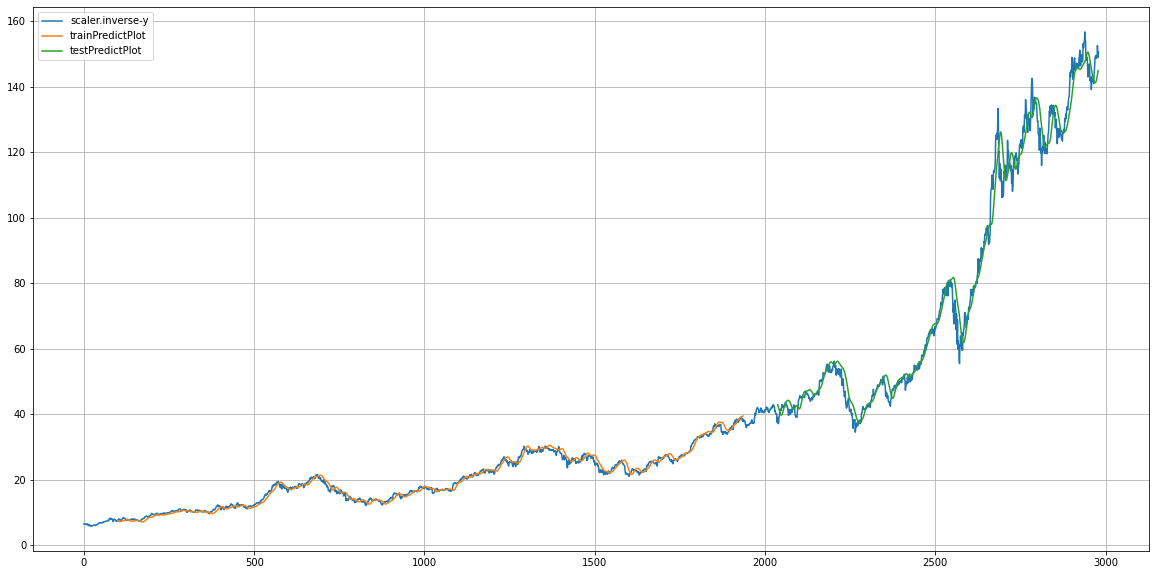

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
fig, ax = plt.subplots(figsize=(20,10))
trainPredictPlot = numpy.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(y)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(y)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['scaler.inverse-y','trainPredictPlot','testPredictPlot'])
plt.show()

This code is responsible for plotting the actual stock prices, the predicted prices on the training dataset, and the predicted prices on the test dataset.

First, it creates an empty array called `trainPredictPlot` with the same shape as the target variable (`y`), and fills it with NaN (not a number) values. This array will be used to plot the predicted prices on the training dataset.

Next, it creates another empty array called `testPredictPlot` with the same shape as `y` and fills it with NaN values. This array will be used to plot the predicted prices on the test dataset.

Then, it assigns the predicted prices from the `train_predict` array to the `trainPredictPlot` array, starting from the index `look_back` up to the length of `train_predict` plus `look_back`. This aligns the predicted values with the corresponding positions in the original `y` array.

Similarly, it assigns the predicted prices from the `test_predict` array to the `testPredictPlot` array, starting from the index `len(train_predict) + (look_back * 2) + 1` up to the index `len(y) - 1`. This aligns the predicted values with the corresponding positions in the original `y` array.

Finally, it plots the original stock prices (`scaler.inverse_transform(y)`), the `trainPredictPlot`, and the `testPredictPlot`. The legend indicates the meaning of each line in the plot.

In summary, this code generates a plot showing the actual stock prices, the predicted prices on the training dataset, and the predicted prices on the test dataset, allowing for visual comparison and evaluation of the model's performance.

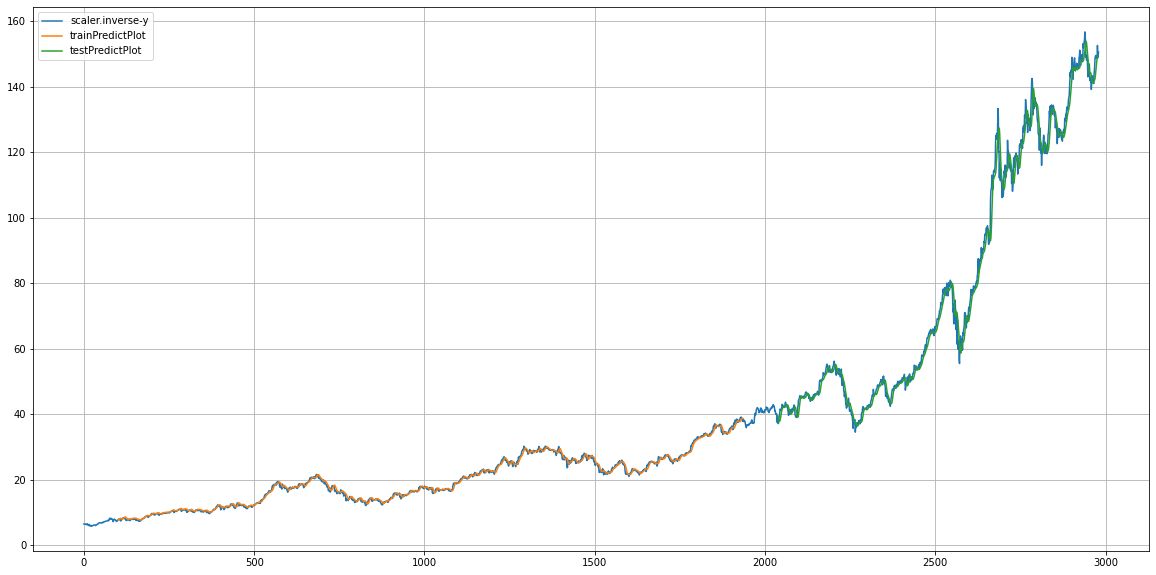

In [ ]:
# shift train predictions for plotting
look_back=100
fig, ax = plt.subplots(figsize=(20,10))
trainPredictPlot = numpy.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(y)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(y)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['scaler.inverse-y','trainPredictPlot','testPredictPlot'])
plt.show()

This code is responsible for plotting the original stock prices, the predicted prices on the training dataset, and the predicted prices on the test dataset.

First, it sets the variable `look_back` to 100, which determines the number of previous time steps to consider when making predictions.

Next, it creates a figure and axes object using `plt.subplots` to prepare for plotting. The `figsize` parameter specifies the size of the figure.

Then, it creates an empty array called `trainPredictPlot` with the same shape as the target variable `y`. This array is filled with NaN (not a number) values.

Following that, it assigns the values from the `train_predict` array to the `trainPredictPlot` array, starting from the index `look_back` up to the length of `train_predict` plus `look_back`. This aligns the predicted values with the corresponding positions in the original `y` array.

Similarly, it creates an empty array called `testPredictPlot` with the same shape as `y` and fills it with NaN values.

Then, it assigns the values from the `test_predict` array to the `testPredictPlot` array, starting from the index `len(train_predict) + (look_back * 2) + 1` up to the index `len(y) - 1`. This aligns the predicted values with the corresponding positions in the original `y` array.

Finally, it plots the original stock prices (`scaler.inverse_transform(y)`), the `trainPredictPlot`, and the `testPredictPlot`. The legend provides labels for each line in the plot.

In summary, this code generates a plot showing the original stock prices, the predicted prices on the training dataset, and the predicted prices on the test dataset, allowing for visual comparison and evaluation of the model's performance.

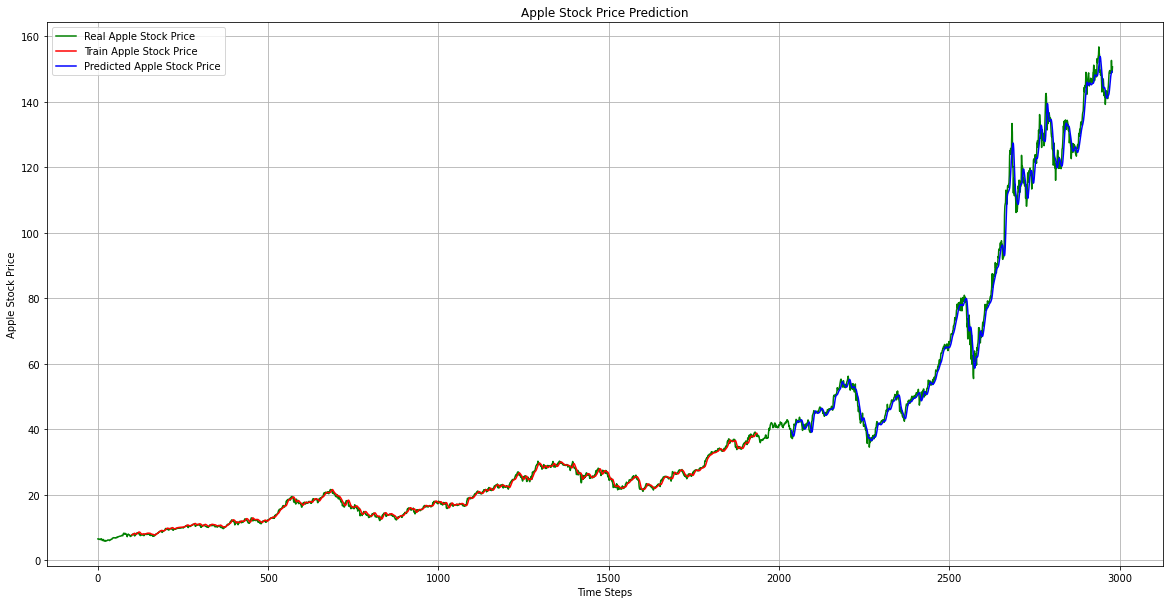

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(scaler.inverse_transform(y), color='Green', label='Real Apple Stock Price')
plt.plot(trainPredictPlot, color='Red', label='Train Apple Stock Price')
plt.plot(testPredictPlot, color='Blue', label='Predicted Apple Stock Price')

plt.title('Apple Stock Price Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

This code generates a plot showing the real Apple stock prices, the predicted prices on the training dataset, and the predicted prices on the test dataset.

First, it creates a figure and axes object using `plt.subplots` to prepare for plotting. The `figsize` parameter specifies the size of the figure.

Then, it plots the real Apple stock prices using `plt.plot` and the `scaler.inverse_transform(y)` array. The `color` parameter sets the color of the line to green, and the `label` parameter provides a label for the line.

Next, it plots the predicted prices on the training dataset using `plt.plot` and the `trainPredictPlot` array. The color of the line is set to red, and the label is provided.

After that, it plots the predicted prices on the test dataset using `plt.plot` and the `testPredictPlot` array. The color of the line is set to blue, and the label is provided.

The code then sets the title of the plot to 'Apple Stock Price Prediction' using `plt.title`, and sets the x-axis label to 'Time Steps' and the y-axis label to 'Apple Stock Price' using `plt.xlabel` and `plt.ylabel`, respectively.

Finally, it adds a legend to the plot using `plt.legend` to show the labels for the different lines, and displays the plot using `plt.show`.

In summary, this code generates a plot that visualizes the real and predicted Apple stock prices, providing a clear comparison between the actual and predicted values.

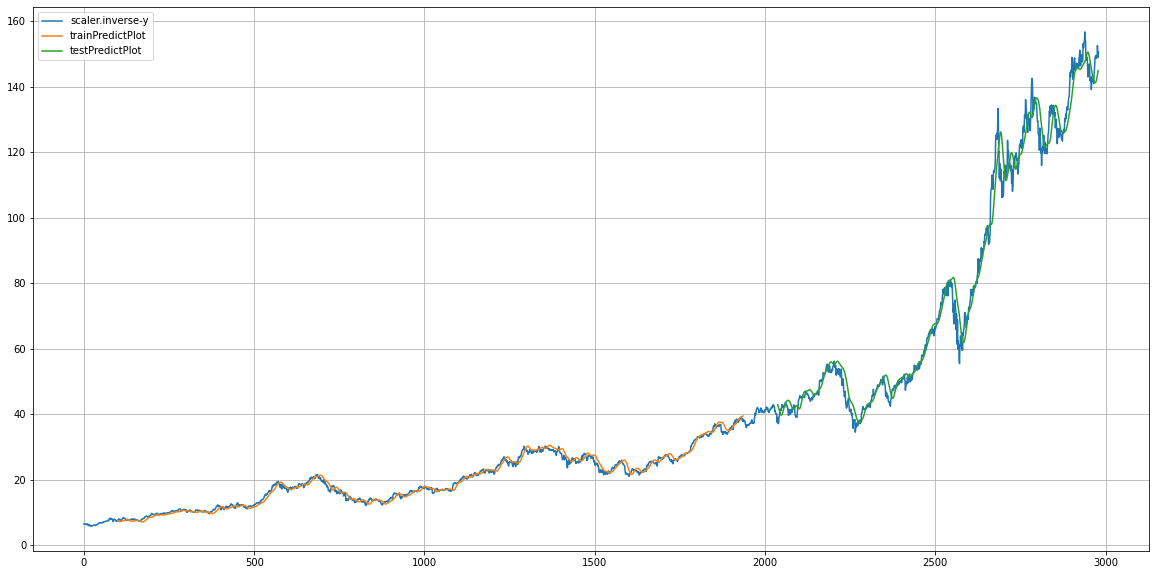

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
fig, ax = plt.subplots(figsize=(20,10))
trainPredictPlot = numpy.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(y)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(y)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['scaler.inverse-y','trainPredictPlot','testPredictPlot'])
plt.show()

This code generates a plot that visualizes the predicted Apple stock prices along with the actual prices.

First, it defines the `look_back` variable, which determines the number of time steps to shift the predictions for plotting.

Then, it creates a figure and axes object using `plt.subplots` to prepare for plotting. The `figsize` parameter specifies the size of the figure.

Next, it creates empty arrays `trainPredictPlot` and `testPredictPlot` with the same shape as the original data array `y`. These arrays will be used to store the predicted prices for plotting.

The code then assigns the predicted prices from the training dataset (`train_predict`) to the `trainPredictPlot` array, starting from the `look_back` index. This shifting is done to align the predicted prices with the original data for visualization.

Similarly, it assigns the predicted prices from the test dataset (`test_predict`) to the `testPredictPlot` array, starting from the index after the training dataset plus twice the `look_back` value. Again, this shifting aligns the predicted prices with the original data.

After that, it plots the original data using `plt.plot` and the `scaler.inverse_transform(y)` array, which transforms the scaled prices back to their original values.

Then, it plots the `trainPredictPlot` array, representing the predicted prices on the training dataset.

Finally, it plots the `testPredictPlot` array, representing the predicted prices on the test dataset.

The code adds a legend to the plot using `plt.legend` to label the lines, and displays the plot using `plt.show`.

In summary, this code generates a plot that compares the actual and predicted Apple stock prices, allowing for visual inspection of the accuracy of the predictions.

In [ ]:
aapl_model = Prophet(daily_seasonality = True) # stock prices have daily seasonality
aapl_model.fit(aapl_features)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


The code initializes a Prophet model object named `aapl_model` with the parameter `daily_seasonality` set to `True`, indicating that the stock prices being modeled have daily seasonality patterns. 

Next, it fits the Prophet model to the provided data `aapl_features`. This involves training the model to learn the underlying patterns and trends in the data. The `fit` method analyzes the historical stock price data and estimates the model parameters based on those observations.

By fitting the model, the Prophet algorithm automatically captures various components of the time series data, including trends, seasonality, and holidays, allowing it to make future predictions based on those patterns.

In summary, the code sets up and trains a Prophet model specifically for the given Apple stock price data (`aapl_features`), taking into account the daily seasonality present in the stock prices.

In [ ]:
future = aapl_model.make_future_dataframe(periods = 58) # how many days into the future we want
prediction = aapl_model.predict(future)

The code creates a `future` dataframe that represents the time points in the future for which we want to make predictions. The number of future time points is determined by the `periods` parameter, which is set to 58 in this case.

The `make_future_dataframe` method of the Prophet model generates a dataframe with the appropriate dates, starting from the last date in the original dataset and extending into the future by the specified number of periods.

After creating the `future` dataframe, the code uses the trained `aapl_model` to make predictions for the future time points. The `predict` method takes the `future` dataframe as input and produces the predictions for the target variable, which in this case is the Apple stock price.

The `prediction` object contains the predicted values for the future time points, along with additional information such as uncertainty intervals.

In summary, this code generates a `future` dataframe with dates representing future time points, and then uses the trained Prophet model (`aapl_model`) to predict the Apple stock price for those future dates. The predicted values are stored in the `prediction` object.

In [ ]:
prediction

ds       trend  ...  multiplicative_terms_upper        yhat
0    2010-01-04    6.533377  ...                         0.0    6.841865
1    2010-01-05    6.542235  ...                         0.0    6.868467
2    2010-01-06    6.551094  ...                         0.0    6.853183
3    2010-01-07    6.559953  ...                         0.0    6.814581
4    2010-01-08    6.568812  ...                         0.0    6.697646
...         ...         ...  ...                         ...         ...
3033 2021-12-26  163.360742  ...                         0.0  163.911622
3034 2021-12-27  163.489158  ...                         0.0  164.008820
3035 2021-12-28  163.617575  ...                         0.0  164.163680
3036 2021-12-29  163.745991  ...                         0.0  164.271615
3037 2021-12-30  163.874408  ...                         0.0  164.351062

[3038 rows x 22 columns]

The `prediction` variable contains the predicted values for the target variable, which in this case is the Apple stock price. These predictions are generated by the trained Prophet model based on the provided input data and the specified future time points.

The `prediction` object typically includes various columns that provide valuable information about the predictions. It may contain the following columns: 'ds' representing the dates, 'yhat' representing the predicted values, 'yhat_lower' and 'yhat_upper' representing the lower and upper bounds of the predicted values' uncertainty intervals, and other columns related to seasonality and trend components.

By accessing the `prediction` object, you can examine the predicted values for the future time points and utilize them for further analysis or visualization.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.offline as py

This code snippet imports several libraries: `numpy` for numerical computations, `pandas` for data processing and CSV file input/output, `plotly.graph_objects` for creating interactive plots, `matplotlib.pyplot` for creating static plots, and `plotly.offline` for offline rendering of plotly visualizations.

By importing these libraries, the code prepares the necessary tools for performing data analysis, visualization, and plotting tasks. It enables the use of functions and methods provided by these libraries to manipulate data, create various types of plots, and generate visualizations for further analysis.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=prediction['ds'], y=prediction['yhat'],
                    mode='markers',
                    name='Most Likely'))
fig.add_trace(go.Scatter(x=prediction['ds'], y=prediction['yhat_lower'],
                    mode='lines+markers',
                    name='Pessimistic'))
fig.add_trace(go.Scatter(x=prediction['ds'], y=prediction['yhat_upper'],
                    mode='lines',
                    name='Optimistic'))

fig.add_trace(go.Scatter(x=aapl_features['ds'], y=aapl_features['y'], name='Actual',
                         line = dict(color='goldenrod')))
fig.show()

This code creates a plot using the `plotly.graph_objects` library. It initializes a new figure object `fig` to which various traces are added.

The first three traces are scatter plots (`mode='markers'`) representing different predictions made by the model. These predictions include the most likely scenario (`yhat`), the pessimistic scenario (`yhat_lower`), and the optimistic scenario (`yhat_upper`). Each trace is plotted against the corresponding date (`ds`) from the prediction dataset.

The fourth trace is also a scatter plot representing the actual values (`y`) from the original dataset (`aapl_features`). It is plotted against the corresponding date (`ds`).

Finally, the `fig.show()` function is called to display the plot containing all the added traces. The resulting visualization presents the predicted values along with the actual values, allowing for comparison and analysis of the model's performance.

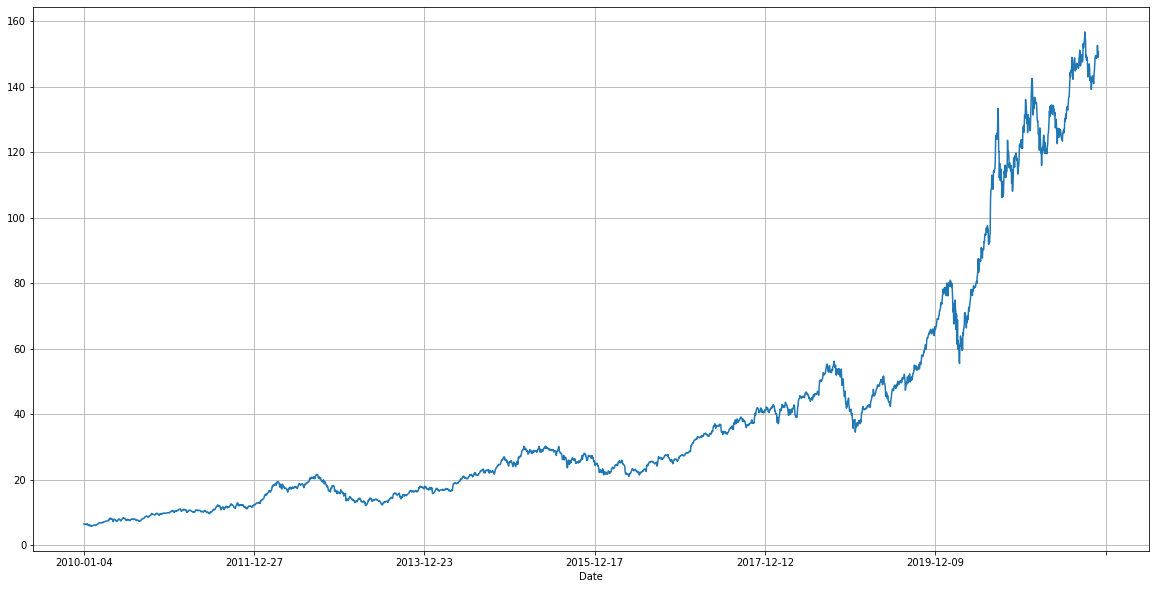

In [ ]:
df11.set_index('Date')['Adj Close'].plot(figsize=FIGURE_SIZE)

This code generates a line plot of the adjusted closing prices (`Adj Close`) from a DataFrame (`df11`) with the date (`Date`) set as the index. The plot is displayed with a specified figure size (`FIGURE_SIZE`). 

By using `set_index('Date')`, the DataFrame is restructured so that the date column becomes the index, allowing for more meaningful visualization of the time series data. The adjusted closing prices are then selected from this modified DataFrame.

The `plot()` function is called on the selected column to create the line plot. The x-axis represents the dates, and the y-axis represents the adjusted closing prices. Each point on the plot corresponds to a specific date and its corresponding adjusted closing price.

The resulting plot provides a visual representation of the historical trends and fluctuations in the adjusted closing prices over time. It helps to analyze the price patterns, identify trends, and understand the overall behavior of the stock.

# Neuralprophet

In [ ]:
#model = NeuralProphet(daily_seasonality=False)
model = NeuralProphet()

This code initializes a forecasting model using the NeuralProphet library. The model is created without specifying any specific settings, resulting in the default configuration being used.

NeuralProphet is a library built on top of the popular Prophet forecasting model, but with the addition of neural networks for improved accuracy and flexibility. It is designed to handle time series data and provide forecasting capabilities.

By instantiating the `NeuralProphet` class, an instance of the model is created and assigned to the variable `model`. This instance can be used to train the model on historical data and make predictions for future time periods.

The model's default settings include options such as daily seasonality, which allows it to capture recurring patterns on a daily basis. However, it's important to note that the specific configuration and parameters can be customized based on the requirements of the forecasting task.

Overall, this code sets up a NeuralProphet model for time series forecasting, which can be further customized and trained to make accurate predictions.

In [ ]:
metrics = model.fit(aapl_feature, 
                    freq='D', epochs=1000)

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/273 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.11E-02, min: 1.40E+00


  0%|          | 0/273 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.11E-02, min: 1.51E+00


  0%|          | 0/273 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.11E-02, min: 1.40E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.11E-02
Epoch[1000/1000]: 100%|██████████| 1000/1000 [03:34<00:00,  4.66it/s, SmoothL1Loss=0.000624, MAE=2.91, RMSE=4.28, RegLoss=0]


This code trains the previously initialized NeuralProphet model using the `fit` method. The training data, represented by the `aapl_feature` variable, is provided as input to the model.

The `fit` method performs the training process, where the model learns from the historical data to capture patterns and relationships within the time series. The goal is to optimize the model's internal parameters so that it can make accurate predictions.

In this case, the frequency of the time series data is specified as `'D'`, indicating daily data. This information helps the model understand the temporal structure of the data and identify daily patterns or seasonality.

The number of epochs is set to 1000, which represents the number of iterations or passes the model will make over the training data during the training process. Each epoch consists of a forward pass to make predictions and a backward pass to adjust the model's parameters based on the prediction errors.

By training the model for a higher number of epochs, there is a potential for the model to learn more complex patterns and achieve better performance. However, it's important to find a balance, as training for too long may lead to overfitting the data.

Overall, this code trains the NeuralProphet model using the specified training data, frequency, and number of epochs, aiming to optimize the model's performance for future predictions.

In [ ]:
forecast = model.predict(aapl_feature)

This code generates predictions for the given `aapl_feature` dataset using the trained NeuralProphet model. 

The `predict` method is called on the model, passing the `aapl_feature` data as input. This data represents the historical features used for training the model.

The purpose of the `predict` method is to utilize the trained model to generate forecasts or predictions for future time points. The model takes into account the learned patterns and relationships from the training data to make these predictions.

The output of the `predict` method, stored in the `forecast` variable, is a forecasted time series that includes predictions for future time points based on the trained model. This forecasted data can be used for further analysis, evaluation, or visualization of the predicted values.

Overall, this code generates predictions for future time points based on the trained NeuralProphet model, allowing for forecasting of the target variable using the provided historical features.

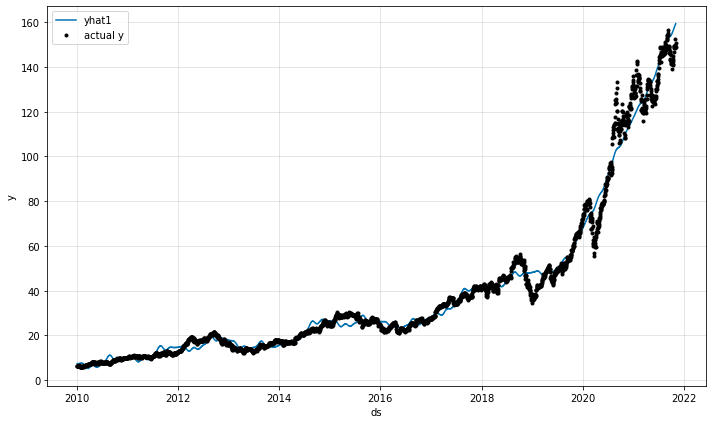

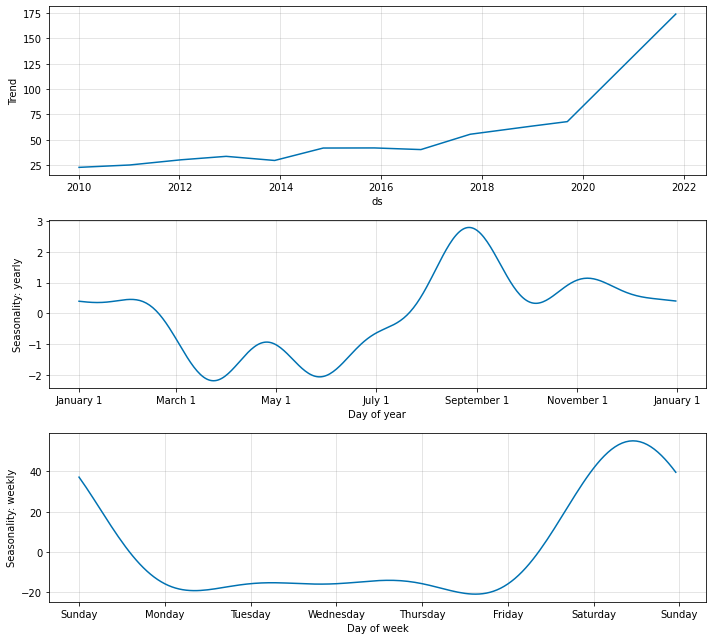

In [ ]:
fig_forecast = model.plot(forecast)
fig_components = model.plot_components(forecast)
#fig_model = model.plot_parameters()


This code generates and displays plots related to the forecasted data and its components using the NeuralProphet model.

The `plot` method is called on the model, passing the `forecast` data as input. This data represents the forecasted time series generated by the model.

The `plot` method provides various visualizations to analyze the forecasted data. In this code, it is used to create two plots: `fig_forecast` and `fig_components`.

- `fig_forecast` is a plot that shows the forecasted values over time. It provides a visual representation of the predicted values for the future time points.

- `fig_components` is a set of plots that display the individual components of the forecasted data. These components may include trend, seasonality, holidays, or any other patterns captured by the model.

These plots help to visually analyze the forecasted data and understand the underlying patterns and trends. They can be useful for evaluating the performance of the model, identifying any anomalies or outliers, and gaining insights into the contributing factors affecting the forecasted values.

There is also a commented line `#fig_model = model.plot_parameters()` which suggests the possibility of another plot to visualize the model's parameters, although it is not executed in the current code. Such a plot can provide information about the learned weights and biases of the NeuralProphet model, which are the internal parameters that influence its predictions.

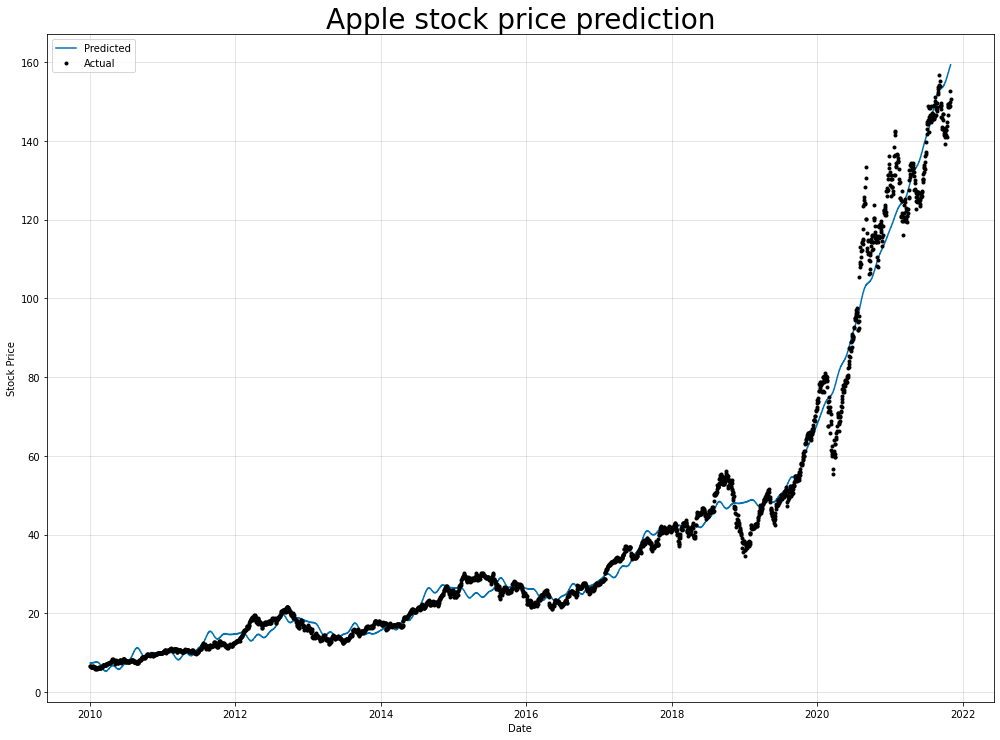

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10)) 
model.plot(forecast, xlabel="Date", ylabel="Stock Price", ax=ax)
ax.set_title("Apple stock price prediction", fontsize=28)
ax.legend(['Predicted', 'Actual'])

This code generates a plot using the `matplotlib` library to visualize the predicted and actual stock prices of Apple. 

First, a figure and axes object are created using `plt.subplots(figsize=(14, 10))`. The `figsize` parameter specifies the dimensions of the figure, determining its width and height.

The `plot` method is then called on the `model` object, passing the `forecast` data as input. This data represents the predicted stock prices generated by the model. The `xlabel` and `ylabel` parameters specify the labels for the x-axis and y-axis of the plot, respectively.

The `ax.set_title` function sets the title of the plot to "Apple stock price prediction" with a font size of 28. This provides a descriptive title for the plot.

Lastly, the `ax.legend` function adds a legend to the plot, labeling the two lines as "Predicted" and "Actual". This allows for easy identification and differentiation between the predicted and actual stock prices.

Overall, this code generates a visual representation of the predicted and actual stock prices of Apple, helping to compare and analyze the model's performance in forecasting the stock price over time.

Text(0.5, 0, 'epoch')

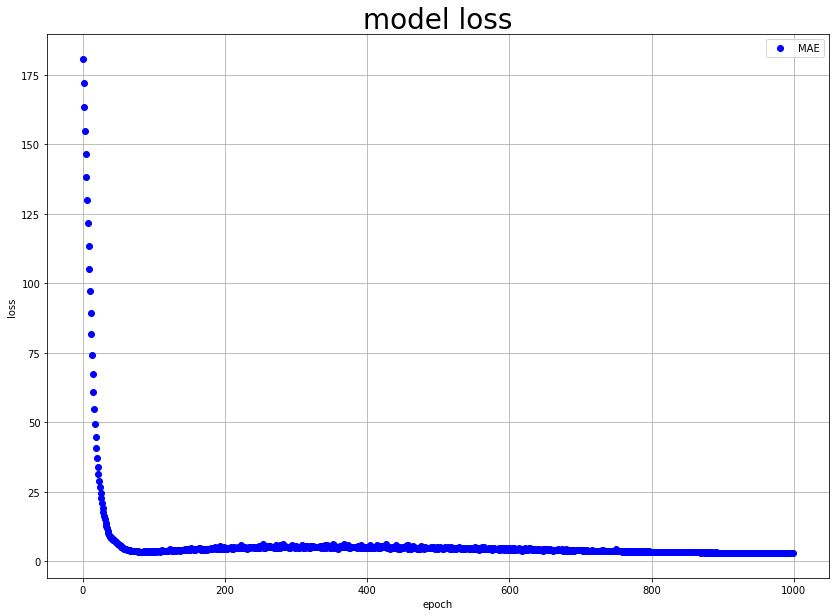

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(metrics["MAE"], 'ob', linewidth=6, label="Training Loss")  
#ax.plot(metrics["SmoothL1Loss"], '-r', linewidth=2, label="Validation Loss")
ax.legend(['MAE'])
ax.set_title("model loss", fontsize=28)
plt.ylabel('loss')
plt.xlabel('epoch')

This code generates a line plot using the `matplotlib` library to visualize the training loss (mean absolute error, MAE) of a model over multiple epochs.

First, a figure and axes object are created using `plt.subplots(figsize=(14, 10))`. The `figsize` parameter specifies the dimensions of the figure, determining its width and height.

The `ax.plot` function is then called on the axes object (`ax`) to plot the MAE values. The `'ob'` argument specifies that the data points should be plotted as blue circles. The `linewidth` parameter sets the width of the lines connecting the data points. The `label` parameter provides a label for the plotted data, which is set as "Training Loss".

Next, the `ax.legend` function adds a legend to the plot, labeling the line as "MAE". This allows for easy identification and differentiation of the plotted data.

The `ax.set_title` function sets the title of the plot to "model loss" with a font size of 28. This provides a descriptive title for the plot.

Lastly, the `plt.ylabel` and `plt.xlabel` functions are used to set the labels for the y-axis and x-axis of the plot, respectively. The y-axis label is set as "loss", and the x-axis label is set as "epoch".

Overall, this code generates a line plot showing the training loss (MAE) of a model over multiple epochs, providing insights into the model's performance and convergence during the training process.

In [ ]:
m = NeuralProphet()
df_train, df_test = m.split_df(aapl_feature, valid_p=0.3,freq='D')

The provided code involves using the NeuralProphet library to split a dataset into training and testing sets.

First, a NeuralProphet model is initialized by assigning it to the variable `m` using the `NeuralProphet()` constructor. This creates an instance of the NeuralProphet model that can be used for time series forecasting.

Next, the dataset `aapl_feature` is split into training and testing sets using the `split_df` function provided by the NeuralProphet library. The `split_df` function takes several parameters: `valid_p` specifies the percentage of data to be used for validation (in this case, 30% or 0.3), and `freq` specifies the frequency of the time series data (in this case, 'D' for daily).

The `split_df` function separates the dataset into two parts: `df_train` and `df_test`. `df_train` contains a portion of the original dataset that will be used for training the model, while `df_test` contains the remaining portion that will be used for evaluating the model's performance on unseen data.

By splitting the dataset into training and testing sets, it allows the model to be trained on a subset of the data and then evaluated on unseen data to assess its generalization capabilities. This is a common practice in machine learning to estimate the performance of a model and detect potential overfitting or underfitting.

In [ ]:
#m = NeuralProphet()
metricss = m.fit(df_train, validation_df=df_test , freq='D',epochs=1000, plot_live_loss=False)

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/271 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.01E-02, min: 1.58E+00


  0%|          | 0/271 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.41E-02, min: 1.26E+00


  0%|          | 0/271 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.69E-02, min: 1.47E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.98E-02
Epoch[1000/1000]: 100%|██████████| 1000/1000 [02:47<00:00,  5.97it/s, SmoothL1Loss=0.00261, MAE=2.69, RMSE=4.44, RegLoss=0, MAE_val=30.4, RMSE_val=31.1, SmoothL1Loss_val=0.116]


The provided code uses the NeuralProphet model to train a time series forecasting model on the training data and evaluate its performance on the validation data.

First, the code creates an instance of the NeuralProphet model by uncommenting the line `m = NeuralProphet()`. This initializes the model and assigns it to the variable `m`.

Next, the `fit` method is called on the NeuralProphet model `m`. The `fit` method trains the model on the training data (`df_train`) and evaluates its performance on the validation data (`df_test`). The `validation_df` parameter is set to `df_test` to specify the validation data.

Other parameters provided to the `fit` method include `freq='D'` to specify the frequency of the time series data as daily, `epochs=1000` to specify the number of training epochs, and `plot_live_loss=False` to disable live loss plotting during the training process.

By calling the `fit` method, the model learns patterns and relationships in the training data and updates its internal parameters to make predictions. The evaluation on the validation data allows assessing the model's performance and monitoring its training progress. The `fit` method returns metrics that measure the model's performance, such as loss values, which can be used to analyze the model's training process and evaluate its predictive accuracy.

In [ ]:
forecast = m.predict(df_train)

The provided code uses the trained NeuralProphet model (`m`) to generate predictions for the training data (`df_train`).

By calling the `predict` method on the NeuralProphet model with the training data as the input (`df_train`), the model utilizes its learned parameters to make predictions for the target variable. The predictions are generated based on the patterns and relationships the model has learned during the training process.

The `predict` method returns a forecast object (`forecast`) that contains the predicted values for the target variable. This forecast object provides access to various properties and methods that allow further analysis and visualization of the predictions.

Overall, the code generates predictions using the trained NeuralProphet model for the training data, enabling insights into the model's performance and its ability to capture patterns in the time series data.

Text(0.5, 1.0, 'Apple stock price prediction')

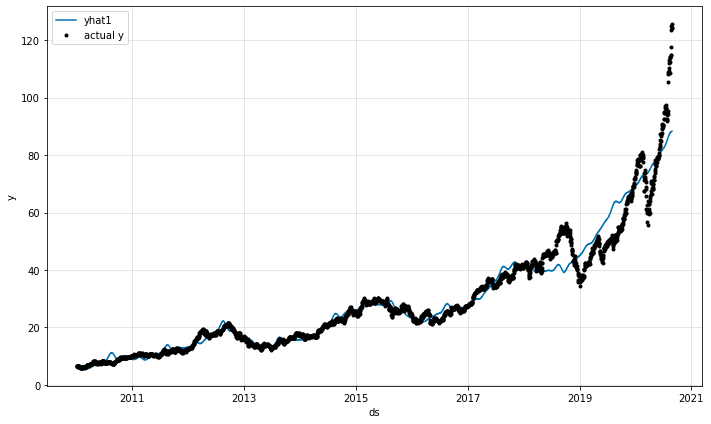

In [ ]:
fig_forecast = m.plot(forecast)
ax.set_title("Apple stock price prediction", fontsize=28)
#ax.legend(['Predicted', 'Actual'])
#fig_components = model.plot_components(forecast)
#fig_model = model.plot_parameters()

The provided code generates a forecast plot (`fig_forecast`) using the NeuralProphet model (`m`) and the forecast object (`forecast`) obtained from the previous step.

By calling the `plot` method on the NeuralProphet model with the forecast object as the input (`forecast`), the code generates a visualization of the predicted values for the target variable. This plot provides a visual representation of the predicted stock price values over time.

The `set_title` function sets the title of the plot to "Apple stock price prediction" with a font size of 28.

The lines that are commented out (`#ax.legend(['Predicted', 'Actual'])`, `#fig_components = model.plot_components(forecast)`, `#fig_model = model.plot_parameters()`) indicate that there may be additional code or plot components related to the predicted values, such as the actual values or the components of the forecast, but they are currently not active or included in the code snippet.

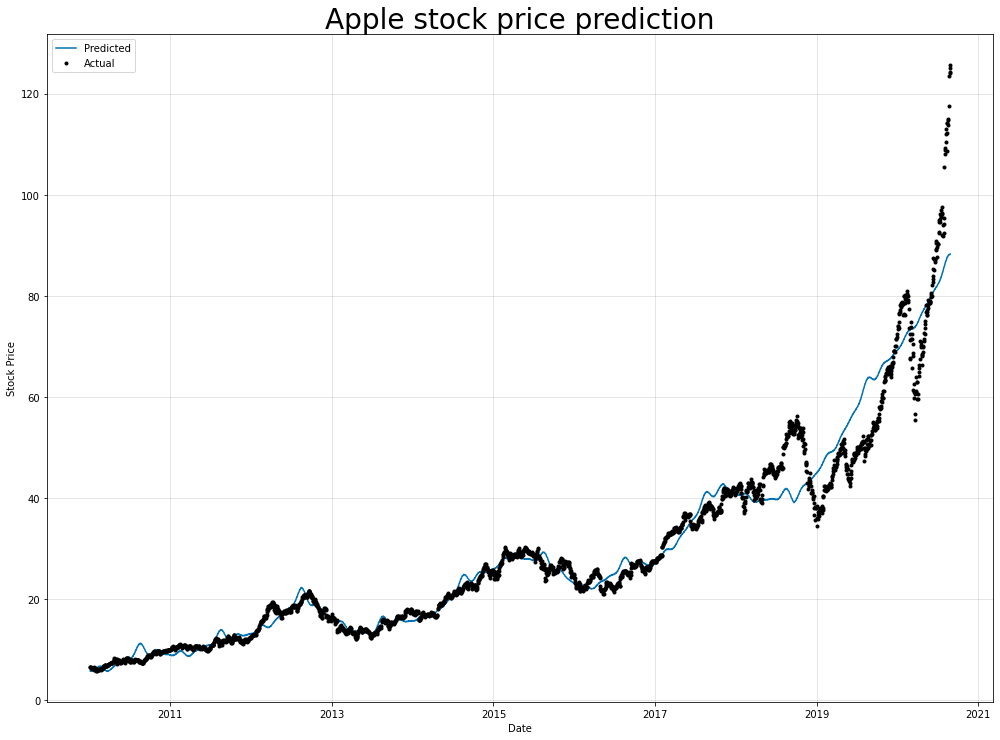

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10)) 
m.plot(forecast, xlabel="Date", ylabel="Stock Price", ax=ax)
ax.set_title("Apple stock price prediction", fontsize=28)
ax.legend(['Predicted', 'Actual'])

The provided code creates a figure and axes object for plotting a graph. The figure size is set to 14 inches by 10 inches.

The `plot` method of the NeuralProphet model (`m`) is called with the `forecast` object as the input. This generates a plot showing the predicted stock price values over time. The x-axis is labeled as "Date" and the y-axis is labeled as "Stock Price".

The `set_title` method is used to set the title of the plot as "Apple stock price prediction" with a font size of 28.

The `legend` method is used to add a legend to the plot, which displays the labels "Predicted" and "Actual" associated with the plotted lines or markers. The legend helps in understanding which line or marker represents the predicted values and which represents the actual values.

Overall, this code creates a plot showing the predicted and actual stock price values over time, with appropriate labels and a legend to distinguish between the two.

Text(0.5, 0, 'epoch')

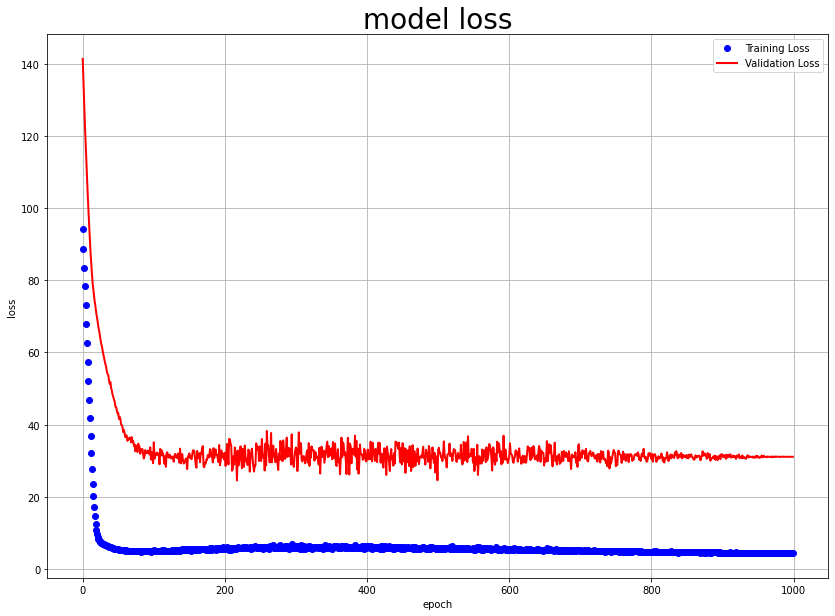

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(metricss["RMSE"], 'ob', linewidth=6, label="Training Loss")  
ax.plot(metricss["RMSE_val"], '-r', linewidth=2, label="Validation Loss")
ax.legend(['RMSE', 'RMSE_val'])
ax.set_title("model loss", fontsize=28)
ax.legend(['Training Loss', 'Validation Loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

The provided code creates a figure and axes object for plotting a graph. The figure size is set to 14 inches by 10 inches.

The `plot` method of the axes object (`ax`) is called to plot two lines on the graph. The first line represents the training loss and is plotted as blue circles ('ob') with a linewidth of 6. The second line represents the validation loss and is plotted as a solid red line ('-r') with a linewidth of 2.

The `legend` method is used to add a legend to the graph, specifying the labels "RMSE" and "RMSE_val" for the respective lines. This helps in understanding which line represents the training loss and which represents the validation loss.

The `set_title` method is used to set the title of the graph as "model loss" with a font size of 28.

Further, the `ylabel` function is used to label the y-axis as "loss" and the `xlabel` function is used to label the x-axis as "epoch".

Overall, this code plots the training loss and validation loss on a graph, with appropriate labels, legends, and axes titles.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

This code imports the `pyplot` module from the `matplotlib` library and makes it available under the name `plt`. It also includes the `%matplotlib inline` magic command, which allows the generated plots to be displayed directly in the Jupyter Notebook or JupyterLab interface.

By importing `matplotlib.pyplot`, we can use various functions and methods provided by `pyplot` to create and customize plots. These functions and methods allow us to create figures, add axes, plot data, set labels and titles, customize the appearance of plots, and more.

The `%matplotlib inline` command ensures that the plots are displayed inline within the notebook itself, rather than opening in a separate window or as a file. This makes it convenient to view and interact with the plots directly in the notebook environment.

Overall, this code sets up the necessary tools for creating plots using `matplotlib.pyplot` and configures the notebook environment to display the plots inline.

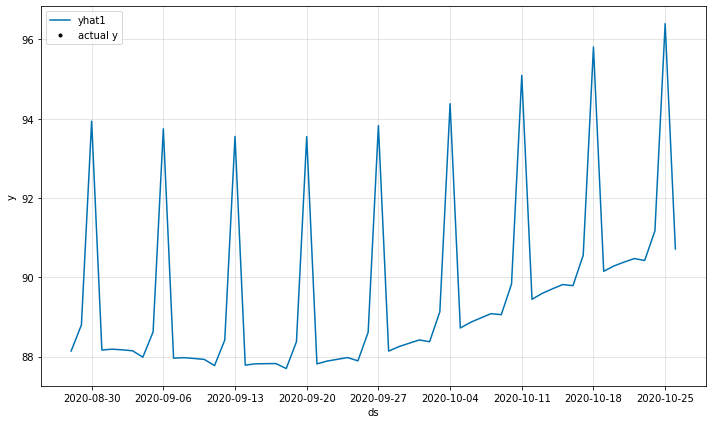

In [ ]:
f_future = m.make_future_dataframe(df_train, periods=60)
forecast = m.predict(f_future)
fig_forecast = m.plot(forecast)

This code performs time series forecasting using the NeuralProphet model. 

First, it creates a new dataframe called `f_future` that extends the `df_train` dataframe by adding future dates for which predictions are desired. The number of future periods is specified as 60 in this case.

Next, it uses the trained NeuralProphet model `m` to generate predictions for the future dates. These predictions are stored in the `forecast` variable.

Finally, the code generates a plot of the forecasted values using the `plot` method of the NeuralProphet model. The resulting plot, stored in the `fig_forecast` variable, visualizes the predicted values for the future periods along with any available historical data.